In [51]:
from src.evaluate import build_ground_truth_spans, build_prediction_spans
from src.users_study_evaluation import build_prediction_user_spans
from src.evaluate import FALLACIES_LEVEL_2_TO_LEVEL_1
from src.utils import read_jsonl
from src.evaluate import NUMERIC_TO_LEVEL_2
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np



In [52]:
dataset_path = "datasets/gold_standard_dataset.jsonl"
worst_prediction_path = "results/Falcon_7B_8-bit_level_2_results.jsonl"
best_prediction_path = "results/gpt-3.5_level_2_results.jsonl"

In [53]:
def predictions_per_span(all_y_pred):
    labels_count = {
    "nothing": 0,
    "appeal to positive emotion": 0,
    "appeal to anger": 0,
    "appeal to fear": 0,
    "appeal to pity": 0,
    "appeal to ridicule": 0,
    "appeal to worse problems": 0,
    "causal oversimplification": 0,
    "circular reasoning": 0,
    "equivocation": 0,
    "false analogy": 0,
    "false causality": 0,
    "false dilemma": 0,
    "hasty generalization": 0,
    "slippery slope": 0,
    "straw man": 0,
    "fallacy of division": 0,
    "ad hominem": 0,
    "ad populum": 0,
    "appeal to (false) authority": 0,
    "appeal to nature": 0,
    "appeal to tradition": 0,
    "guilt by association": 0,
    "tu quoque": 0,
    "unknown": 0
}
    all_dict_spans = []
    for i in all_y_pred:
        dict_spans = {}
        for s in i.spans:
            if tuple(s.interval) not in dict_spans:
                dict_spans[tuple(s.interval)] = [NUMERIC_TO_LEVEL_2[s.label]]
            else:
                dict_spans[tuple(s.interval)].append(NUMERIC_TO_LEVEL_2[s.label])
        
        for s_key in dict_spans.keys():
            dict_spans[s_key] = set(dict_spans[s_key])
            for l in dict_spans[s_key]:
                labels_count[l] += 1

        all_dict_spans.append(dict_spans)
            
    return all_dict_spans, labels_count

In [54]:
def gold_truth_per_span(all_y_true):
    labels_count = {
    "nothing": 0,
    "appeal to positive emotion": 0,
    "appeal to anger": 0,
    "appeal to fear": 0,
    "appeal to pity": 0,
    "appeal to ridicule": 0,
    "appeal to worse problems": 0,
    "causal oversimplification": 0,
    "circular reasoning": 0,
    "equivocation": 0,
    "false analogy": 0,
    "false causality": 0,
    "false dilemma": 0,
    "hasty generalization": 0,
    "slippery slope": 0,
    "straw man": 0,
    "fallacy of division": 0,
    "ad hominem": 0,
    "ad populum": 0,
    "appeal to (false) authority": 0,
    "appeal to nature": 0,
    "appeal to tradition": 0,
    "guilt by association": 0,
    "tu quoque": 0,
}
    all_dict_spans = []
    for i in all_y_true:
        dict_spans = {}
        for s in i.spans:
            tmp_labels = []
            for l in s.labels:
                if l is not None:
                    tmp_labels.append(NUMERIC_TO_LEVEL_2[l])
                    
            dict_spans[tuple(s.interval)] = set(tmp_labels)
            for l in dict_spans[tuple(s.interval)]:
                labels_count[l] += 1
        
        all_dict_spans.append(dict_spans)

        
            
    return all_dict_spans, labels_count

In [55]:
def plot_bar_labels_count(labels_count, model_name, level= "Level 2"):
    plt.figure(figsize=(20, 16))
    del labels_count["nothing"]
    print(model_name, labels_count)
    plt.bar(list(labels_count.keys()), labels_count.values(), color='cornflowerblue')
    plt.ylabel('Counts',fontdict={'fontsize': 40})
    plt.xlabel('Fallacies', fontdict={'fontsize': 40})
    plt.title(f'Distribution of fallacies for the {model_name} at {level}', fontdict={'fontsize': 40})
    plt.xticks(rotation=90, fontsize=40)
    plt.yticks(fontsize=40)
    plt.tight_layout()
    # plt.rcParams.update({'font.size': 30})

    # plt.show()
    plt.savefig(f"figures/{model_name.lower()}_distribution_{level.lower()}.pdf", format="pdf", dpi=1000)

In [56]:
gold_dataset = read_jsonl(dataset_path)
worst_pred_dataset = read_jsonl(worst_prediction_path)
best_pred_dataset = read_jsonl(best_prediction_path)

begin_instruction_tag = ""
end_instruction_tag = ""

all_y_true = []
# Build ground truth spans for each instance in the gold dataset
for i in gold_dataset:
    all_y_true.append(build_ground_truth_spans(i["text"], i["labels"]))

# Build predicted spans using the prediction dataset and the gold dataset
all_y_worst_pred = build_prediction_spans(
    worst_pred_dataset, gold_dataset, begin_instruction_tag, end_instruction_tag
)

all_y_best_pred = build_prediction_spans(
    best_pred_dataset, gold_dataset, begin_instruction_tag, end_instruction_tag
)

In [57]:
all_dict_gold_spans, gold_labels_count = gold_truth_per_span(all_y_true)

all_dict_worst_pred_spans, worst_pred_labels_count = predictions_per_span(all_y_worst_pred)

all_dict_best_pred_spans, best_pred_labels_count = predictions_per_span(all_y_best_pred)



In [58]:


def transform_level_2_to_level_1(labels_count):
    level_1_labels_count = {
        "nothing": 0,
        "emotion": 0,
        "logic": 0,
        "credibility": 0,
        "unknown": 0
    }

    for fallacies in labels_count:
        level_1_labels_count[FALLACIES_LEVEL_2_TO_LEVEL_1[fallacies]] += labels_count[fallacies]
    
    return level_1_labels_count

### Distribution of the Gold Truth Labels and  Predicted Labels

#### Gold Standard

Gold Standard {'appeal to positive emotion': 3, 'appeal to anger': 6, 'appeal to fear': 11, 'appeal to pity': 1, 'appeal to ridicule': 20, 'appeal to worse problems': 8, 'causal oversimplification': 23, 'circular reasoning': 11, 'equivocation': 7, 'false analogy': 12, 'false causality': 13, 'false dilemma': 18, 'hasty generalization': 28, 'slippery slope': 11, 'straw man': 13, 'fallacy of division': 2, 'ad hominem': 16, 'ad populum': 14, 'appeal to (false) authority': 9, 'appeal to nature': 11, 'appeal to tradition': 6, 'guilt by association': 8, 'tu quoque': 3}


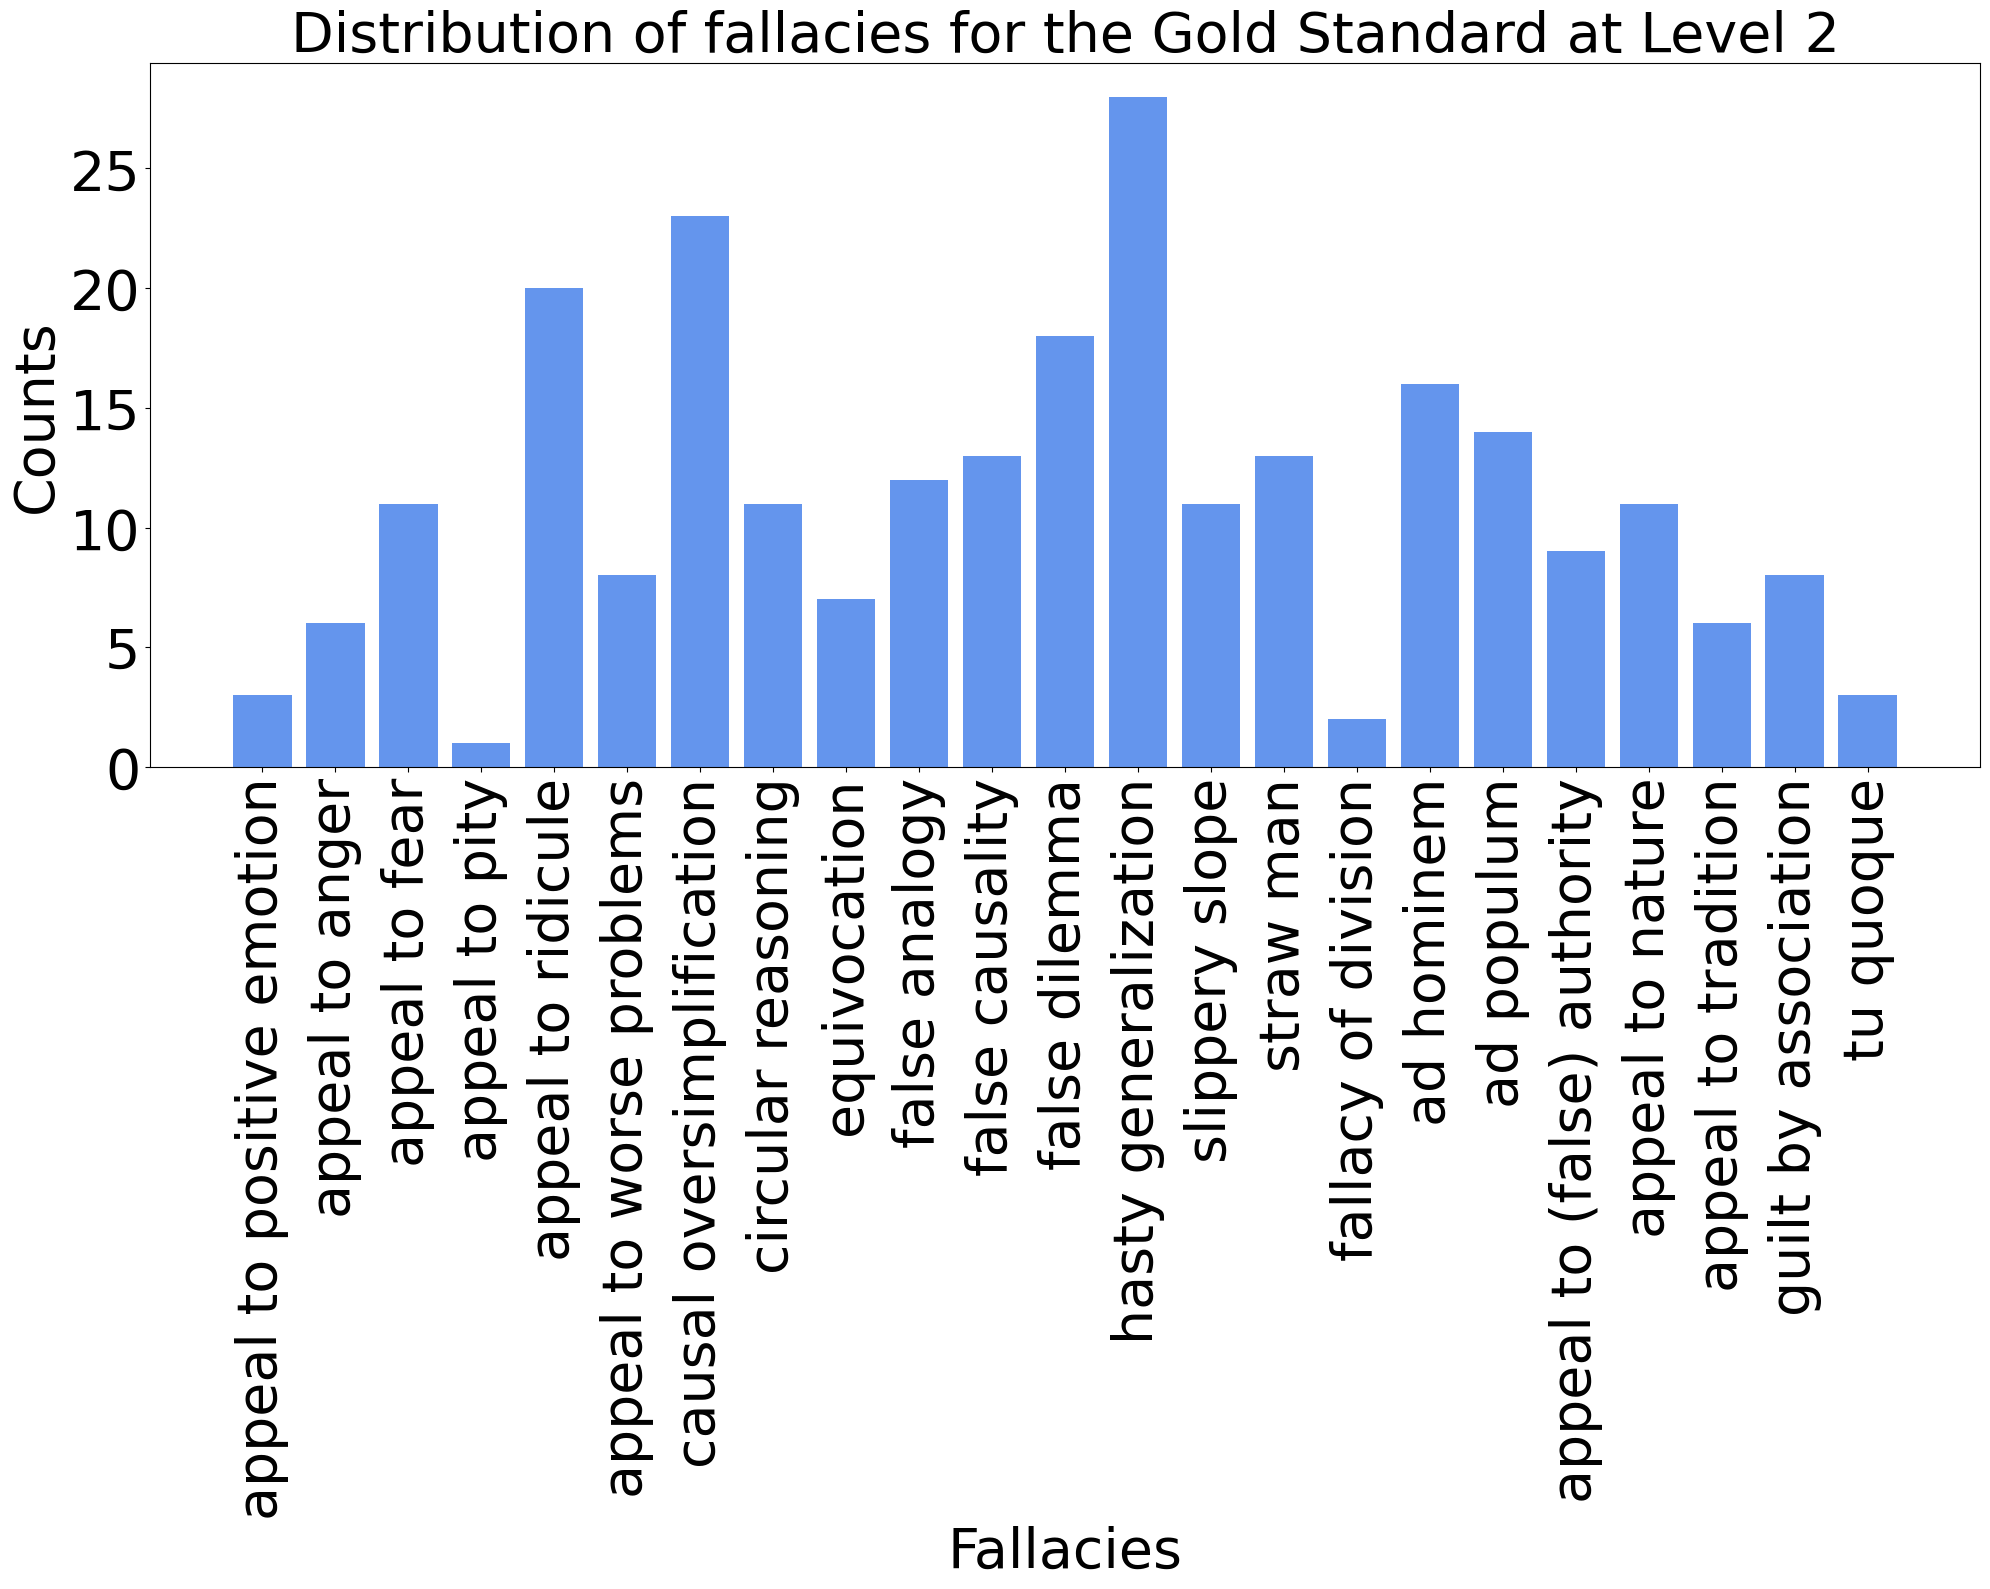

In [59]:
plot_bar_labels_count(gold_labels_count, "Gold Standard", "Level 2")

Gold Standard {'emotion': 49, 'logic': 138, 'credibility': 67, 'unknown': 0}


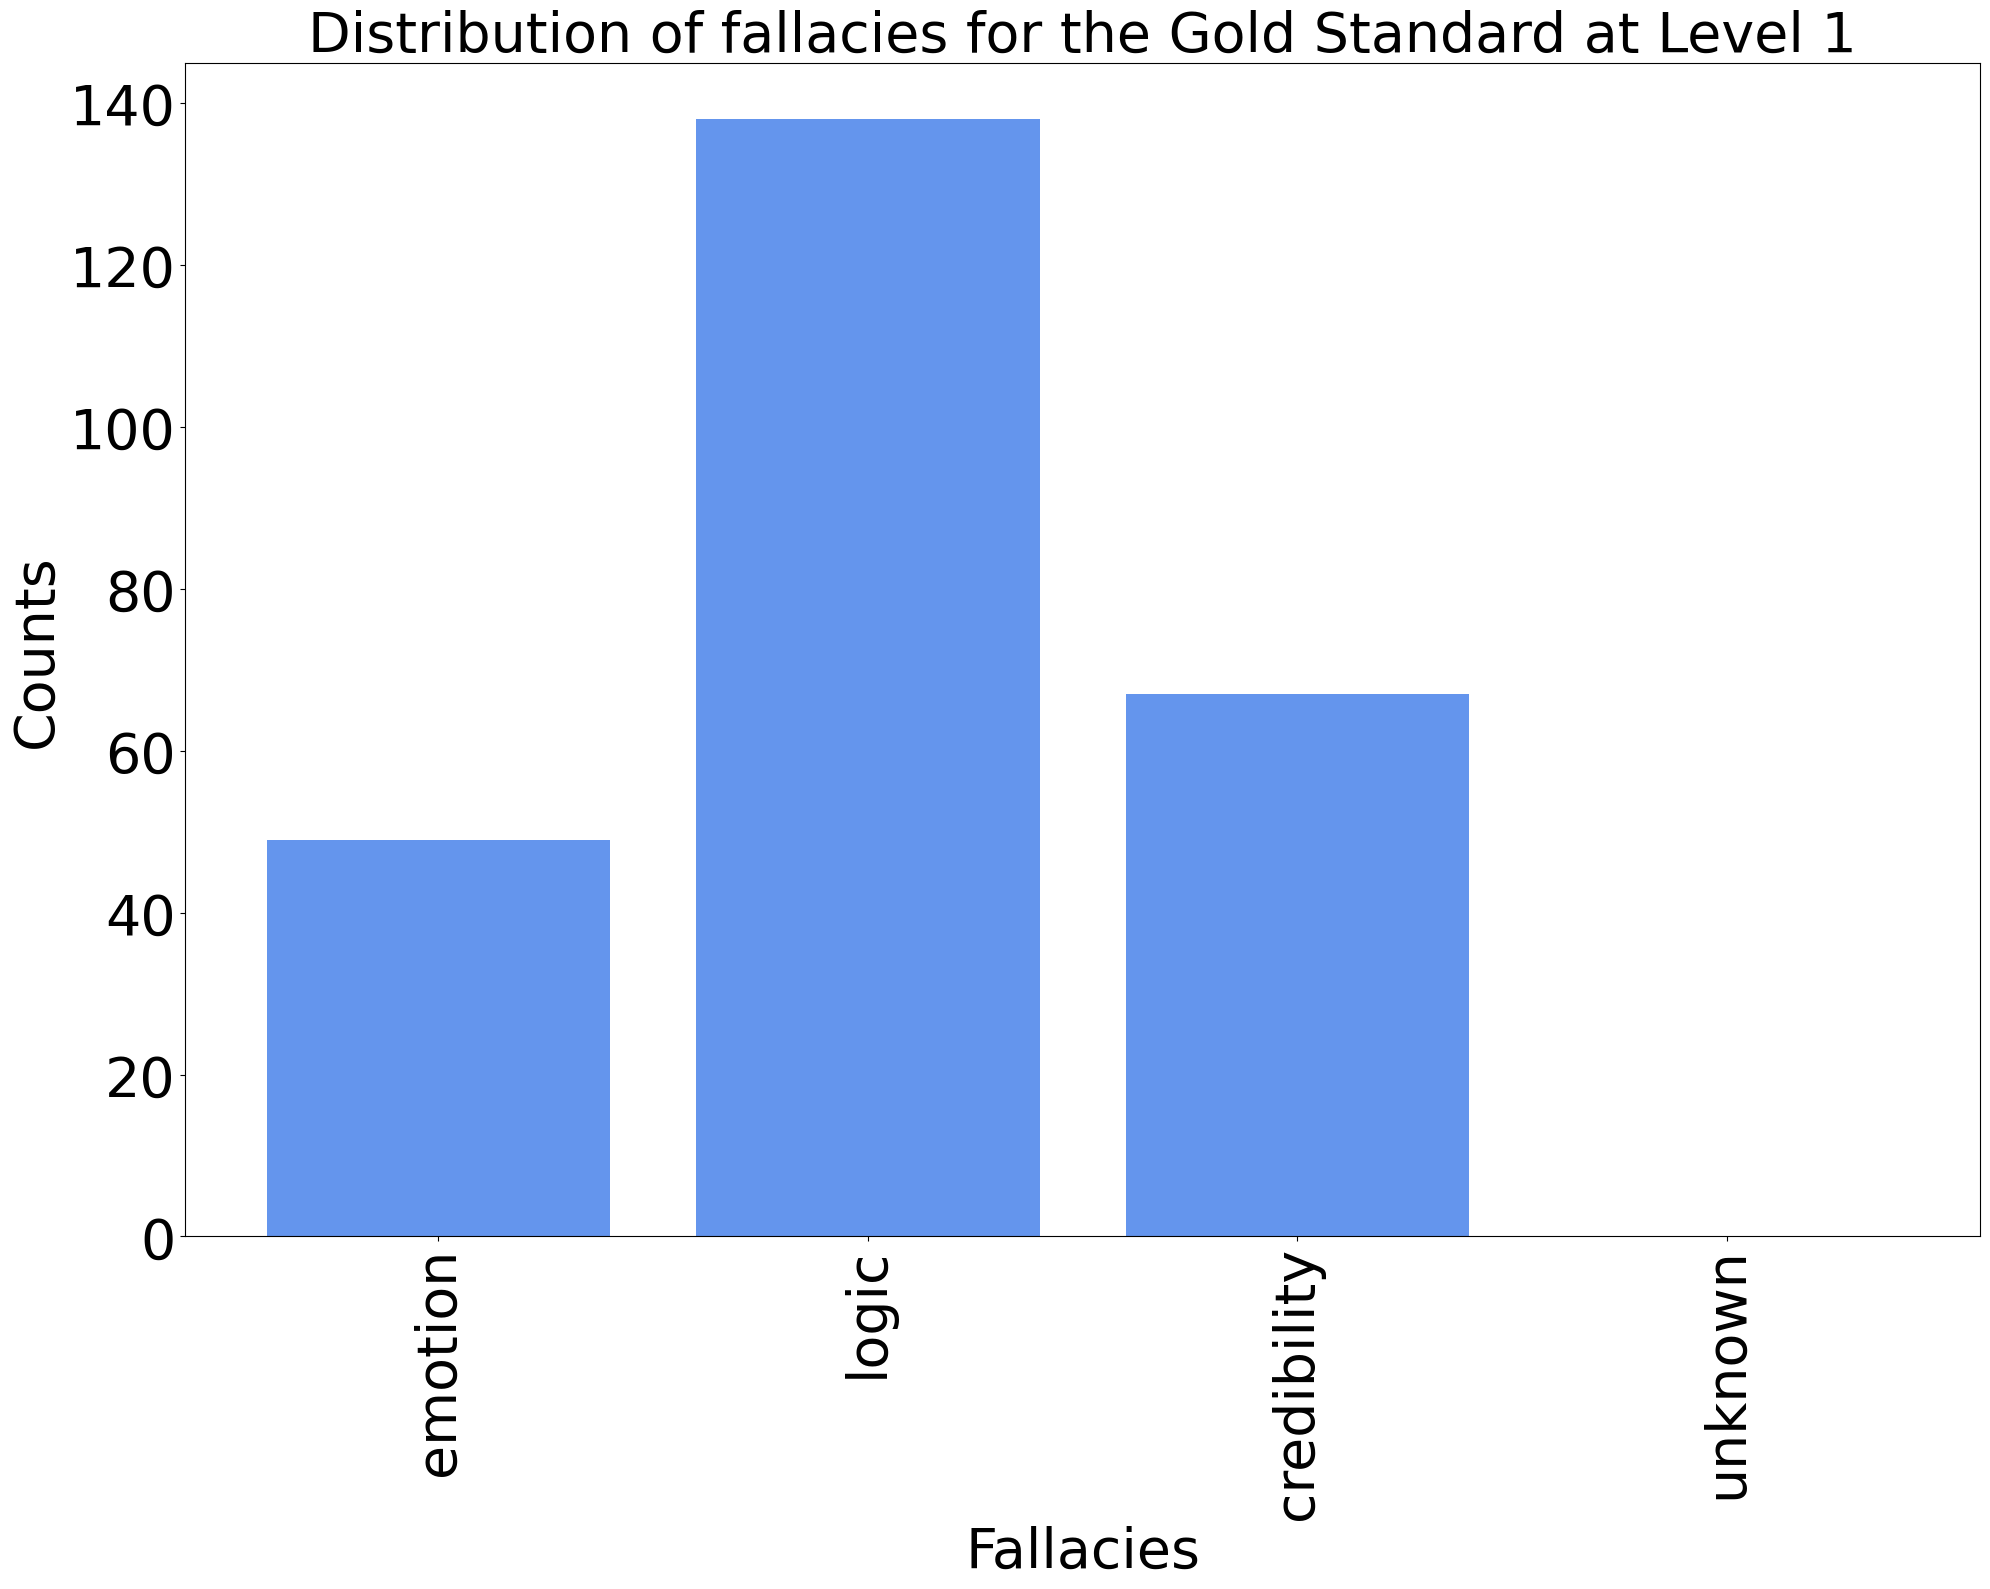

In [60]:
plot_bar_labels_count(transform_level_2_to_level_1(gold_labels_count), "Gold Standard", "Level 1")

#### Worst Predictions

Worst Model {'appeal to positive emotion': 128, 'appeal to anger': 119, 'appeal to fear': 132, 'appeal to pity': 198, 'appeal to ridicule': 121, 'appeal to worse problems': 157, 'causal oversimplification': 81, 'circular reasoning': 132, 'equivocation': 106, 'false analogy': 127, 'false causality': 57, 'false dilemma': 169, 'hasty generalization': 123, 'slippery slope': 77, 'straw man': 135, 'fallacy of division': 102, 'ad hominem': 135, 'ad populum': 75, 'appeal to (false) authority': 211, 'appeal to nature': 143, 'appeal to tradition': 156, 'guilt by association': 91, 'tu quoque': 111, 'unknown': 115}


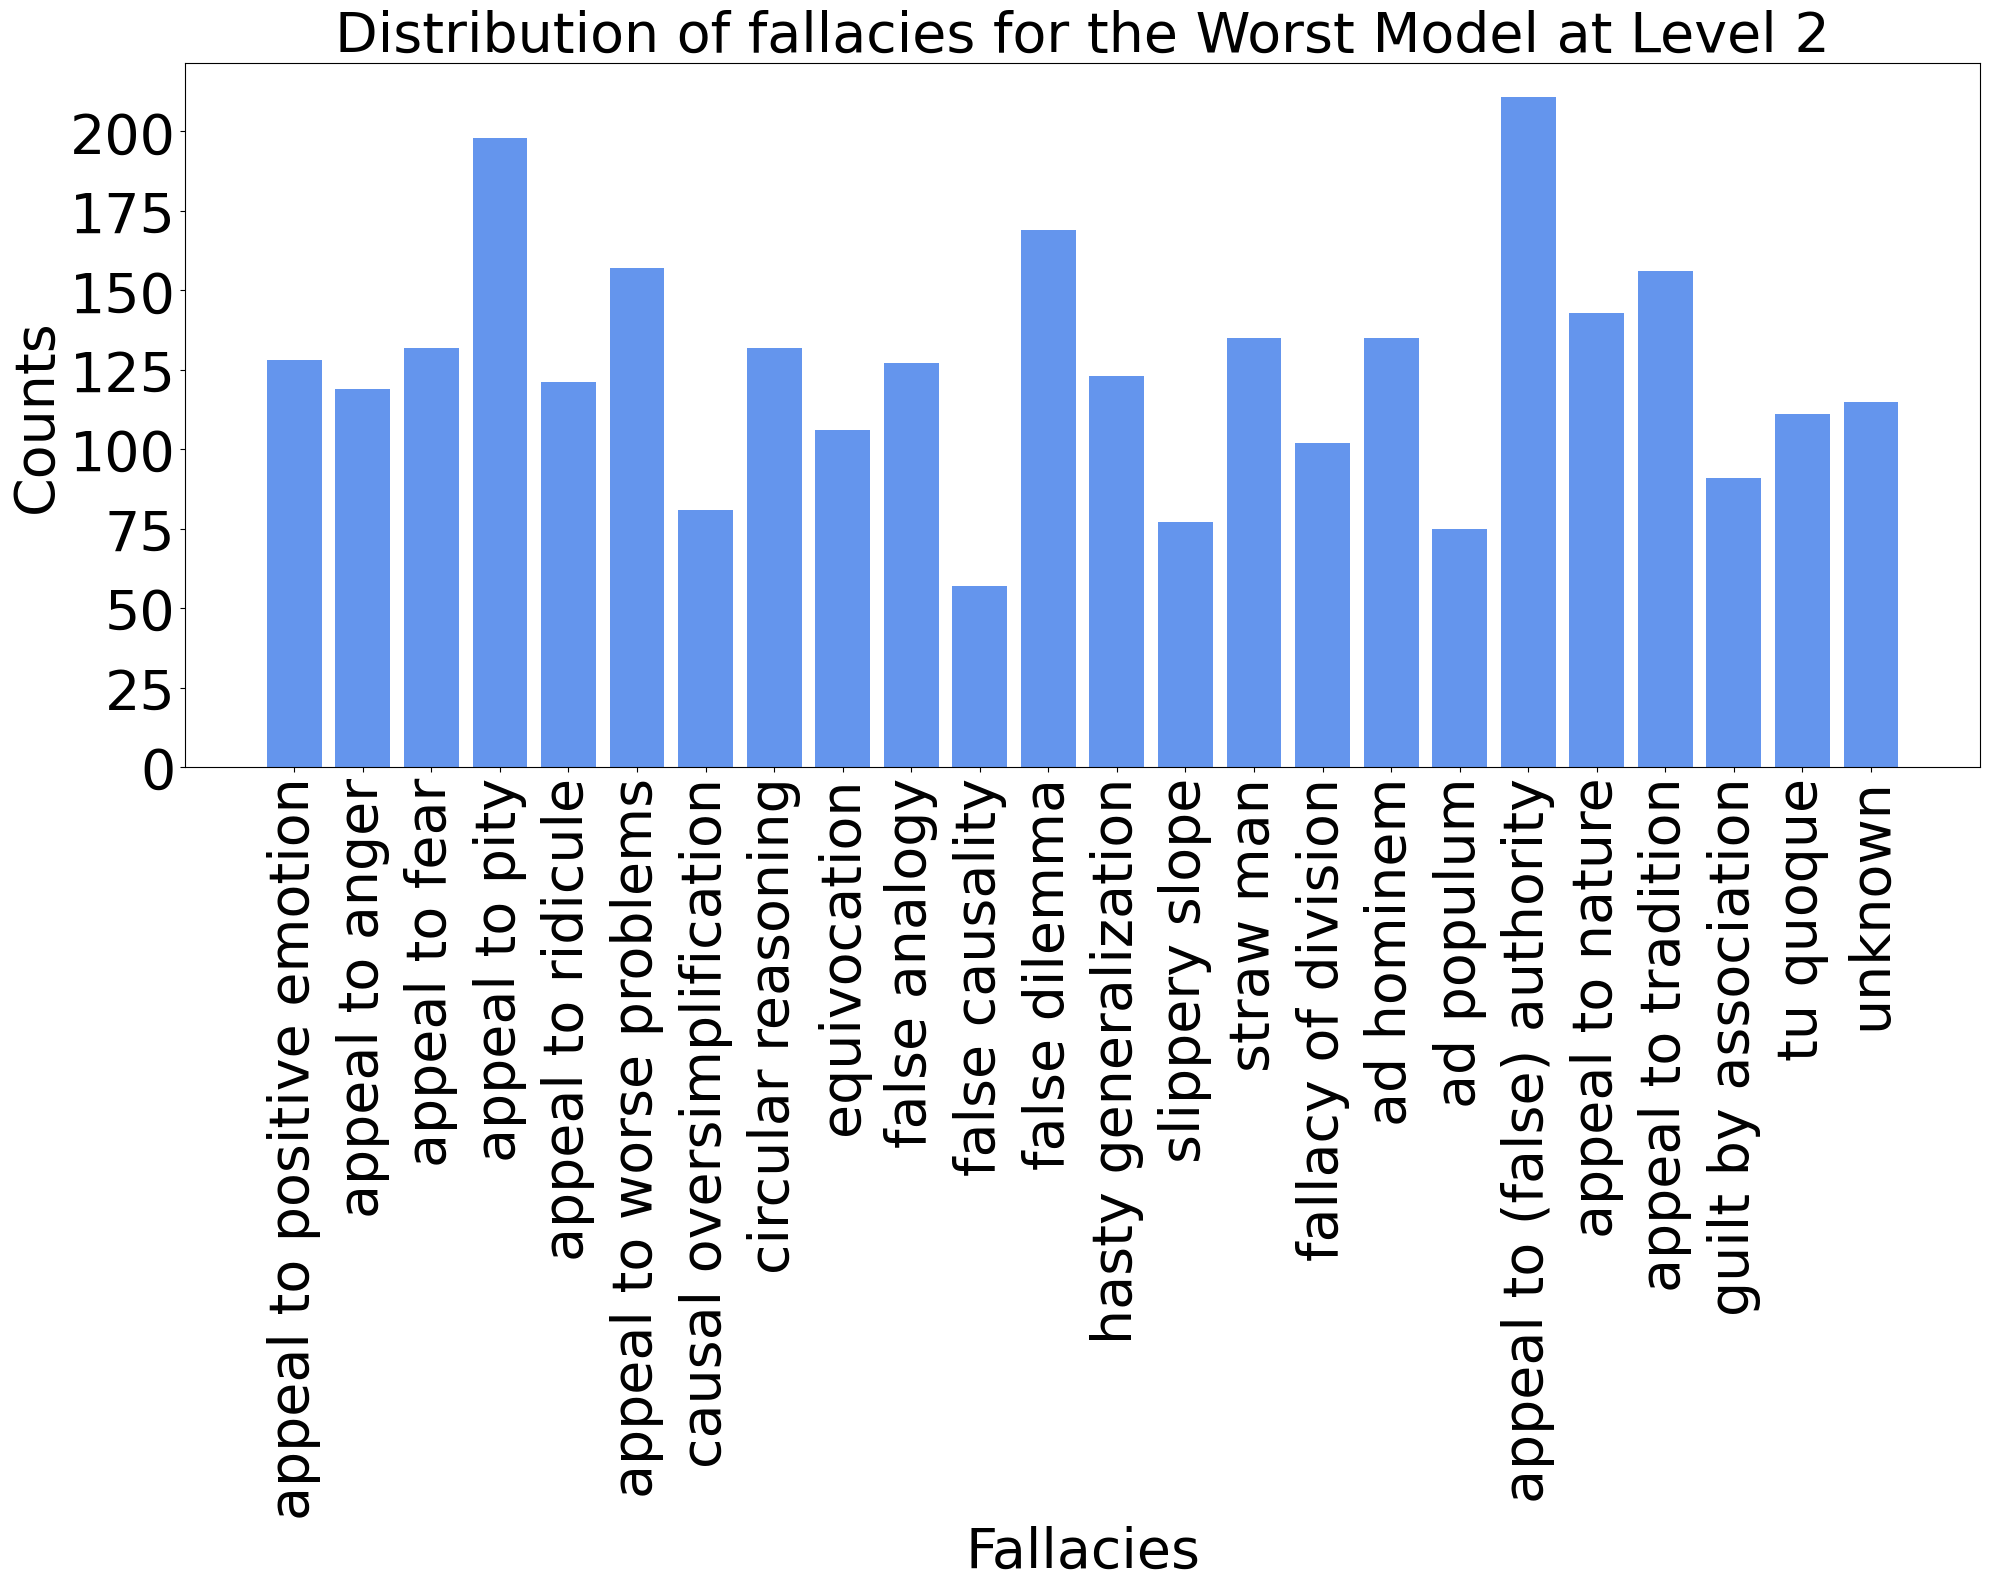

In [61]:
plot_bar_labels_count(worst_pred_labels_count, "Worst Model", "Level 2")

Worst Model {'emotion': 855, 'logic': 1109, 'credibility': 922, 'unknown': 115}


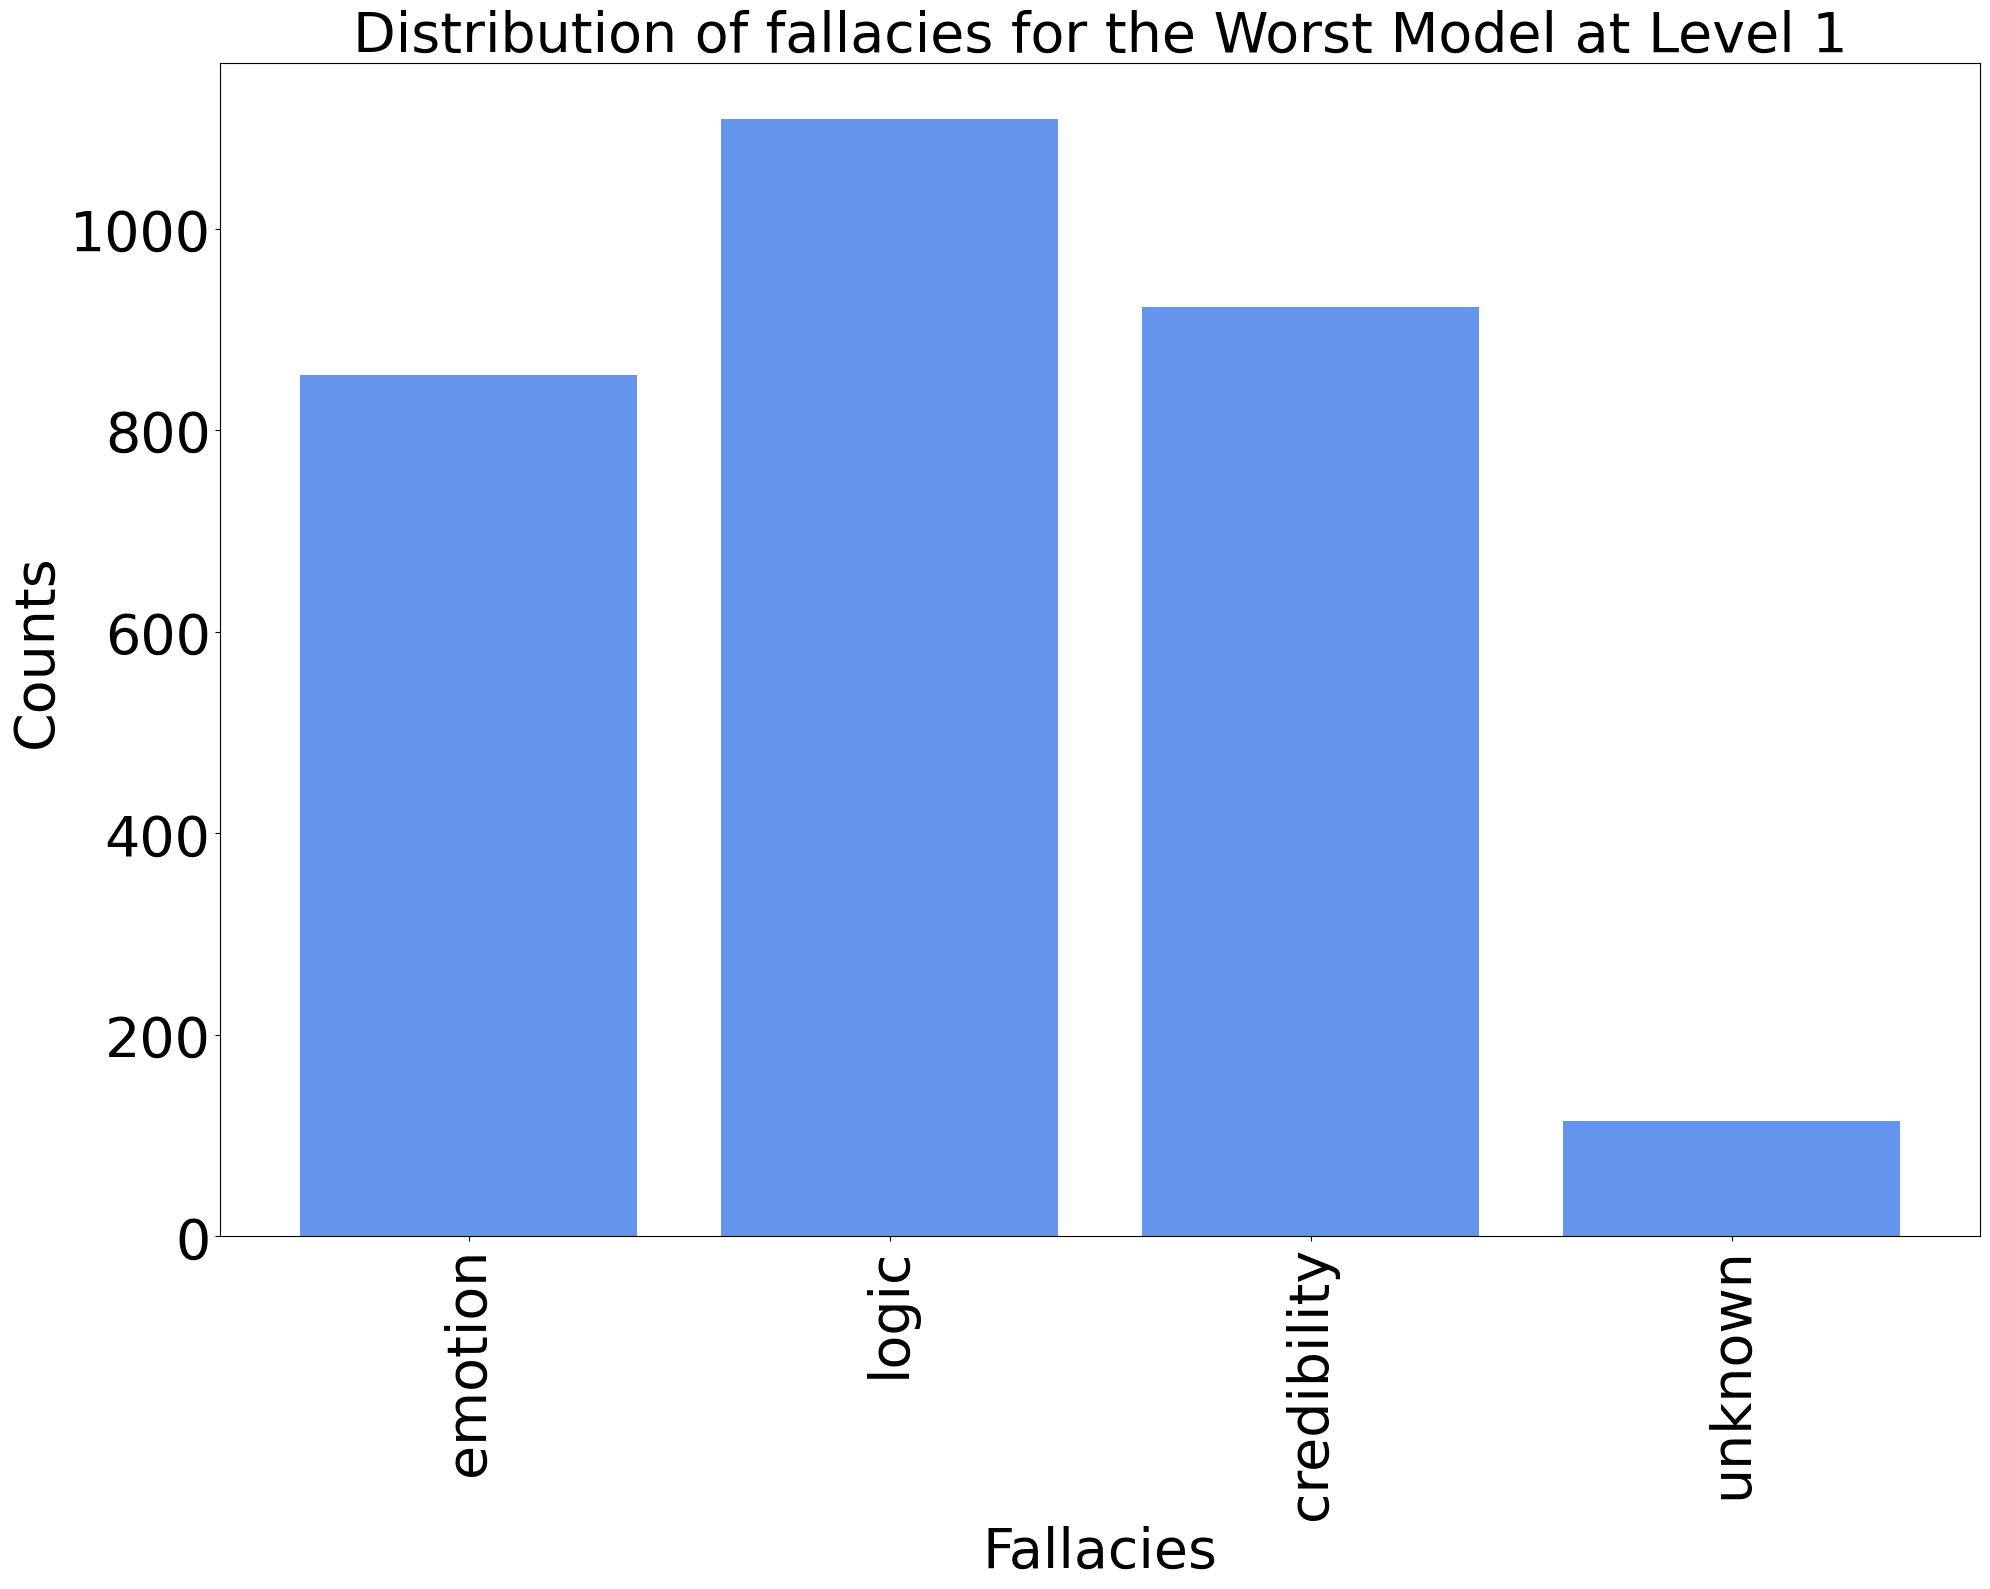

In [62]:
plot_bar_labels_count(transform_level_2_to_level_1(worst_pred_labels_count), "Worst Model", "Level 1")

#### Best Predictions

Best Model {'appeal to positive emotion': 3, 'appeal to anger': 6, 'appeal to fear': 5, 'appeal to pity': 1, 'appeal to ridicule': 10, 'appeal to worse problems': 21, 'causal oversimplification': 6, 'circular reasoning': 8, 'equivocation': 1, 'false analogy': 6, 'false causality': 9, 'false dilemma': 6, 'hasty generalization': 41, 'slippery slope': 10, 'straw man': 6, 'fallacy of division': 2, 'ad hominem': 32, 'ad populum': 4, 'appeal to (false) authority': 10, 'appeal to nature': 7, 'appeal to tradition': 4, 'guilt by association': 4, 'tu quoque': 0, 'unknown': 5}


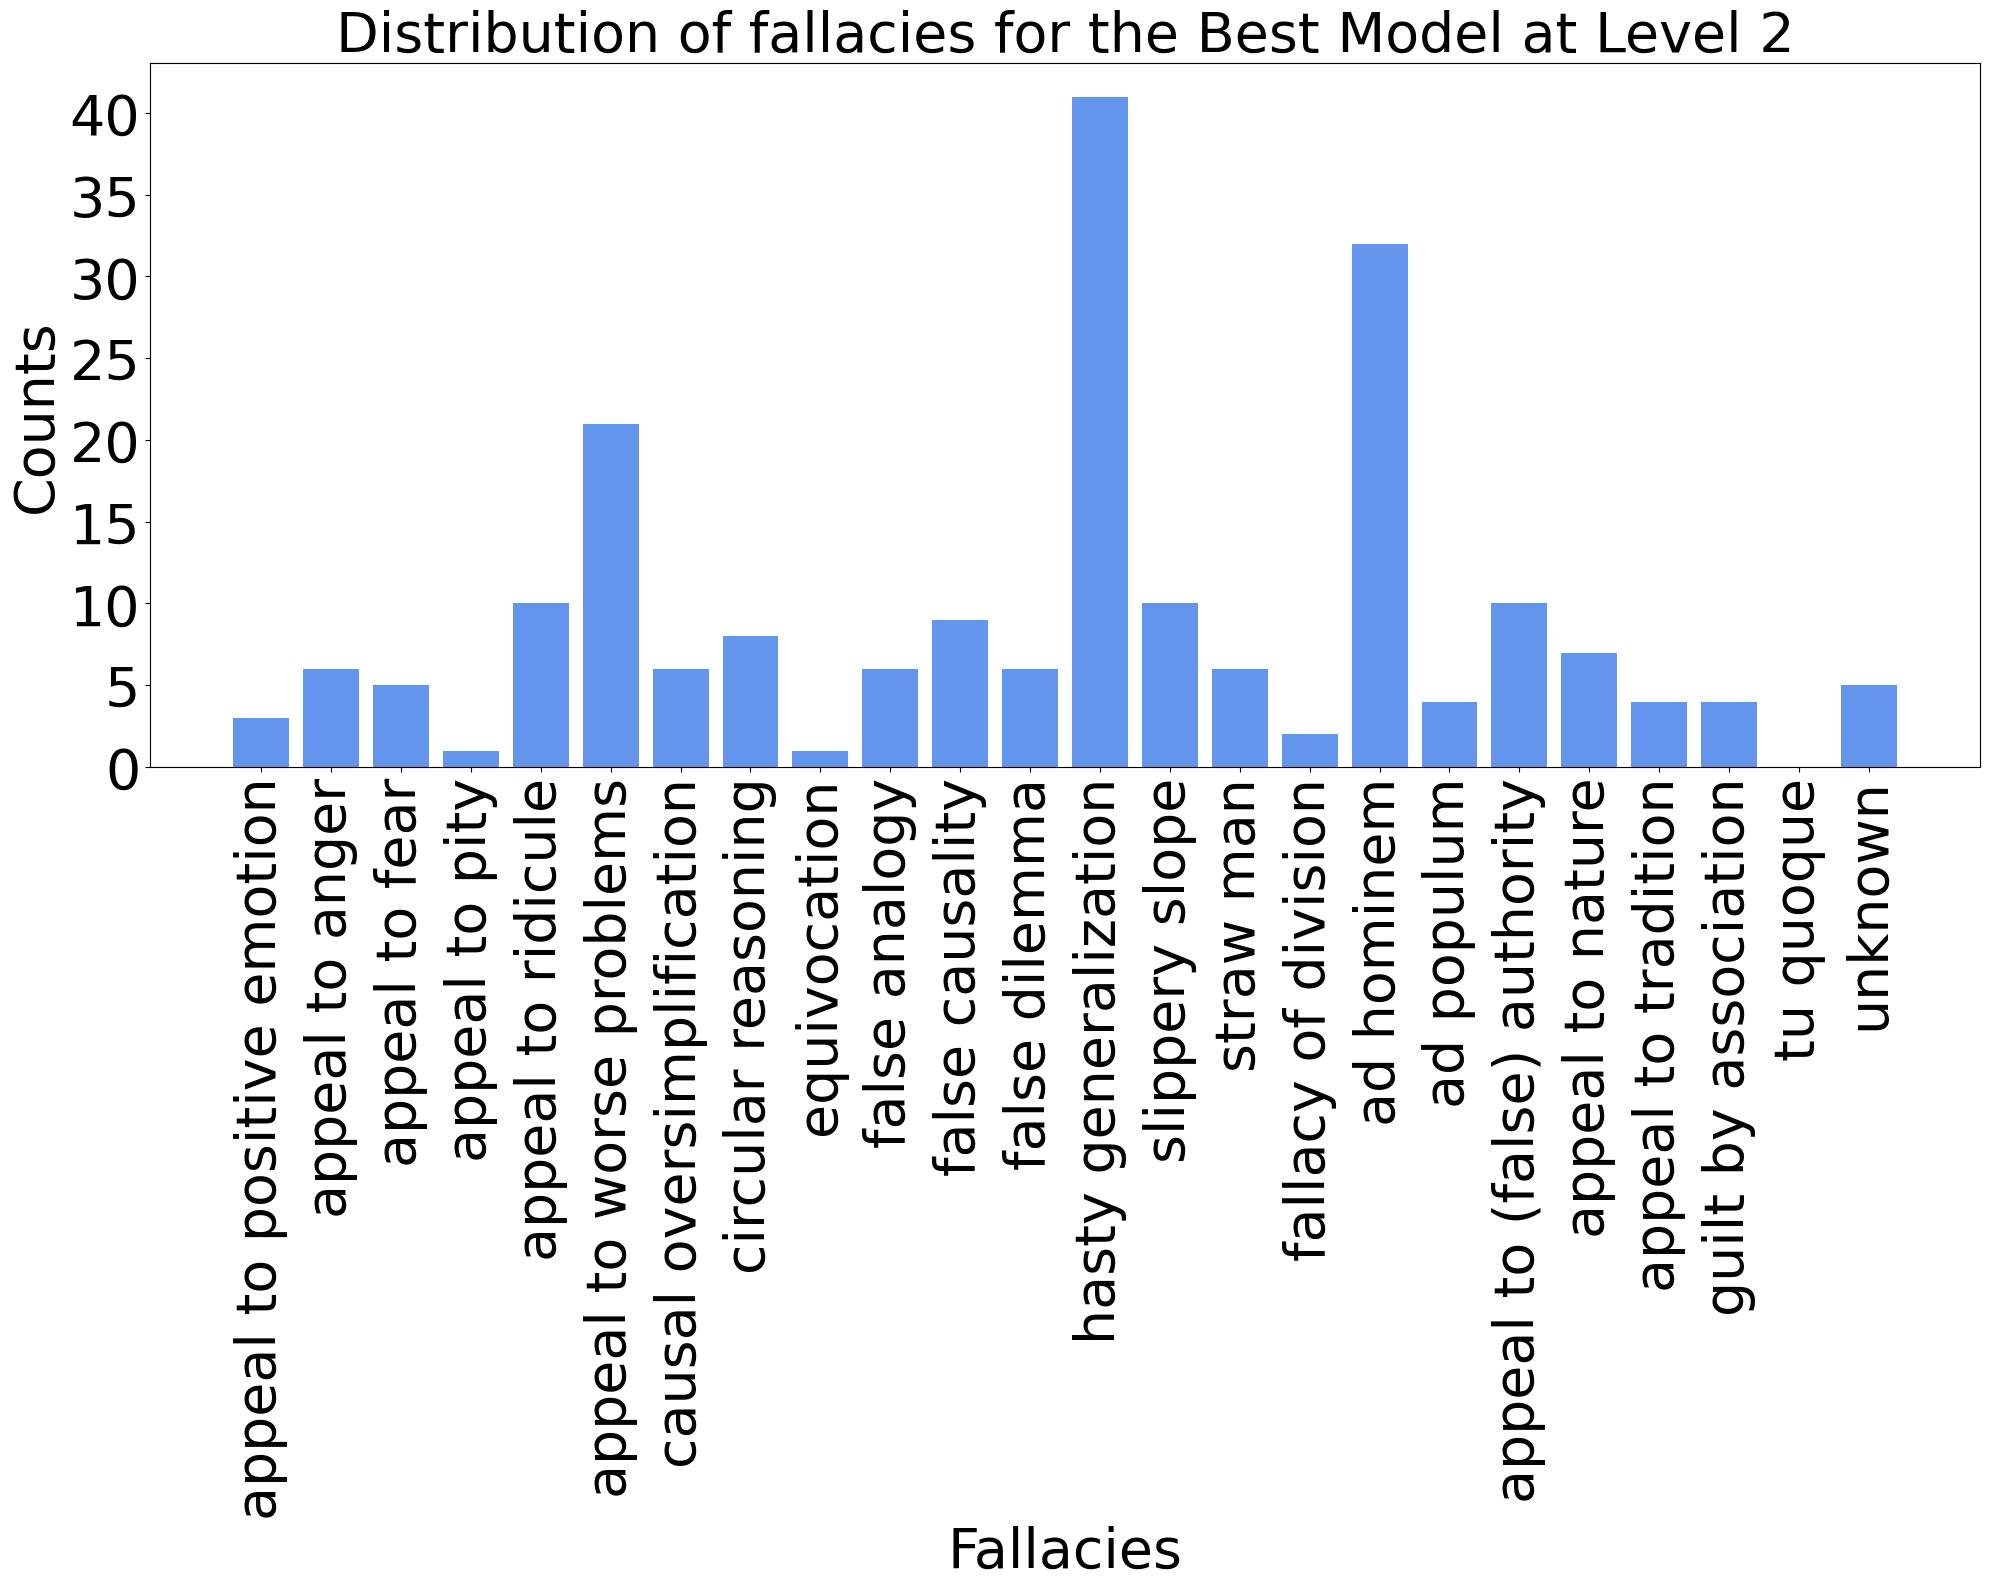

In [63]:
plot_bar_labels_count(best_pred_labels_count, "Best Model", "Level 2")

Best Model {'emotion': 46, 'logic': 95, 'credibility': 61, 'unknown': 5}


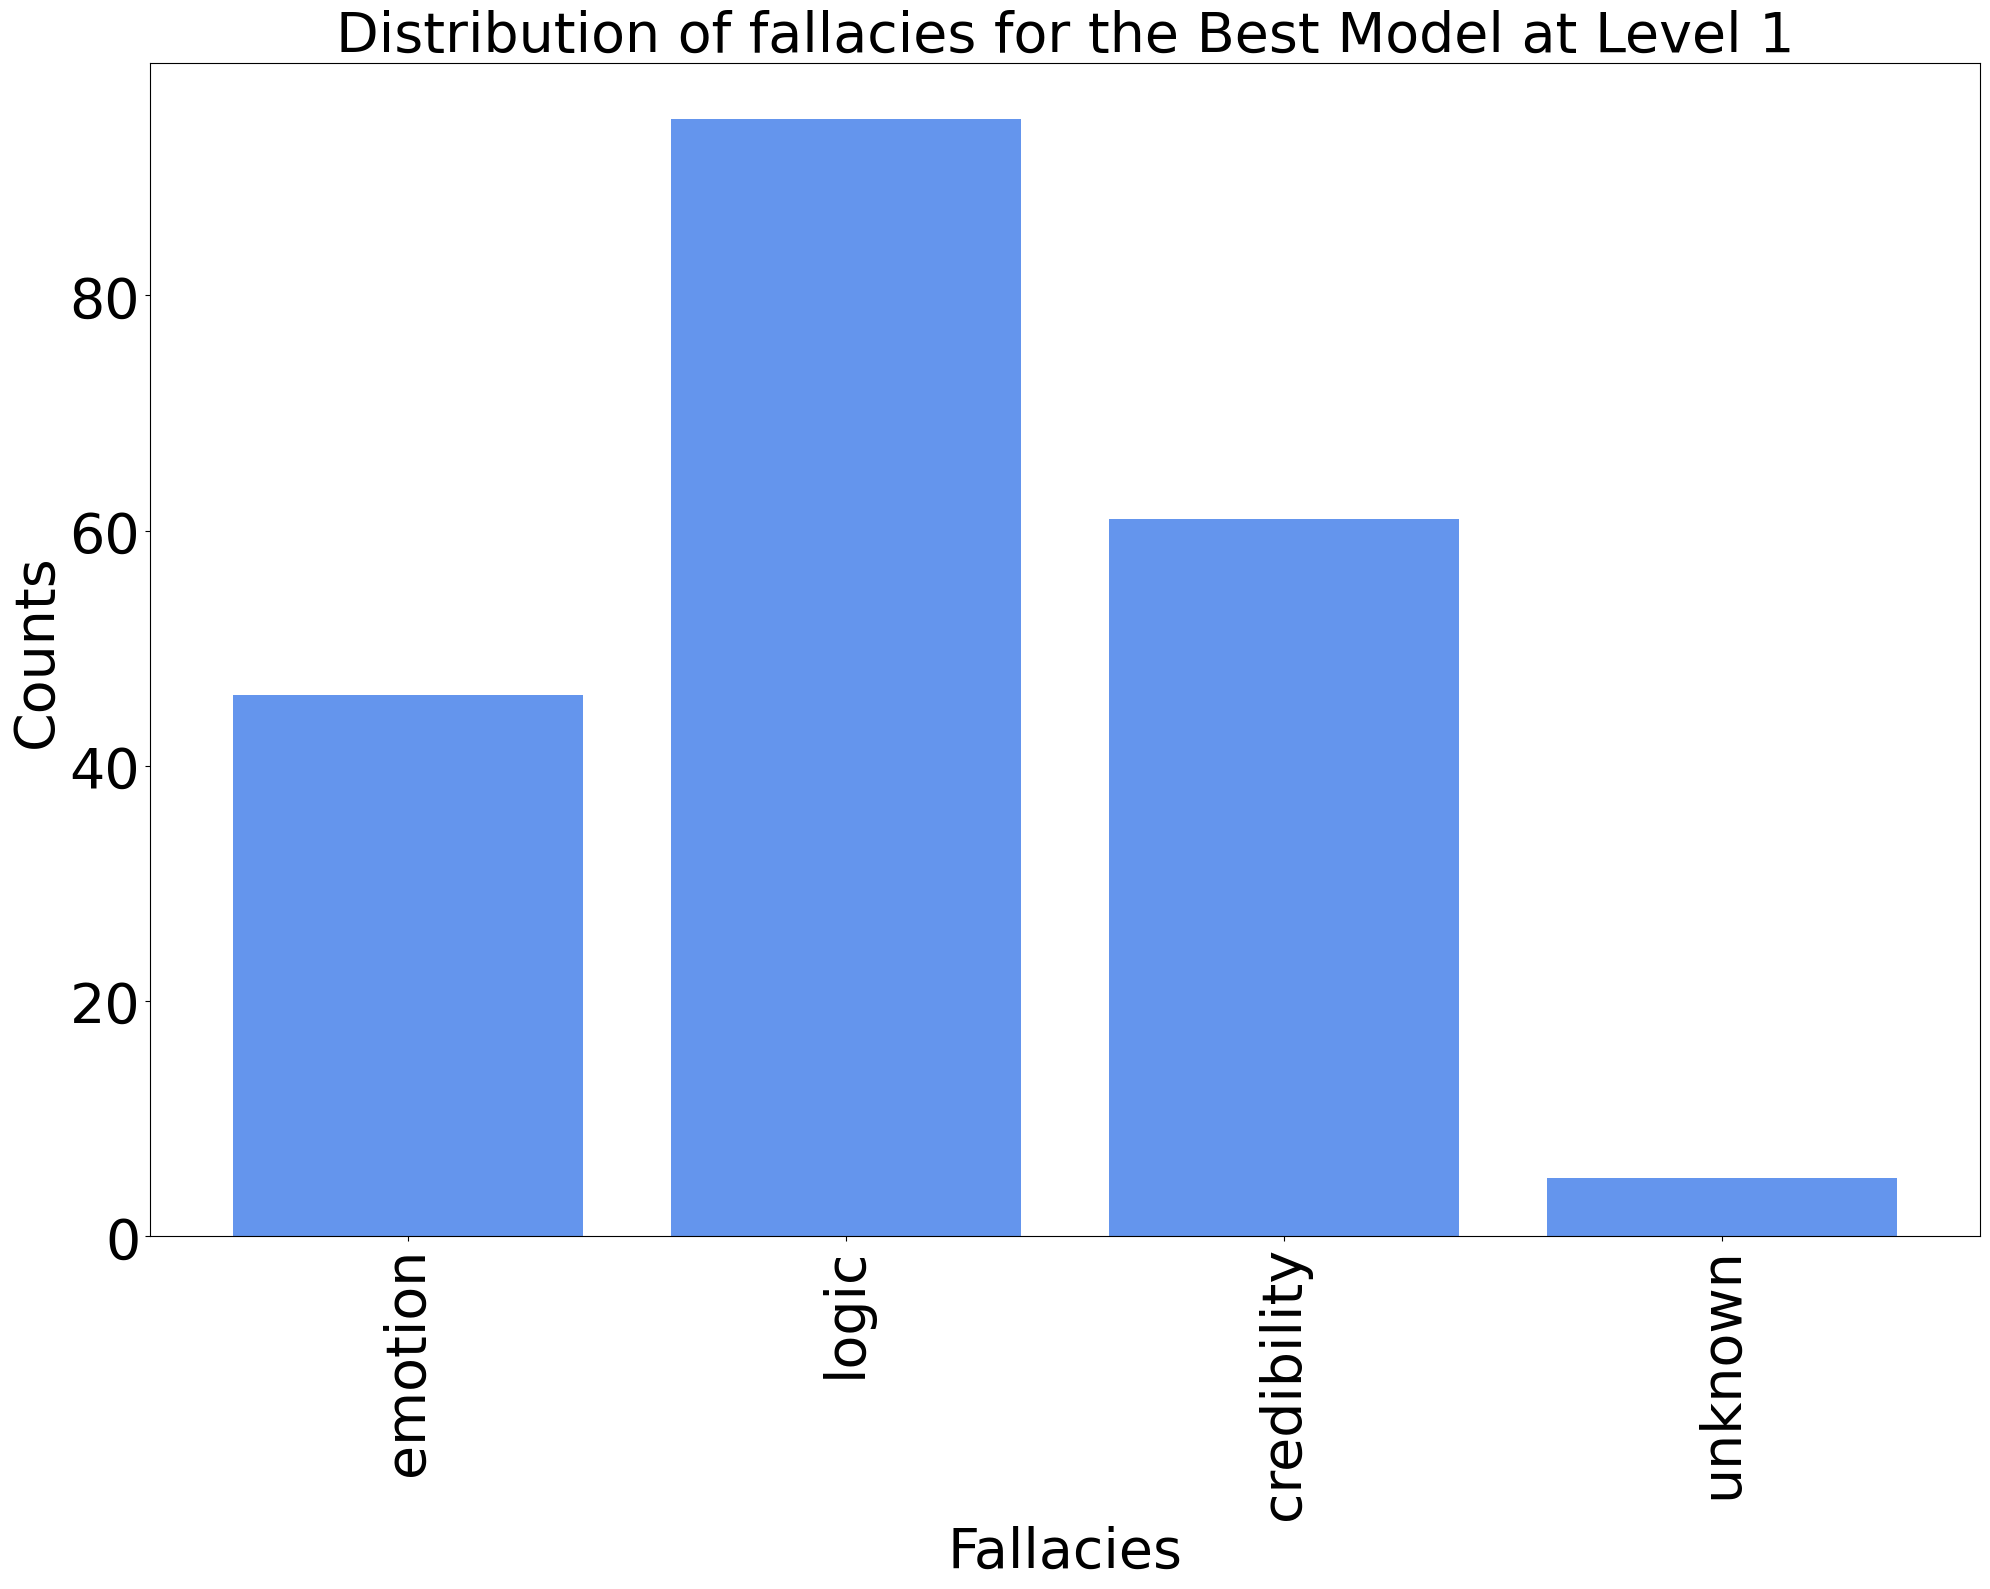

In [64]:
plot_bar_labels_count(transform_level_2_to_level_1(best_pred_labels_count), "Best Model", "Level 1")

In [65]:
print(all_dict_best_pred_spans[1])
print(all_dict_gold_spans[1])

{(0, 83): {'nothing'}, (84, 145): {'hasty generalization'}}
{(84, 145): {'hasty generalization'}, (0, 83): set()}


### Average Fallacies per Predicted Span

In [66]:
def average_fallacies_per_predicted_span(all_dict_spans):
    count_fallacies = 0
    count_span = 0
    for i in all_dict_spans:
        for span in i.keys():
            if len(i[span]) == 1 and "nothing" in i[span]:
                continue
            if "nothing" in i[span]:
                count_fallacies += len(i[span]) - 1
            else:
                count_fallacies += len(i[span])
            count_span += 1

    return count_fallacies / count_span, count_fallacies, count_span                

In [67]:
print("Average best model fallacies per fallacious span: ", average_fallacies_per_predicted_span(all_dict_best_pred_spans))
print("Average worst model fallacies per fallacious span: ", average_fallacies_per_predicted_span(all_dict_worst_pred_spans))

Average best model fallacies per fallacious span:  (1.0402010050251256, 207, 199)
Average worst model fallacies per fallacious span:  (4.8016, 3001, 625)


#### Exact Matching Fallacious Span

In [68]:
def count_match_fallacious_span(all_dict_gold_spans, all_dict_pred_spans):
    gd_labels_count = {
    "nothing": 0,
    "appeal to positive emotion": 0,
    "appeal to anger": 0,
    "appeal to fear": 0,
    "appeal to pity": 0,
    "appeal to ridicule": 0,
    "appeal to worse problems": 0,
    "causal oversimplification": 0,
    "circular reasoning": 0,
    "equivocation": 0,
    "false analogy": 0,
    "false causality": 0,
    "false dilemma": 0,
    "hasty generalization": 0,
    "slippery slope": 0,
    "straw man": 0,
    "fallacy of division": 0,
    "ad hominem": 0,
    "ad populum": 0,
    "appeal to (false) authority": 0,
    "appeal to nature": 0,
    "appeal to tradition": 0,
    "guilt by association": 0,
    "tu quoque": 0,
    "unknown": 0
    }

    pred_labels_count = deepcopy(gd_labels_count)
    print(pred_labels_count)
    count_match = 0
    count_span = 0
    for ground_truth_ex, pred_truth_ex in zip(all_dict_gold_spans, all_dict_pred_spans):
        for span in ground_truth_ex.keys():
            if (len(ground_truth_ex[span]) == 1 and ("nothing" in ground_truth_ex[span])) or len(ground_truth_ex[span]) == 0: 
                continue
            # print(span, ground_truth_ex, pred_truth_ex)
            if span in pred_truth_ex.keys():
                count_match += 1
                for l in ground_truth_ex[span]:
                    if l in pred_truth_ex[span]:
                        pred_labels_count[l] += 1
                    if "nothing" not in l:
                        gd_labels_count[l] += 1
            count_span += 1

    return count_match, count_span, gd_labels_count, pred_labels_count

In [69]:
count_best_match, count_best_span, gd_best_labels_count, pred_labels_count = count_match_fallacious_span(all_dict_gold_spans, all_dict_best_pred_spans)

{'nothing': 0, 'appeal to positive emotion': 0, 'appeal to anger': 0, 'appeal to fear': 0, 'appeal to pity': 0, 'appeal to ridicule': 0, 'appeal to worse problems': 0, 'causal oversimplification': 0, 'circular reasoning': 0, 'equivocation': 0, 'false analogy': 0, 'false causality': 0, 'false dilemma': 0, 'hasty generalization': 0, 'slippery slope': 0, 'straw man': 0, 'fallacy of division': 0, 'ad hominem': 0, 'ad populum': 0, 'appeal to (false) authority': 0, 'appeal to nature': 0, 'appeal to tradition': 0, 'guilt by association': 0, 'tu quoque': 0, 'unknown': 0}


In [70]:
print("Average best model exact mactch fallacious span", count_best_match / count_best_span, count_best_match, count_best_span)

Average best model exact mactch fallacious span 0.32019704433497537 65 203


In [71]:
pred_labels_count

{'nothing': 0,
 'appeal to positive emotion': 0,
 'appeal to anger': 0,
 'appeal to fear': 0,
 'appeal to pity': 0,
 'appeal to ridicule': 0,
 'appeal to worse problems': 4,
 'causal oversimplification': 1,
 'circular reasoning': 4,
 'equivocation': 0,
 'false analogy': 0,
 'false causality': 0,
 'false dilemma': 0,
 'hasty generalization': 10,
 'slippery slope': 1,
 'straw man': 0,
 'fallacy of division': 0,
 'ad hominem': 6,
 'ad populum': 1,
 'appeal to (false) authority': 2,
 'appeal to nature': 1,
 'appeal to tradition': 1,
 'guilt by association': 0,
 'tu quoque': 0,
 'unknown': 0}

In [72]:
count_worst_match, count_worst_span, gd_worst_labels_count, pred_worst_labels_count = count_match_fallacious_span(all_dict_gold_spans, all_dict_worst_pred_spans)

{'nothing': 0, 'appeal to positive emotion': 0, 'appeal to anger': 0, 'appeal to fear': 0, 'appeal to pity': 0, 'appeal to ridicule': 0, 'appeal to worse problems': 0, 'causal oversimplification': 0, 'circular reasoning': 0, 'equivocation': 0, 'false analogy': 0, 'false causality': 0, 'false dilemma': 0, 'hasty generalization': 0, 'slippery slope': 0, 'straw man': 0, 'fallacy of division': 0, 'ad hominem': 0, 'ad populum': 0, 'appeal to (false) authority': 0, 'appeal to nature': 0, 'appeal to tradition': 0, 'guilt by association': 0, 'tu quoque': 0, 'unknown': 0}


In [73]:
print("Average worst model exact mactch fallacious span", count_worst_match / count_worst_span, count_worst_match, count_worst_span)

Average worst model exact mactch fallacious span 0.4236453201970443 86 203


In [74]:
pred_worst_labels_count

{'nothing': 0,
 'appeal to positive emotion': 0,
 'appeal to anger': 0,
 'appeal to fear': 0,
 'appeal to pity': 0,
 'appeal to ridicule': 1,
 'appeal to worse problems': 1,
 'causal oversimplification': 1,
 'circular reasoning': 1,
 'equivocation': 0,
 'false analogy': 1,
 'false causality': 1,
 'false dilemma': 1,
 'hasty generalization': 4,
 'slippery slope': 0,
 'straw man': 3,
 'fallacy of division': 0,
 'ad hominem': 1,
 'ad populum': 0,
 'appeal to (false) authority': 1,
 'appeal to nature': 1,
 'appeal to tradition': 0,
 'guilt by association': 0,
 'tu quoque': 1,
 'unknown': 0}

In [75]:
def plot_bar_labels_exact_match(gd_best_labels_count, pred_labels_count, name_bar_pred_labels, level="Level 2"):

    del gd_best_labels_count["nothing"]
    del pred_labels_count["nothing"]

    del gd_best_labels_count["unknown"]
    del pred_labels_count["unknown"]
    
    labels = list(gd_best_labels_count.keys())
    values1 = list(pred_labels_count.values())
    values2 = list(gd_best_labels_count.values())

    print(pred_labels_count)
    print(gd_best_labels_count)

    fig, ax = plt.subplots(figsize=(20, 16))

    bar_width = 0.35
    index = np.arange(len(labels))

    ax.bar(index - bar_width/2, values1, bar_width, label='Exact Span and Correct Label', color='lightsteelblue')
    ax.bar(index + bar_width/2, values2, bar_width, label='Exact Span', color='cornflowerblue')

    ax.set_xlabel('Fallacies', fontdict={'fontsize': 40})
    ax.set_ylabel('Counts', fontdict={'fontsize': 40})
    if "user" in name_bar_pred_labels:
        ax.set_title(f'Correct fallacies per exact matched fallacious span for the {str(name_bar_pred_labels)} at {level}', fontdict={'fontsize': 35})
    else:
        ax.set_title(f'Correct fallacies per exact matched fallacious span for the {str(name_bar_pred_labels)} at {level}', fontdict={'fontsize': 35})
    ax.set_xticks(index)
    ax.set_xticklabels(labels)
    plt.xticks(rotation=90, fontsize=40)
    plt.yticks(fontsize=40)
    ax.legend(fontsize=25)

    # plt.rcParams.update({'font.size': 30})

    plt.tight_layout()
    # plt.show()
    plt.savefig(f"figures/exact_match_fallacies_per_fallacious_span_{name_bar_pred_labels.lower()}_{level}.pdf", format="pdf", dpi=1000)



{'appeal to positive emotion': 0, 'appeal to anger': 0, 'appeal to fear': 0, 'appeal to pity': 0, 'appeal to ridicule': 0, 'appeal to worse problems': 4, 'causal oversimplification': 1, 'circular reasoning': 4, 'equivocation': 0, 'false analogy': 0, 'false causality': 0, 'false dilemma': 0, 'hasty generalization': 10, 'slippery slope': 1, 'straw man': 0, 'fallacy of division': 0, 'ad hominem': 6, 'ad populum': 1, 'appeal to (false) authority': 2, 'appeal to nature': 1, 'appeal to tradition': 1, 'guilt by association': 0, 'tu quoque': 0}
{'appeal to positive emotion': 1, 'appeal to anger': 3, 'appeal to fear': 5, 'appeal to pity': 0, 'appeal to ridicule': 7, 'appeal to worse problems': 4, 'causal oversimplification': 6, 'circular reasoning': 8, 'equivocation': 1, 'false analogy': 2, 'false causality': 5, 'false dilemma': 5, 'hasty generalization': 13, 'slippery slope': 2, 'straw man': 2, 'fallacy of division': 0, 'ad hominem': 7, 'ad populum': 5, 'appeal to (false) authority': 2, 'appea

AttributeError: Rectangle.set() got an unexpected keyword argument 'fontdict'

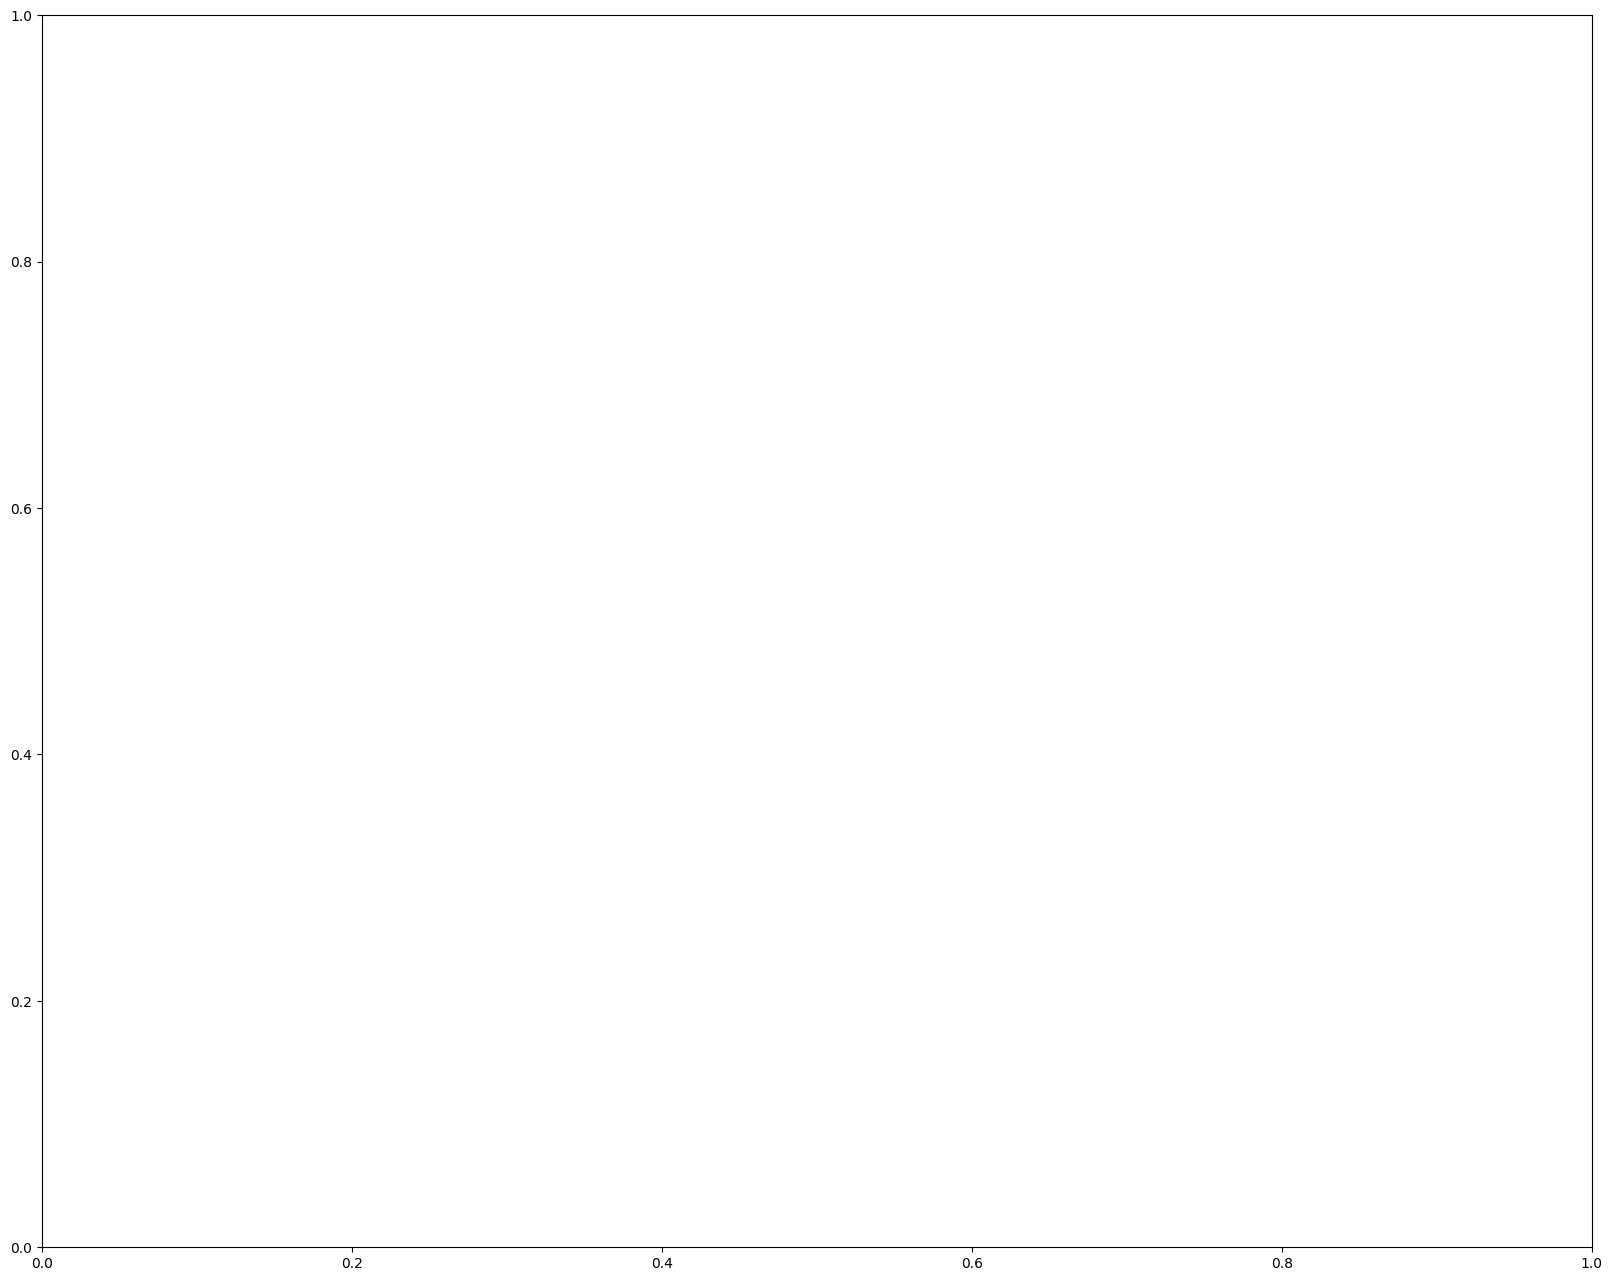

In [76]:
plot_bar_labels_exact_match(gd_best_labels_count, pred_labels_count, "Best Model")

{'emotion': 4, 'logic': 16, 'credibility': 11}
{'emotion': 20, 'logic': 44, 'credibility': 19}


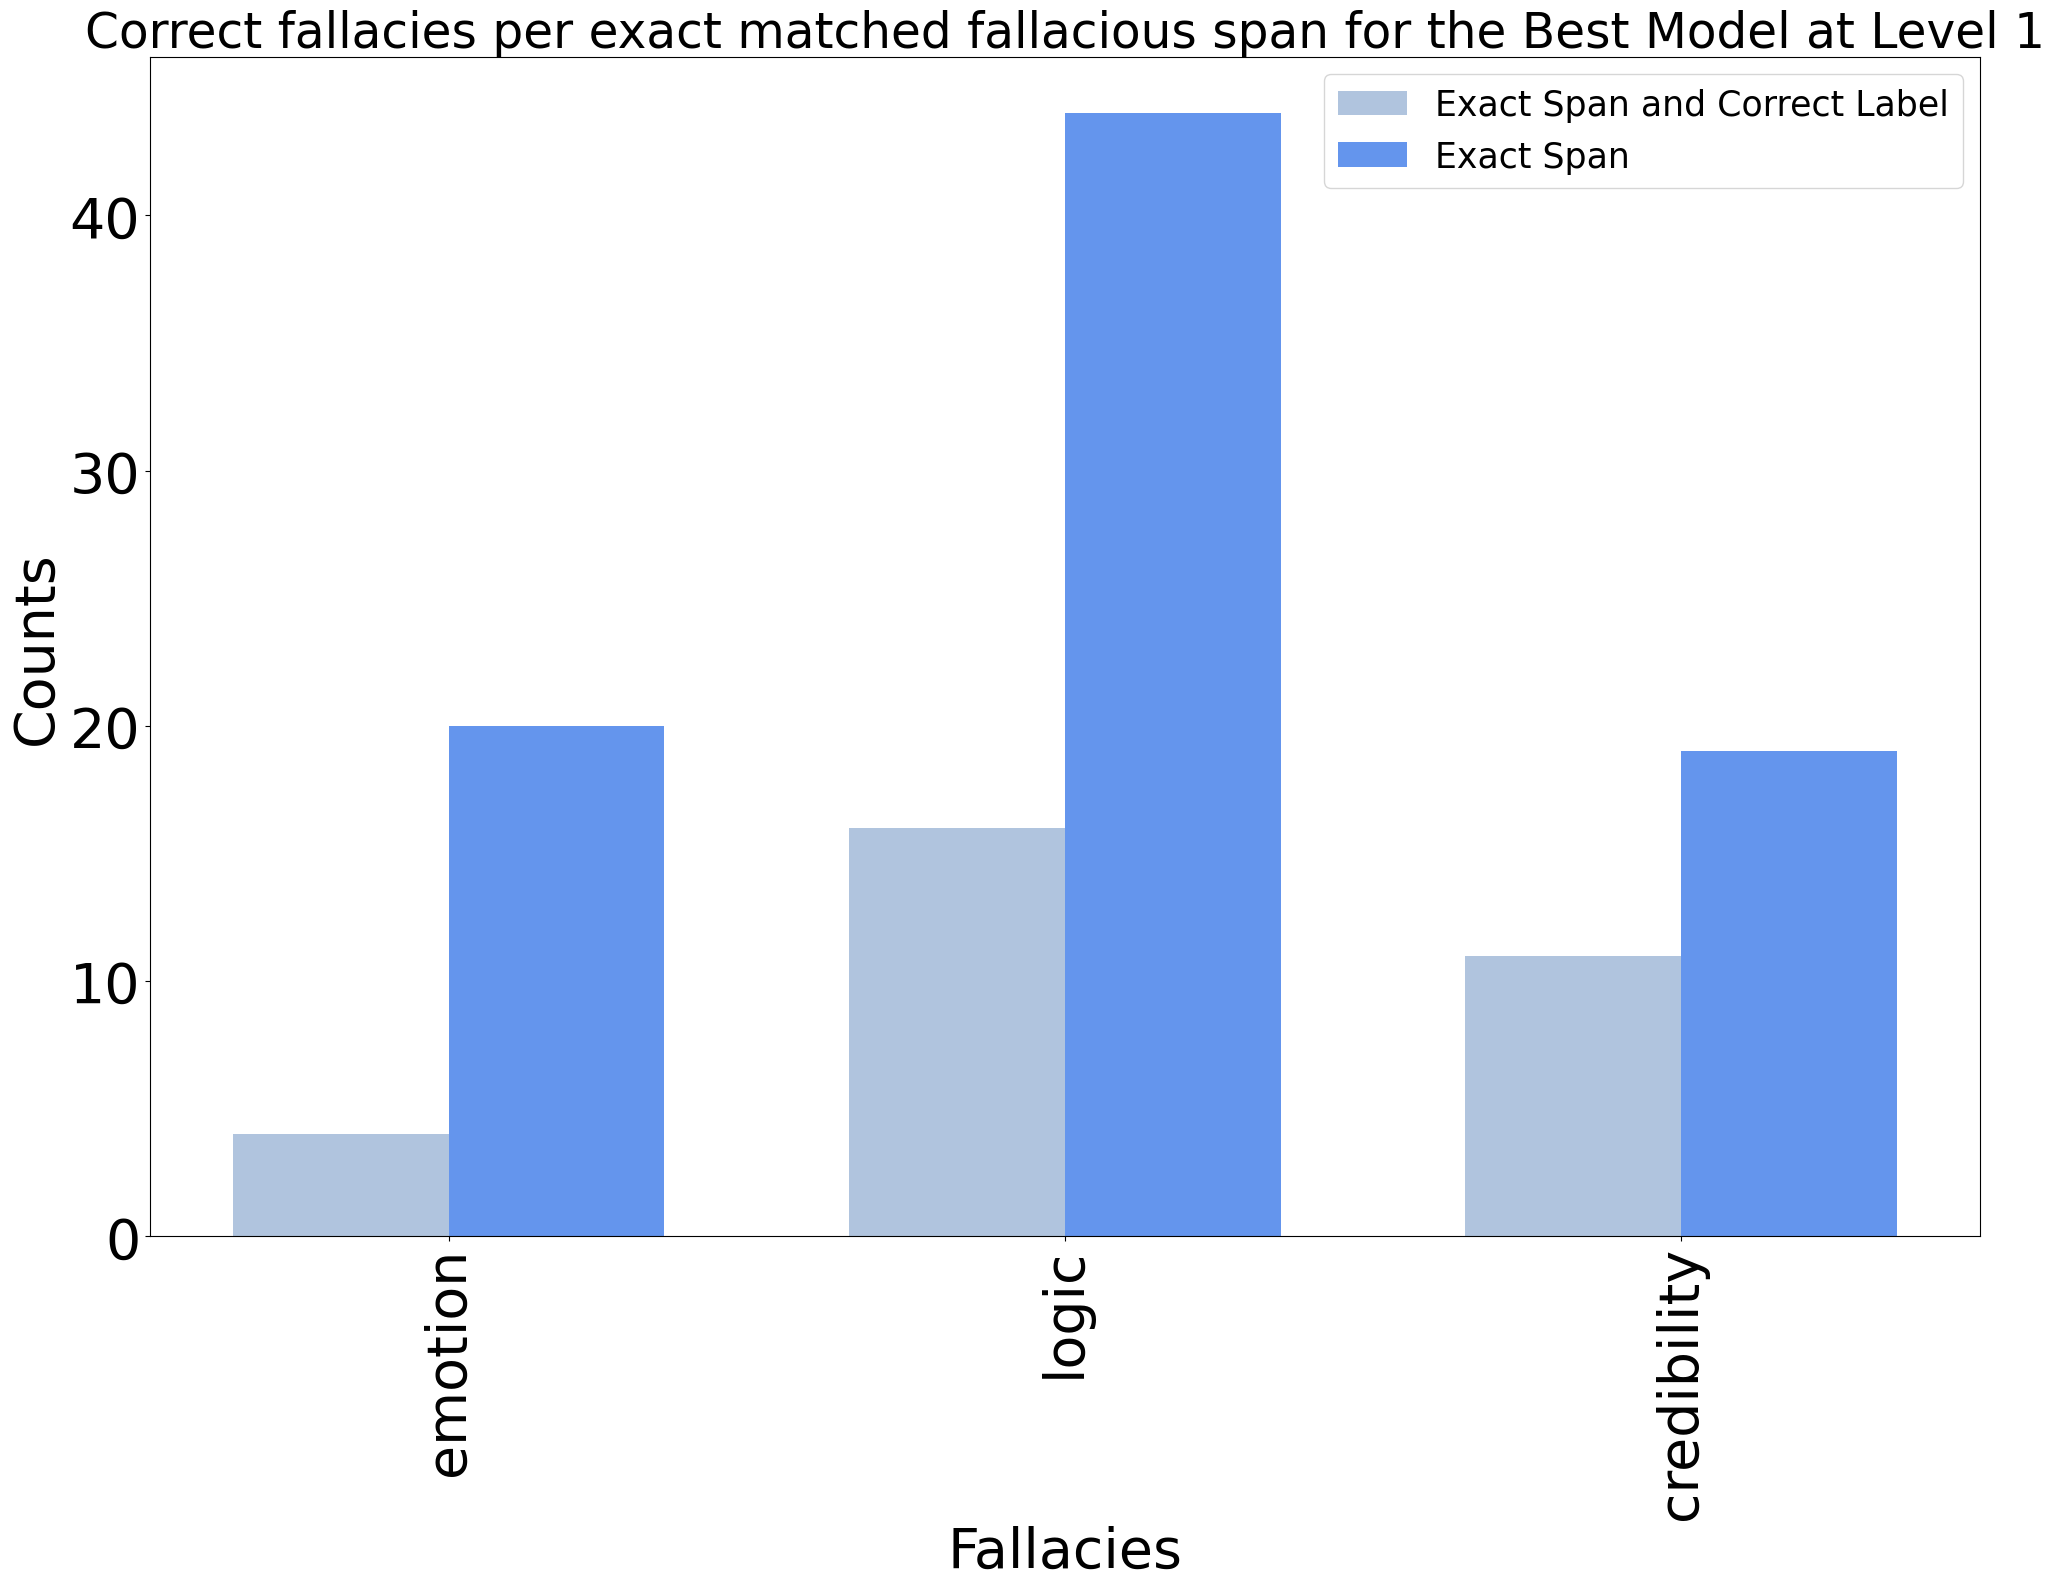

In [ ]:
plot_bar_labels_exact_match(transform_level_2_to_level_1(gd_best_labels_count), transform_level_2_to_level_1(pred_labels_count), "Best Model", "Level 1")

{'appeal to positive emotion': 0, 'appeal to anger': 0, 'appeal to fear': 0, 'appeal to pity': 0, 'appeal to ridicule': 1, 'appeal to worse problems': 1, 'causal oversimplification': 1, 'circular reasoning': 1, 'equivocation': 0, 'false analogy': 1, 'false causality': 1, 'false dilemma': 1, 'hasty generalization': 4, 'slippery slope': 0, 'straw man': 3, 'fallacy of division': 0, 'ad hominem': 1, 'ad populum': 0, 'appeal to (false) authority': 1, 'appeal to nature': 1, 'appeal to tradition': 0, 'guilt by association': 0, 'tu quoque': 1}
{'appeal to positive emotion': 1, 'appeal to anger': 4, 'appeal to fear': 3, 'appeal to pity': 0, 'appeal to ridicule': 6, 'appeal to worse problems': 5, 'causal oversimplification': 13, 'circular reasoning': 7, 'equivocation': 3, 'false analogy': 2, 'false causality': 8, 'false dilemma': 8, 'hasty generalization': 15, 'slippery slope': 2, 'straw man': 6, 'fallacy of division': 0, 'ad hominem': 6, 'ad populum': 6, 'appeal to (false) authority': 4, 'appea

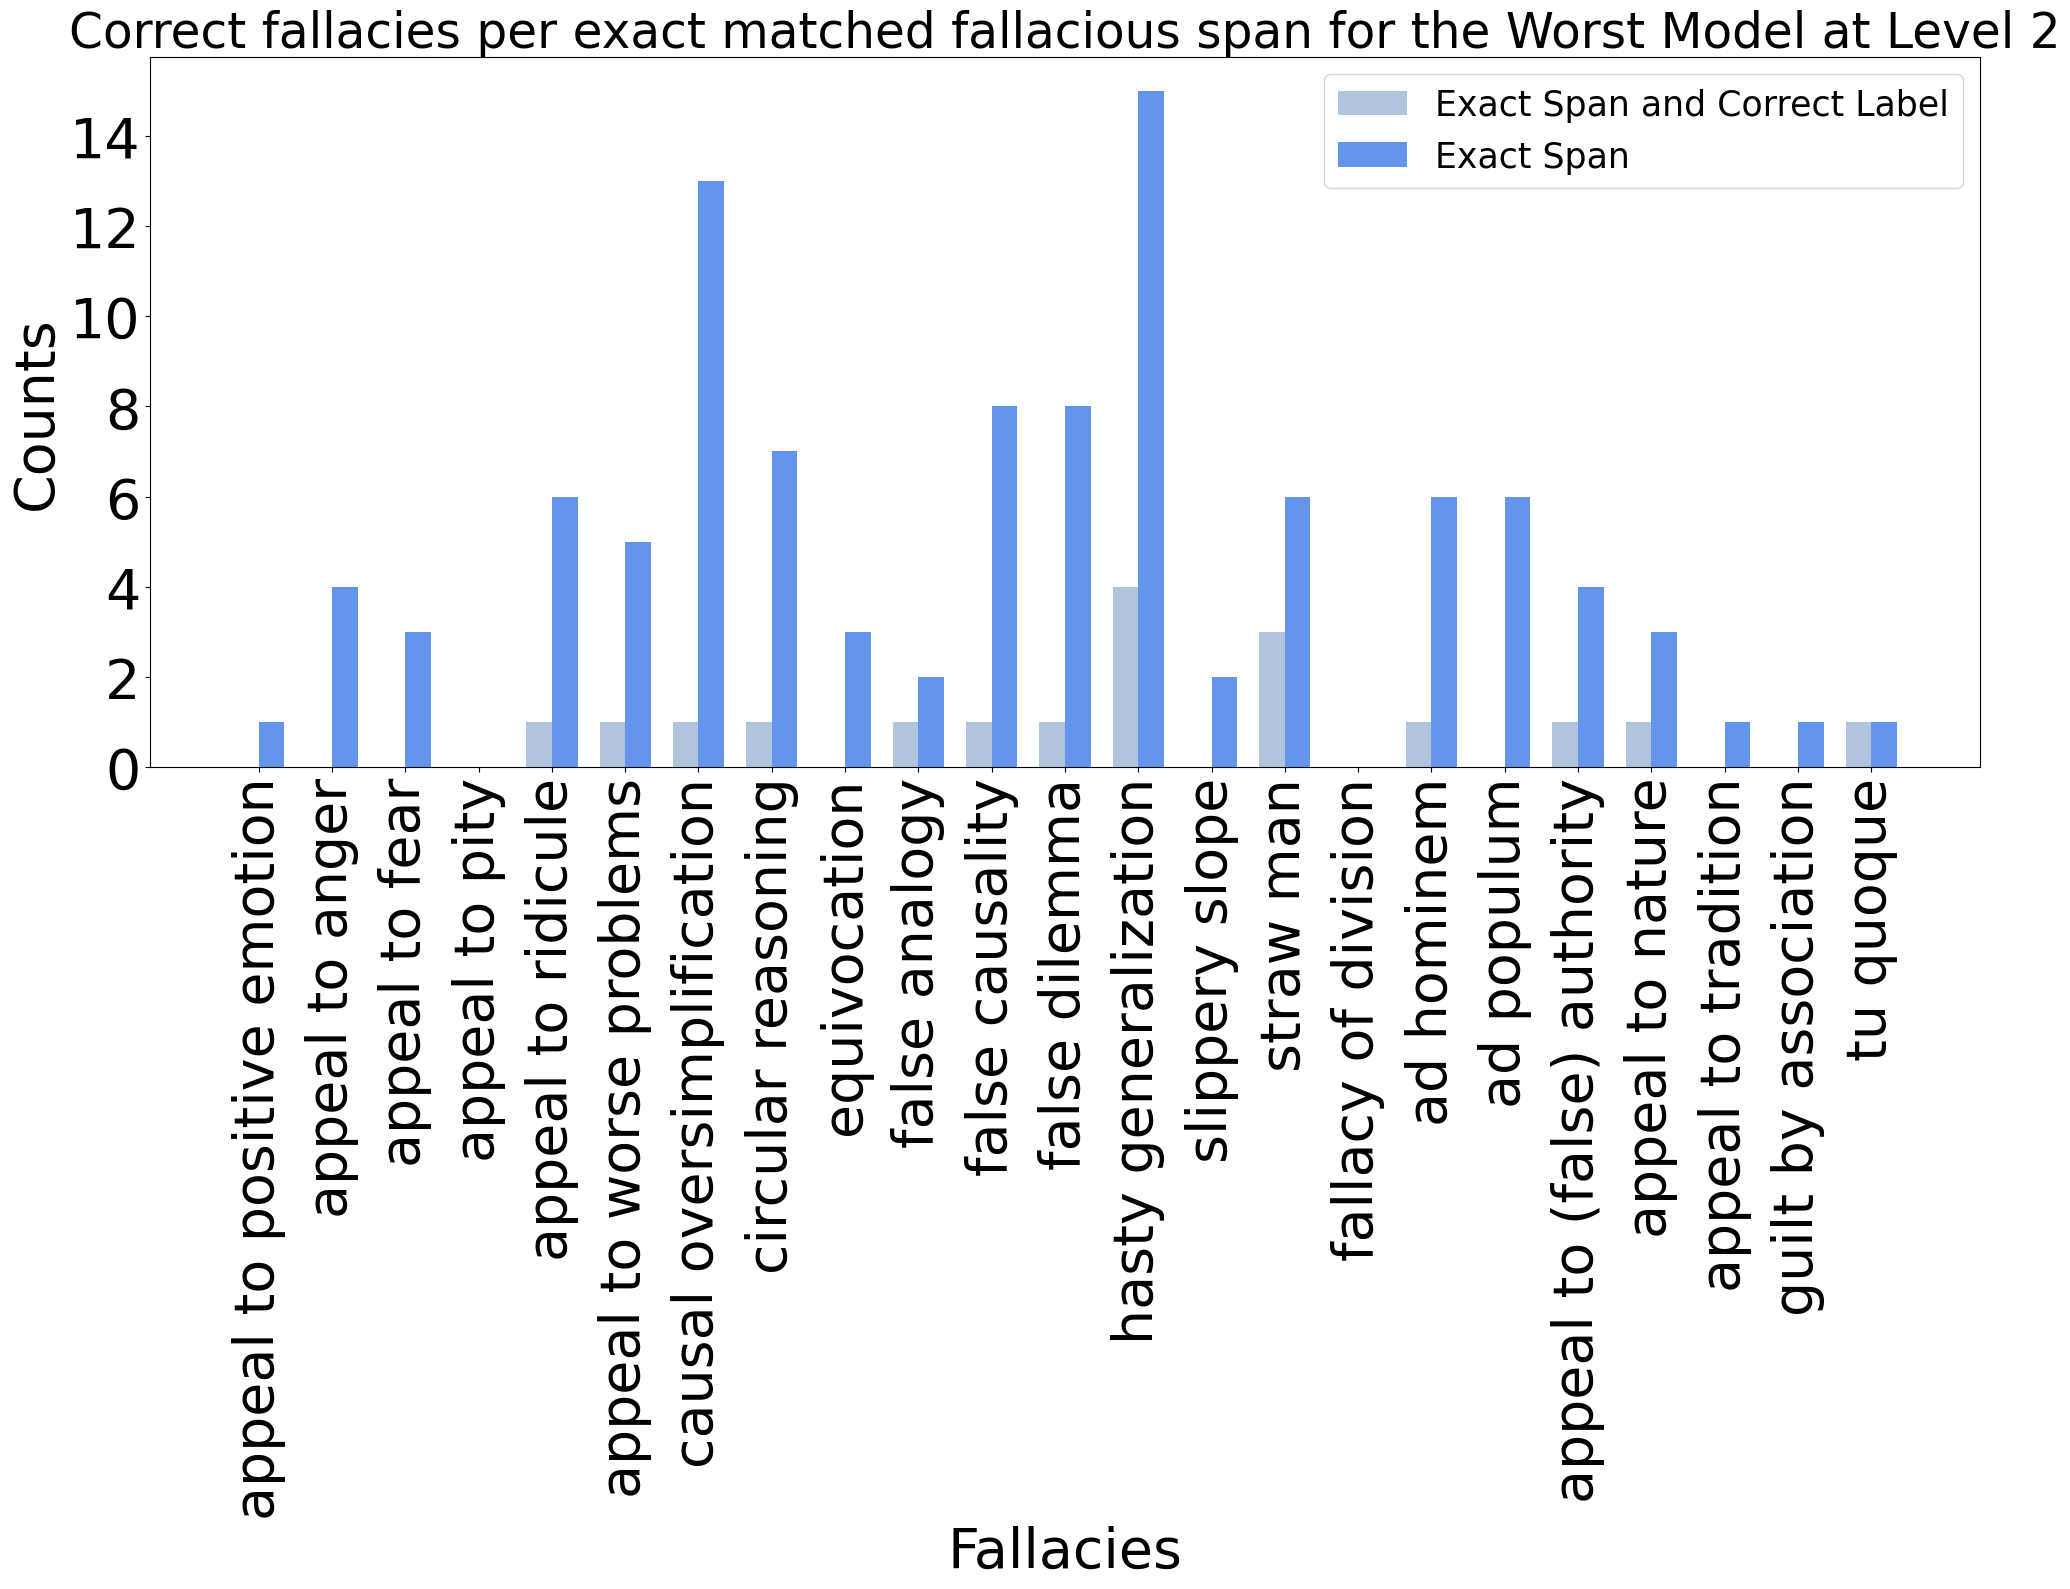

In [ ]:
plot_bar_labels_exact_match(gd_worst_labels_count, pred_worst_labels_count, "Worst Model")

{'emotion': 2, 'logic': 12, 'credibility': 4}
{'emotion': 19, 'logic': 64, 'credibility': 22}


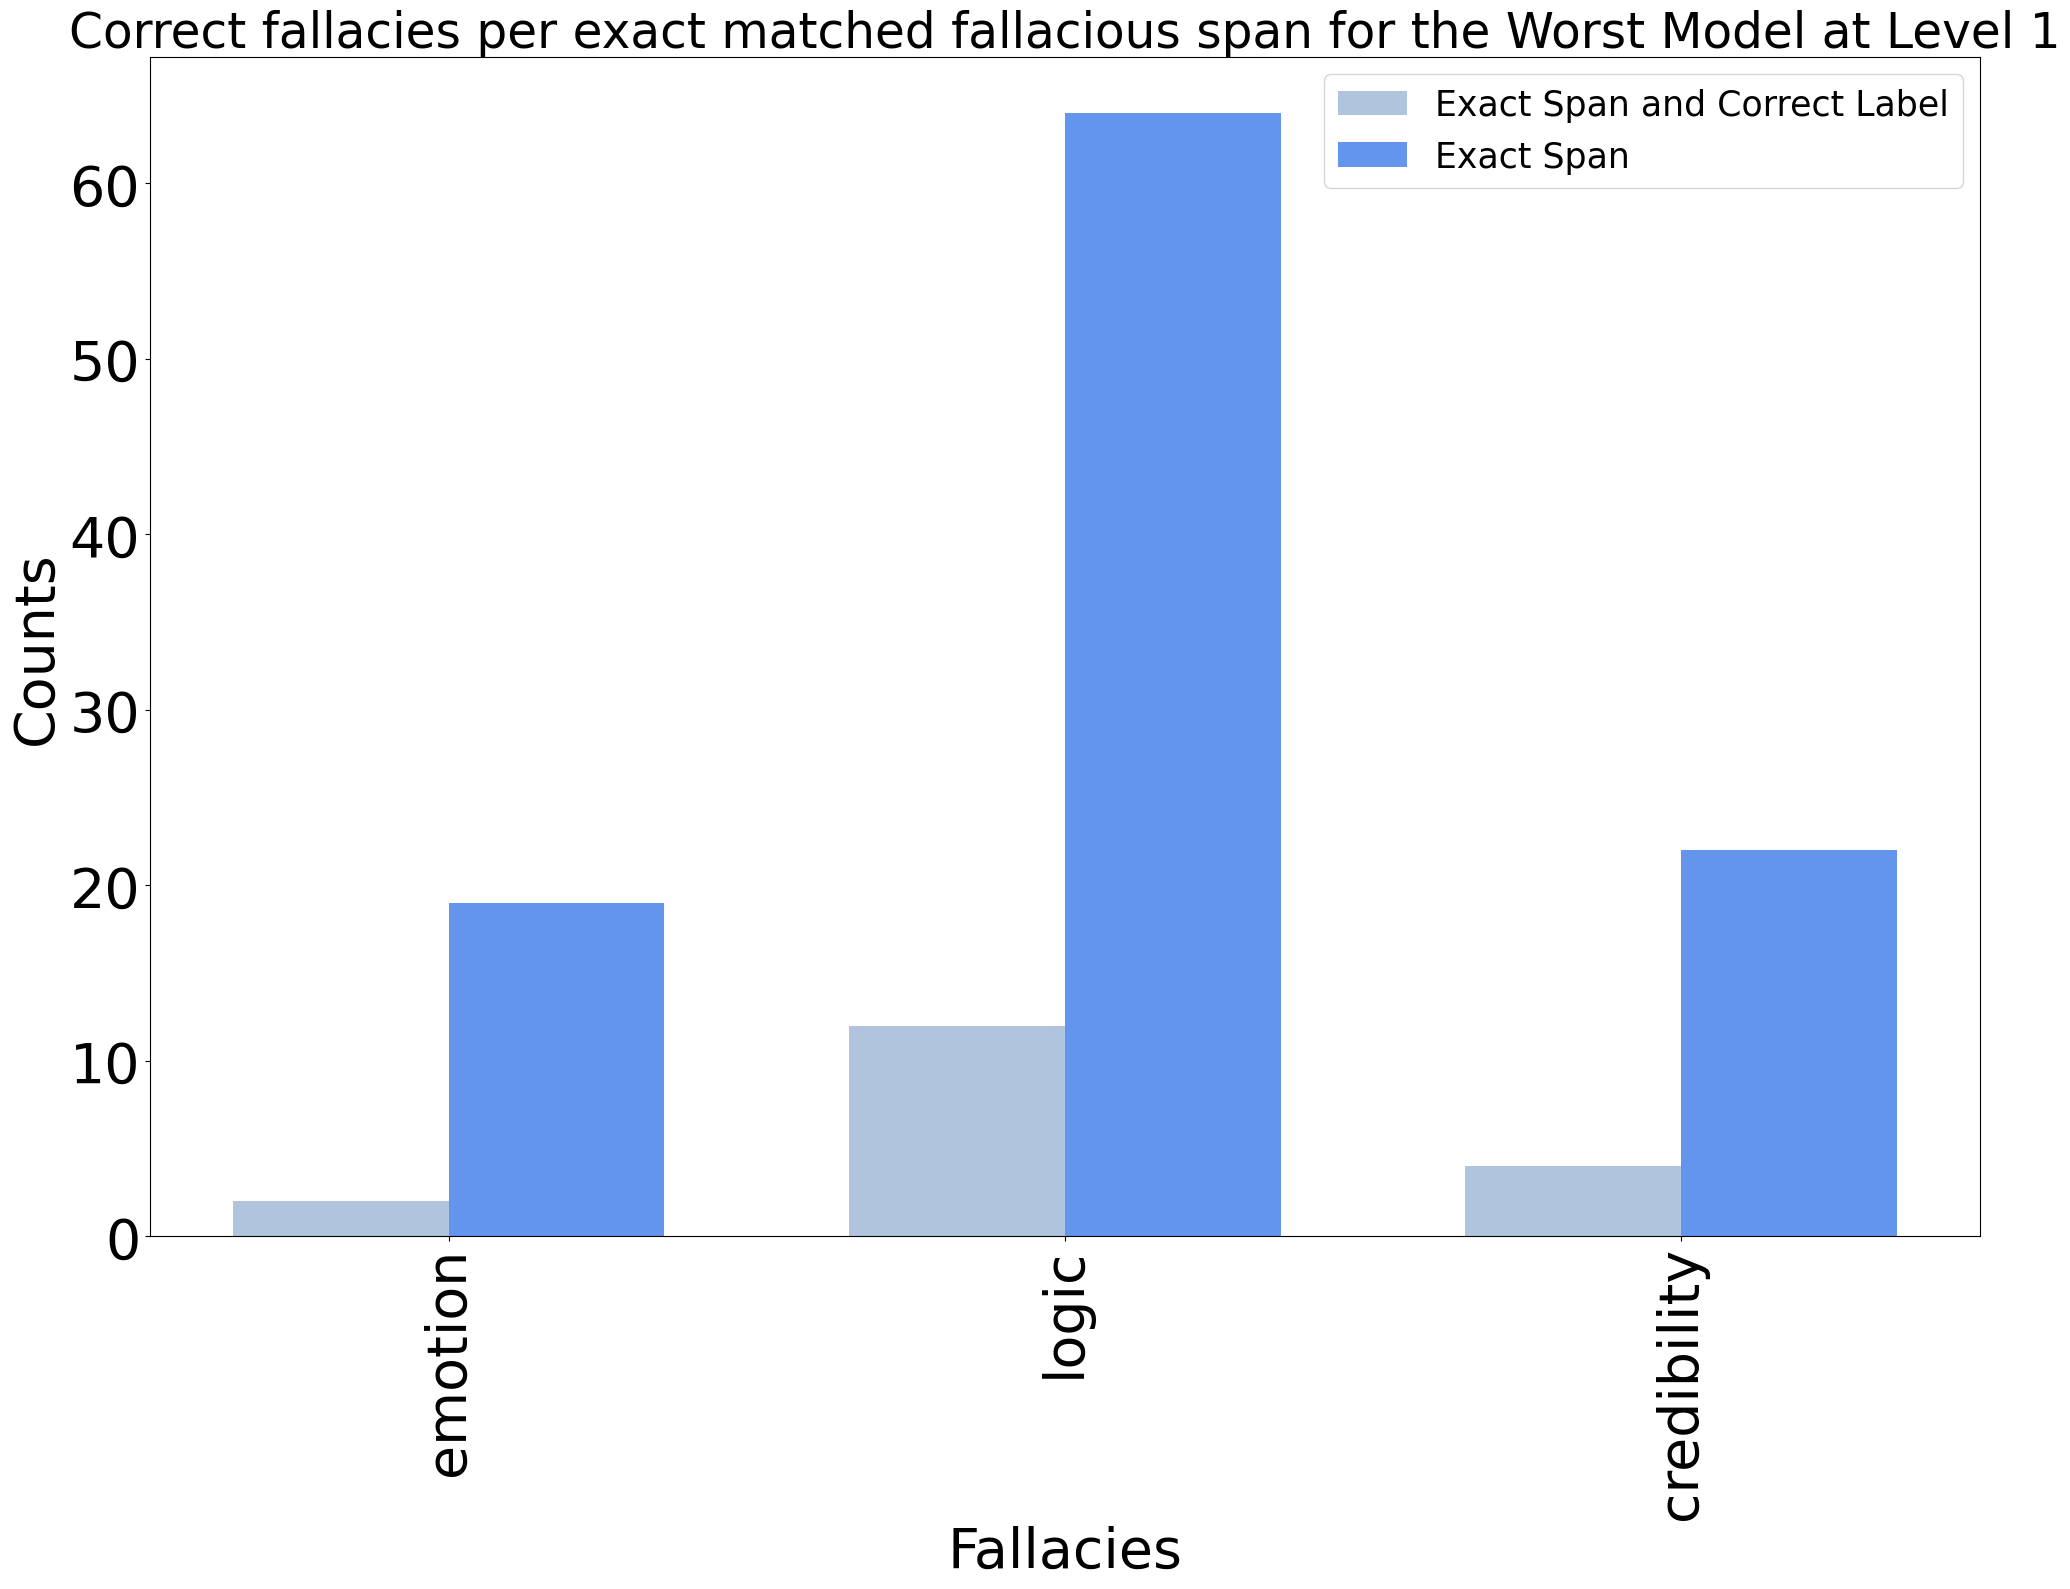

In [ ]:
plot_bar_labels_exact_match(transform_level_2_to_level_1(gd_worst_labels_count), transform_level_2_to_level_1(pred_worst_labels_count), "Worst Model", "Level 1")

## Error Analysis of Users

In [ ]:
gold_dataset = read_jsonl("datasets/user_study_examples_with_labels.jsonl")
pred_dataset_user_1 = read_jsonl("datasets/users_results/user1.jsonl")
pred_dataset_user_2 = read_jsonl("datasets/users_results/user2.jsonl")
pred_dataset_user_3 = read_jsonl("datasets/users_results/user4.jsonl")
pred_dataset_user_4 = read_jsonl("datasets/users_results/user5.jsonl")

all_y_true = []
all_y_pred_user_1 = []
all_y_pred_user_2 = []
all_y_pred_user_3 = []
all_y_pred_user_4 = []

for gold, pred_user_1, pred_user_2, pred_user_3, pred_user_4 in zip(gold_dataset, pred_dataset_user_1, pred_dataset_user_2, pred_dataset_user_3, pred_dataset_user_4):
    all_y_true.append(build_ground_truth_spans(gold["text"], gold["labels"]))
    all_y_pred_user_1.append(build_prediction_user_spans(pred_user_1["text"], pred_user_1["label"]))
    all_y_pred_user_2.append(build_prediction_user_spans(pred_user_2["text"], pred_user_2["label"]))
    all_y_pred_user_3.append(build_prediction_user_spans(pred_user_3["text"], pred_user_3["label"]))
    all_y_pred_user_4.append(build_prediction_user_spans(pred_user_4["text"], pred_user_4["label"]))


In [ ]:
all_dict_gold_spans, gold_labels_count = gold_truth_per_span(all_y_true)
all_dict_best_pred_span_user_1, best_pred_labels_count_user_1 = predictions_per_span(all_y_pred_user_1)
all_dict_best_pred_span_user_2, best_pred_labels_count_user_2 = predictions_per_span(all_y_pred_user_2)
all_dict_best_pred_span_user_3, best_pred_labels_count_user_3 = predictions_per_span(all_y_pred_user_3)
all_dict_best_pred_span_user_4, best_pred_labels_count_user_4 = predictions_per_span(all_y_pred_user_4)

Sample Gold Standard {'appeal to positive emotion': 0, 'appeal to anger': 0, 'appeal to fear': 0, 'appeal to pity': 0, 'appeal to ridicule': 5, 'appeal to worse problems': 1, 'causal oversimplification': 2, 'circular reasoning': 1, 'equivocation': 1, 'false analogy': 0, 'false causality': 2, 'false dilemma': 2, 'hasty generalization': 3, 'slippery slope': 1, 'straw man': 3, 'fallacy of division': 0, 'ad hominem': 4, 'ad populum': 1, 'appeal to (false) authority': 1, 'appeal to nature': 0, 'appeal to tradition': 2, 'guilt by association': 1, 'tu quoque': 0}


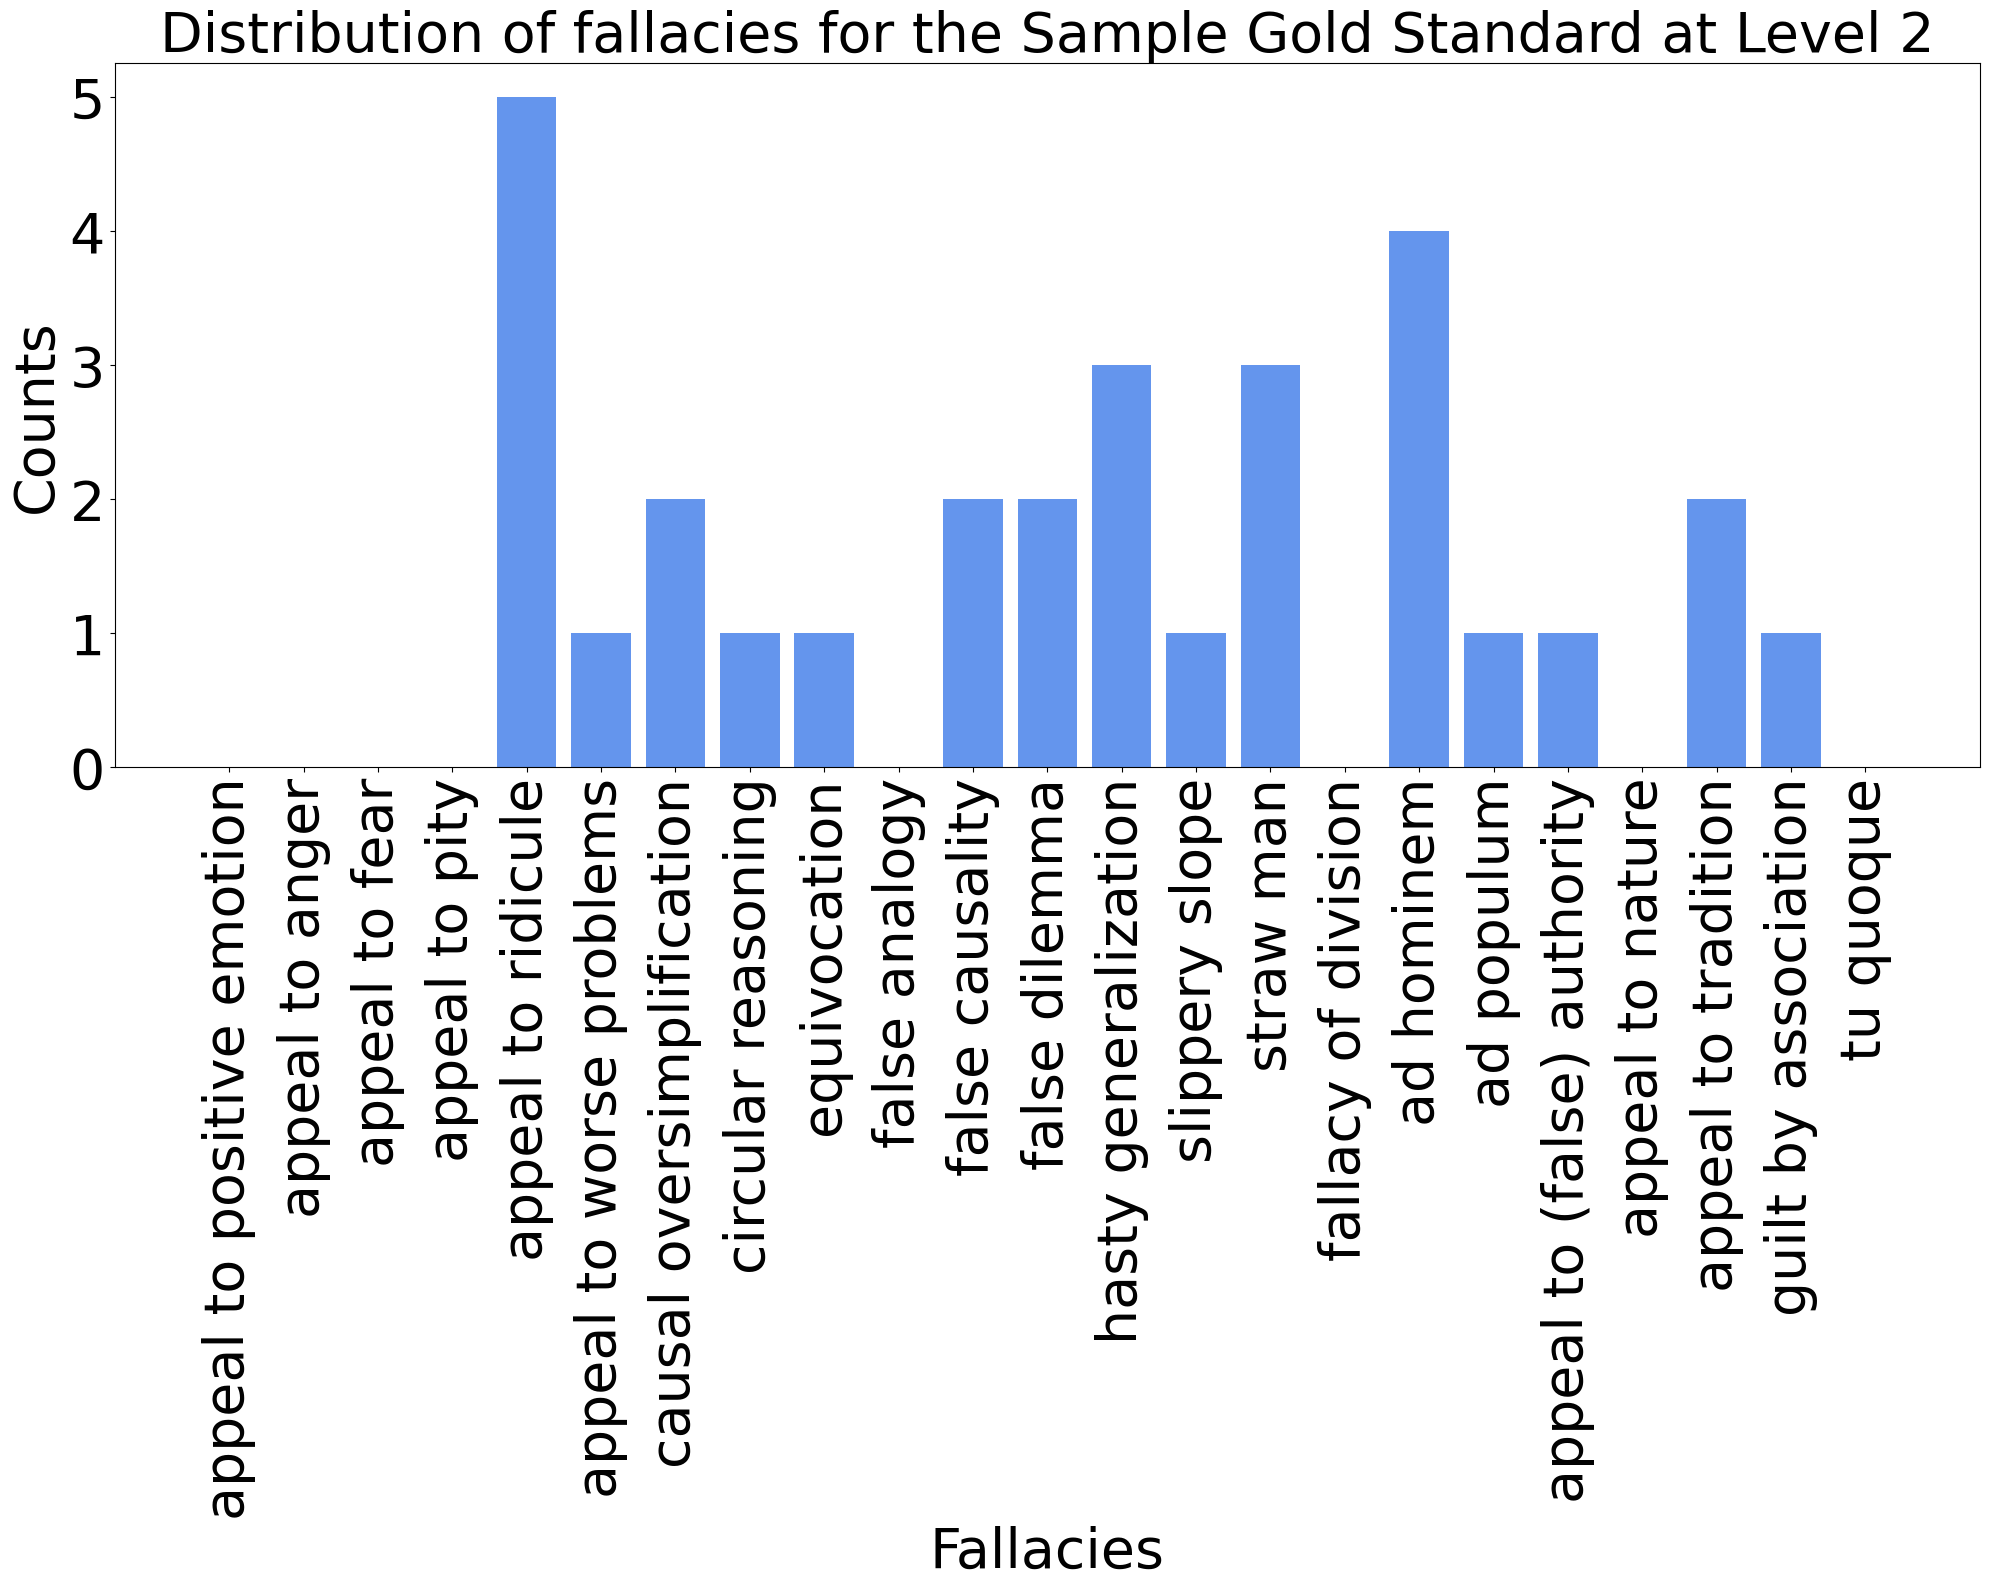

In [ ]:
plot_bar_labels_count(gold_labels_count, "Sample Gold Standard", "Level 2")

Sample Gold Standard {'emotion': 6, 'logic': 15, 'credibility': 9, 'unknown': 0}


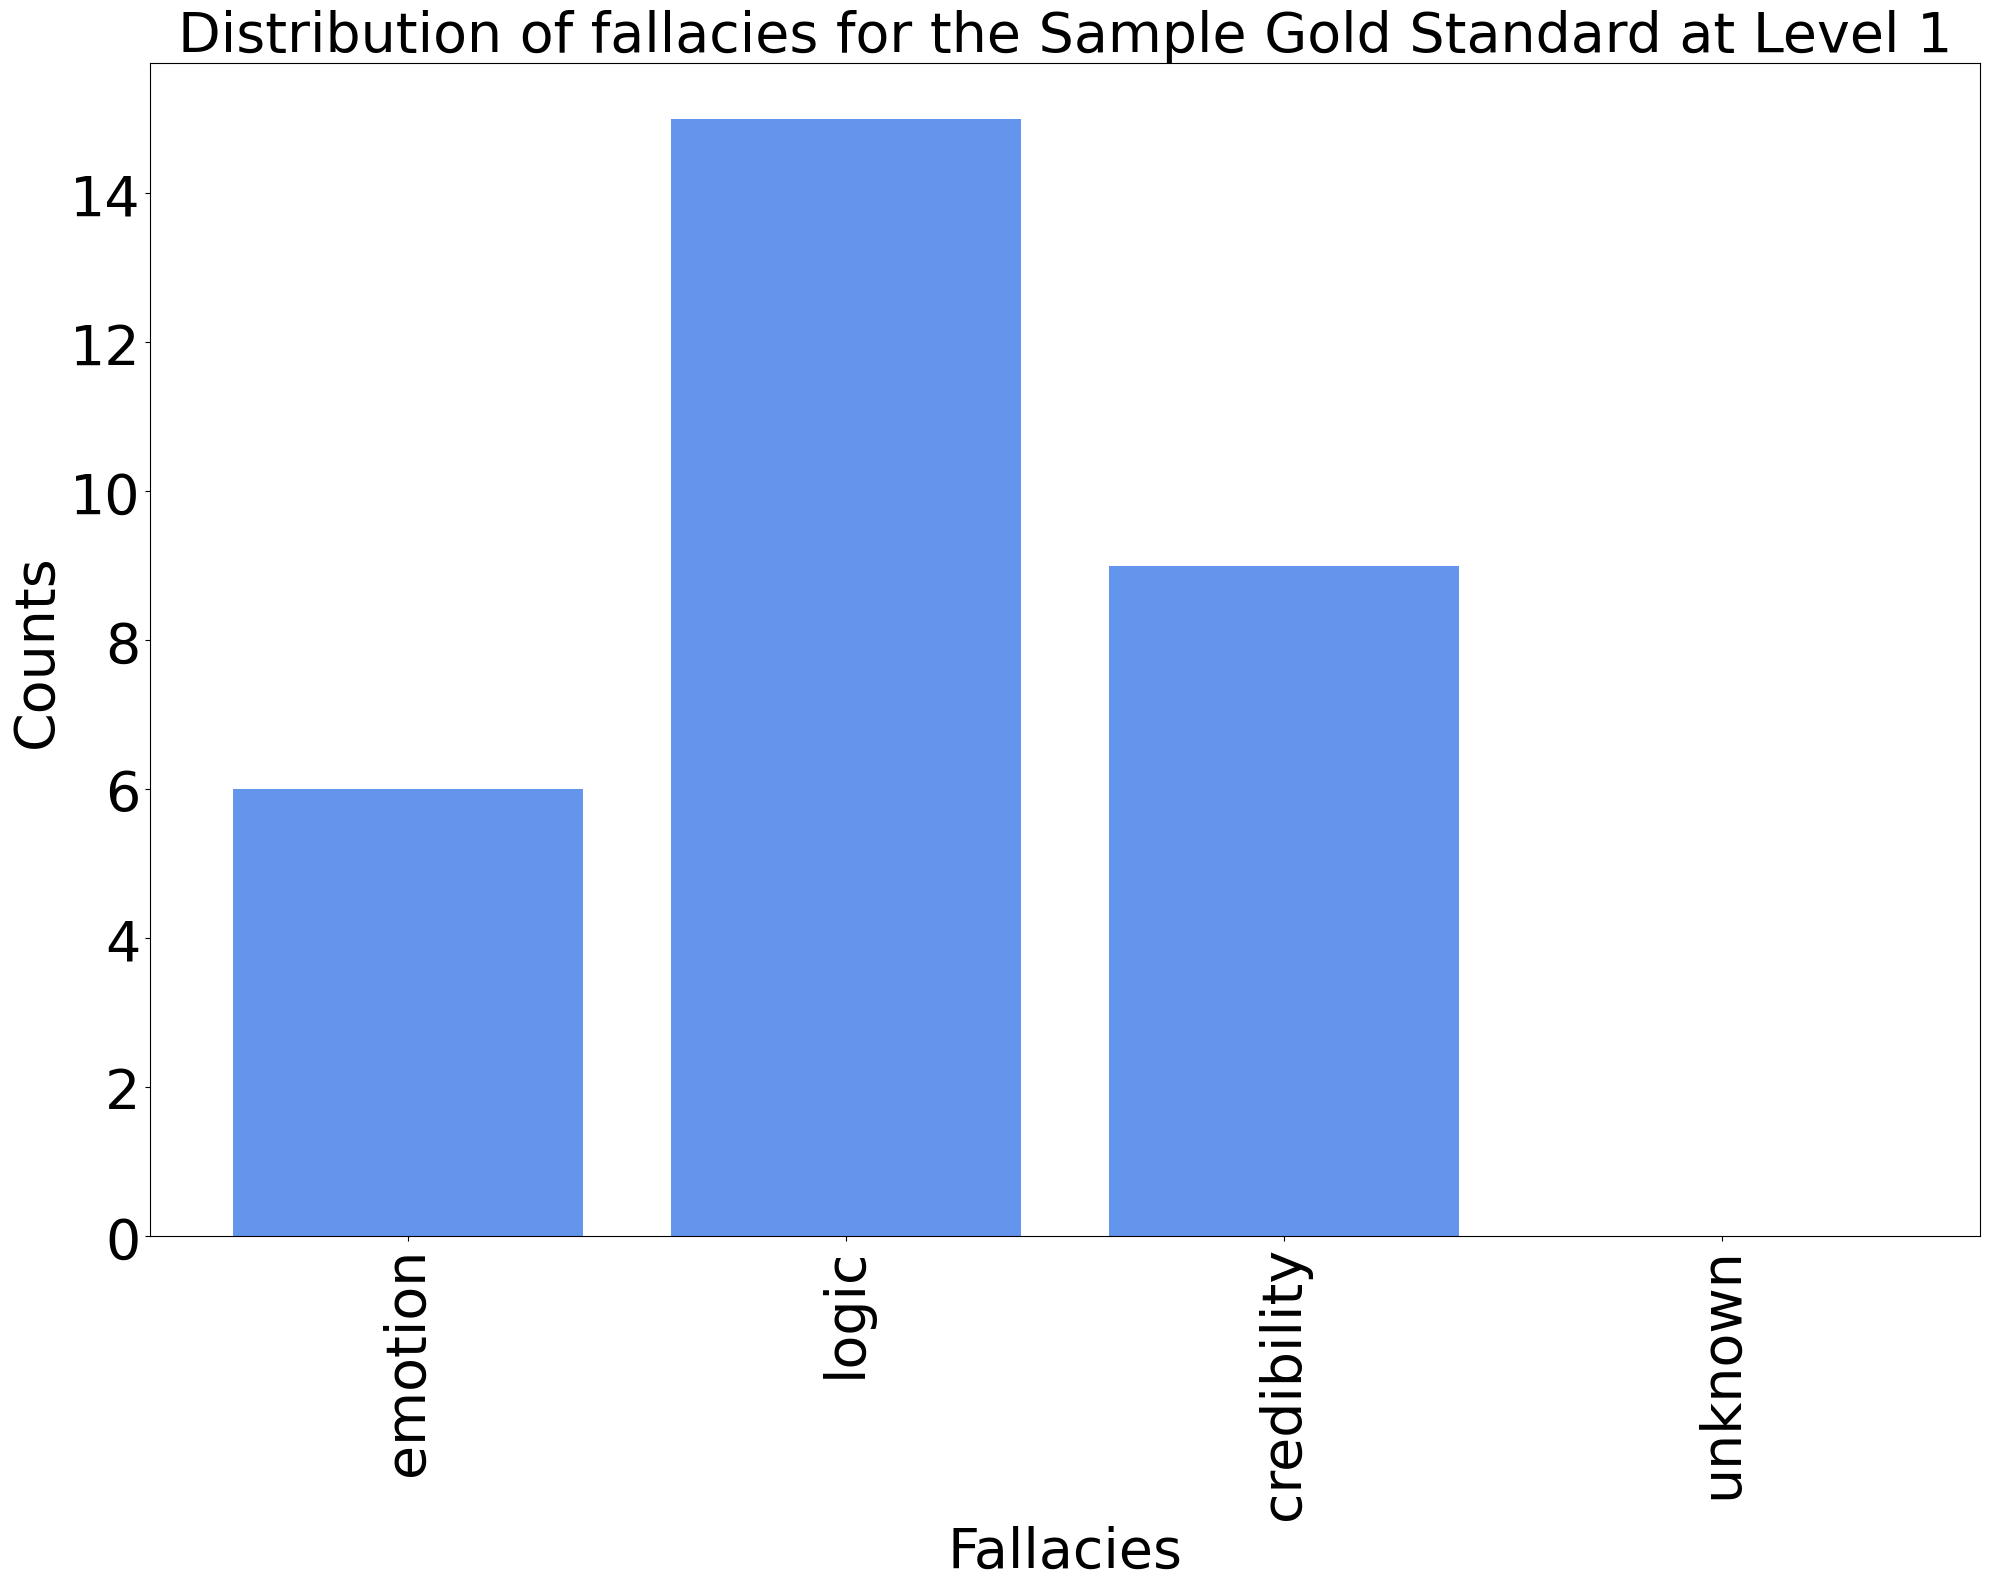

In [ ]:
plot_bar_labels_count(transform_level_2_to_level_1(gold_labels_count), "Sample Gold Standard", "Level 1")

User 1 {'appeal to positive emotion': 2, 'appeal to anger': 1, 'appeal to fear': 1, 'appeal to pity': 0, 'appeal to ridicule': 8, 'appeal to worse problems': 3, 'causal oversimplification': 2, 'circular reasoning': 2, 'equivocation': 1, 'false analogy': 1, 'false causality': 3, 'false dilemma': 1, 'hasty generalization': 4, 'slippery slope': 1, 'straw man': 2, 'fallacy of division': 3, 'ad hominem': 4, 'ad populum': 3, 'appeal to (false) authority': 0, 'appeal to nature': 0, 'appeal to tradition': 1, 'guilt by association': 1, 'tu quoque': 0, 'unknown': 0}


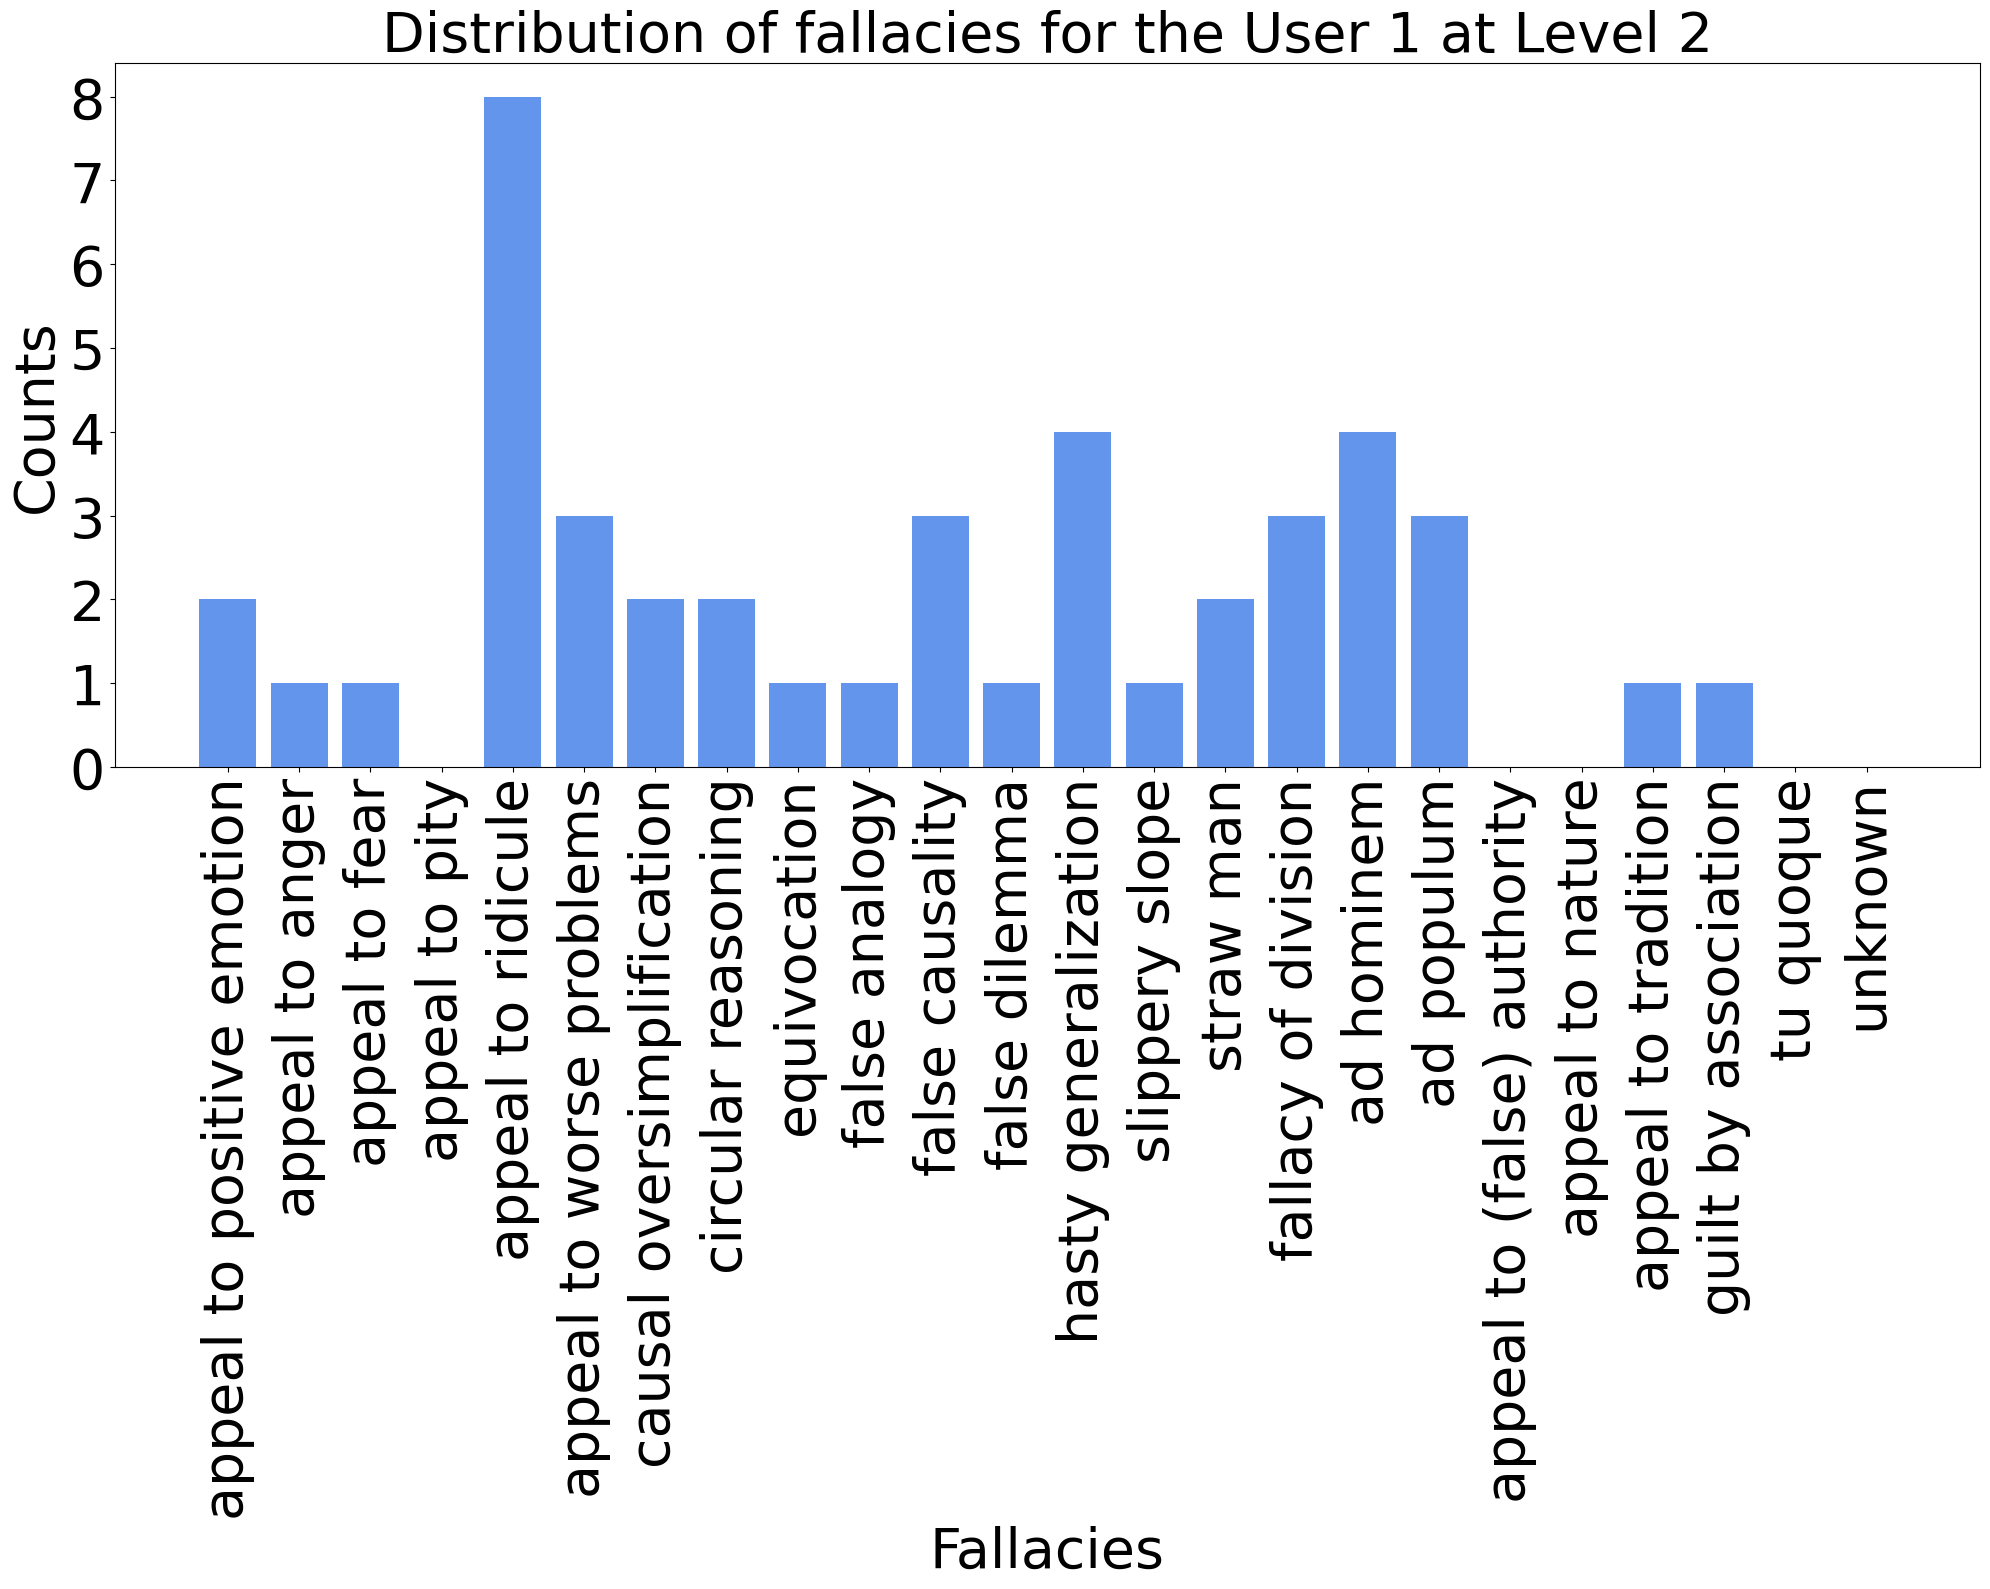

In [ ]:
plot_bar_labels_count(best_pred_labels_count_user_1, "User 1", "Level 2")

User 1 {'emotion': 15, 'logic': 20, 'credibility': 9, 'unknown': 0}


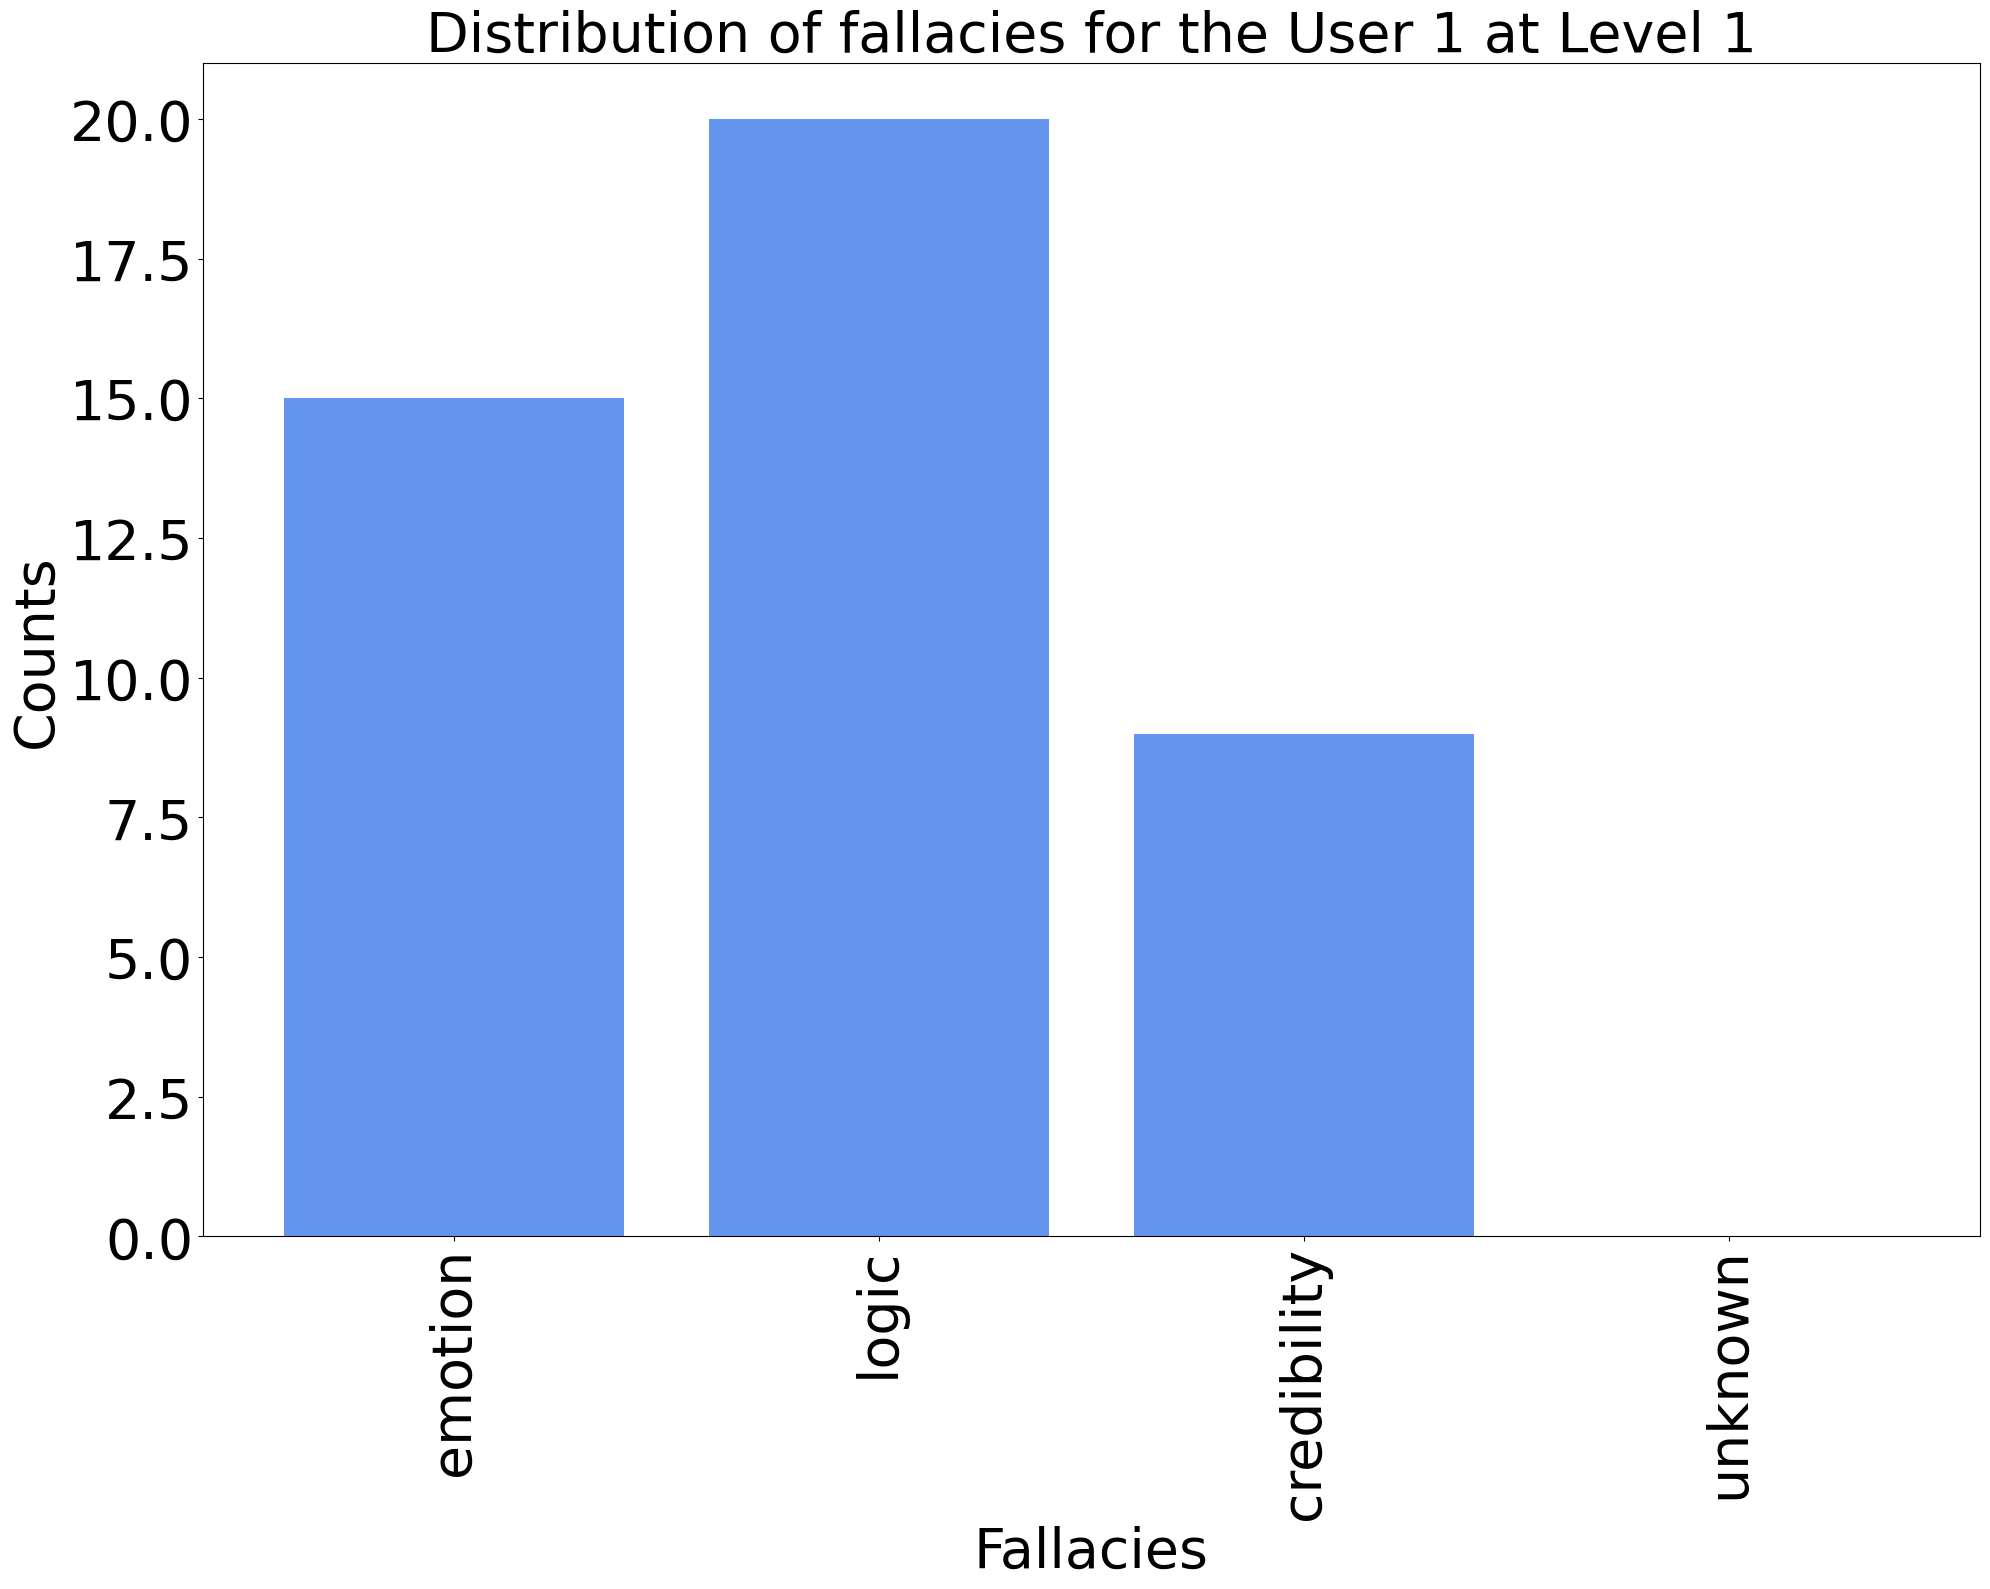

In [ ]:
plot_bar_labels_count(transform_level_2_to_level_1(best_pred_labels_count_user_1), "User 1", "Level 1")

User 2 {'appeal to positive emotion': 0, 'appeal to anger': 0, 'appeal to fear': 1, 'appeal to pity': 0, 'appeal to ridicule': 1, 'appeal to worse problems': 0, 'causal oversimplification': 2, 'circular reasoning': 0, 'equivocation': 0, 'false analogy': 1, 'false causality': 4, 'false dilemma': 1, 'hasty generalization': 2, 'slippery slope': 1, 'straw man': 5, 'fallacy of division': 0, 'ad hominem': 1, 'ad populum': 1, 'appeal to (false) authority': 2, 'appeal to nature': 1, 'appeal to tradition': 1, 'guilt by association': 3, 'tu quoque': 1, 'unknown': 0}


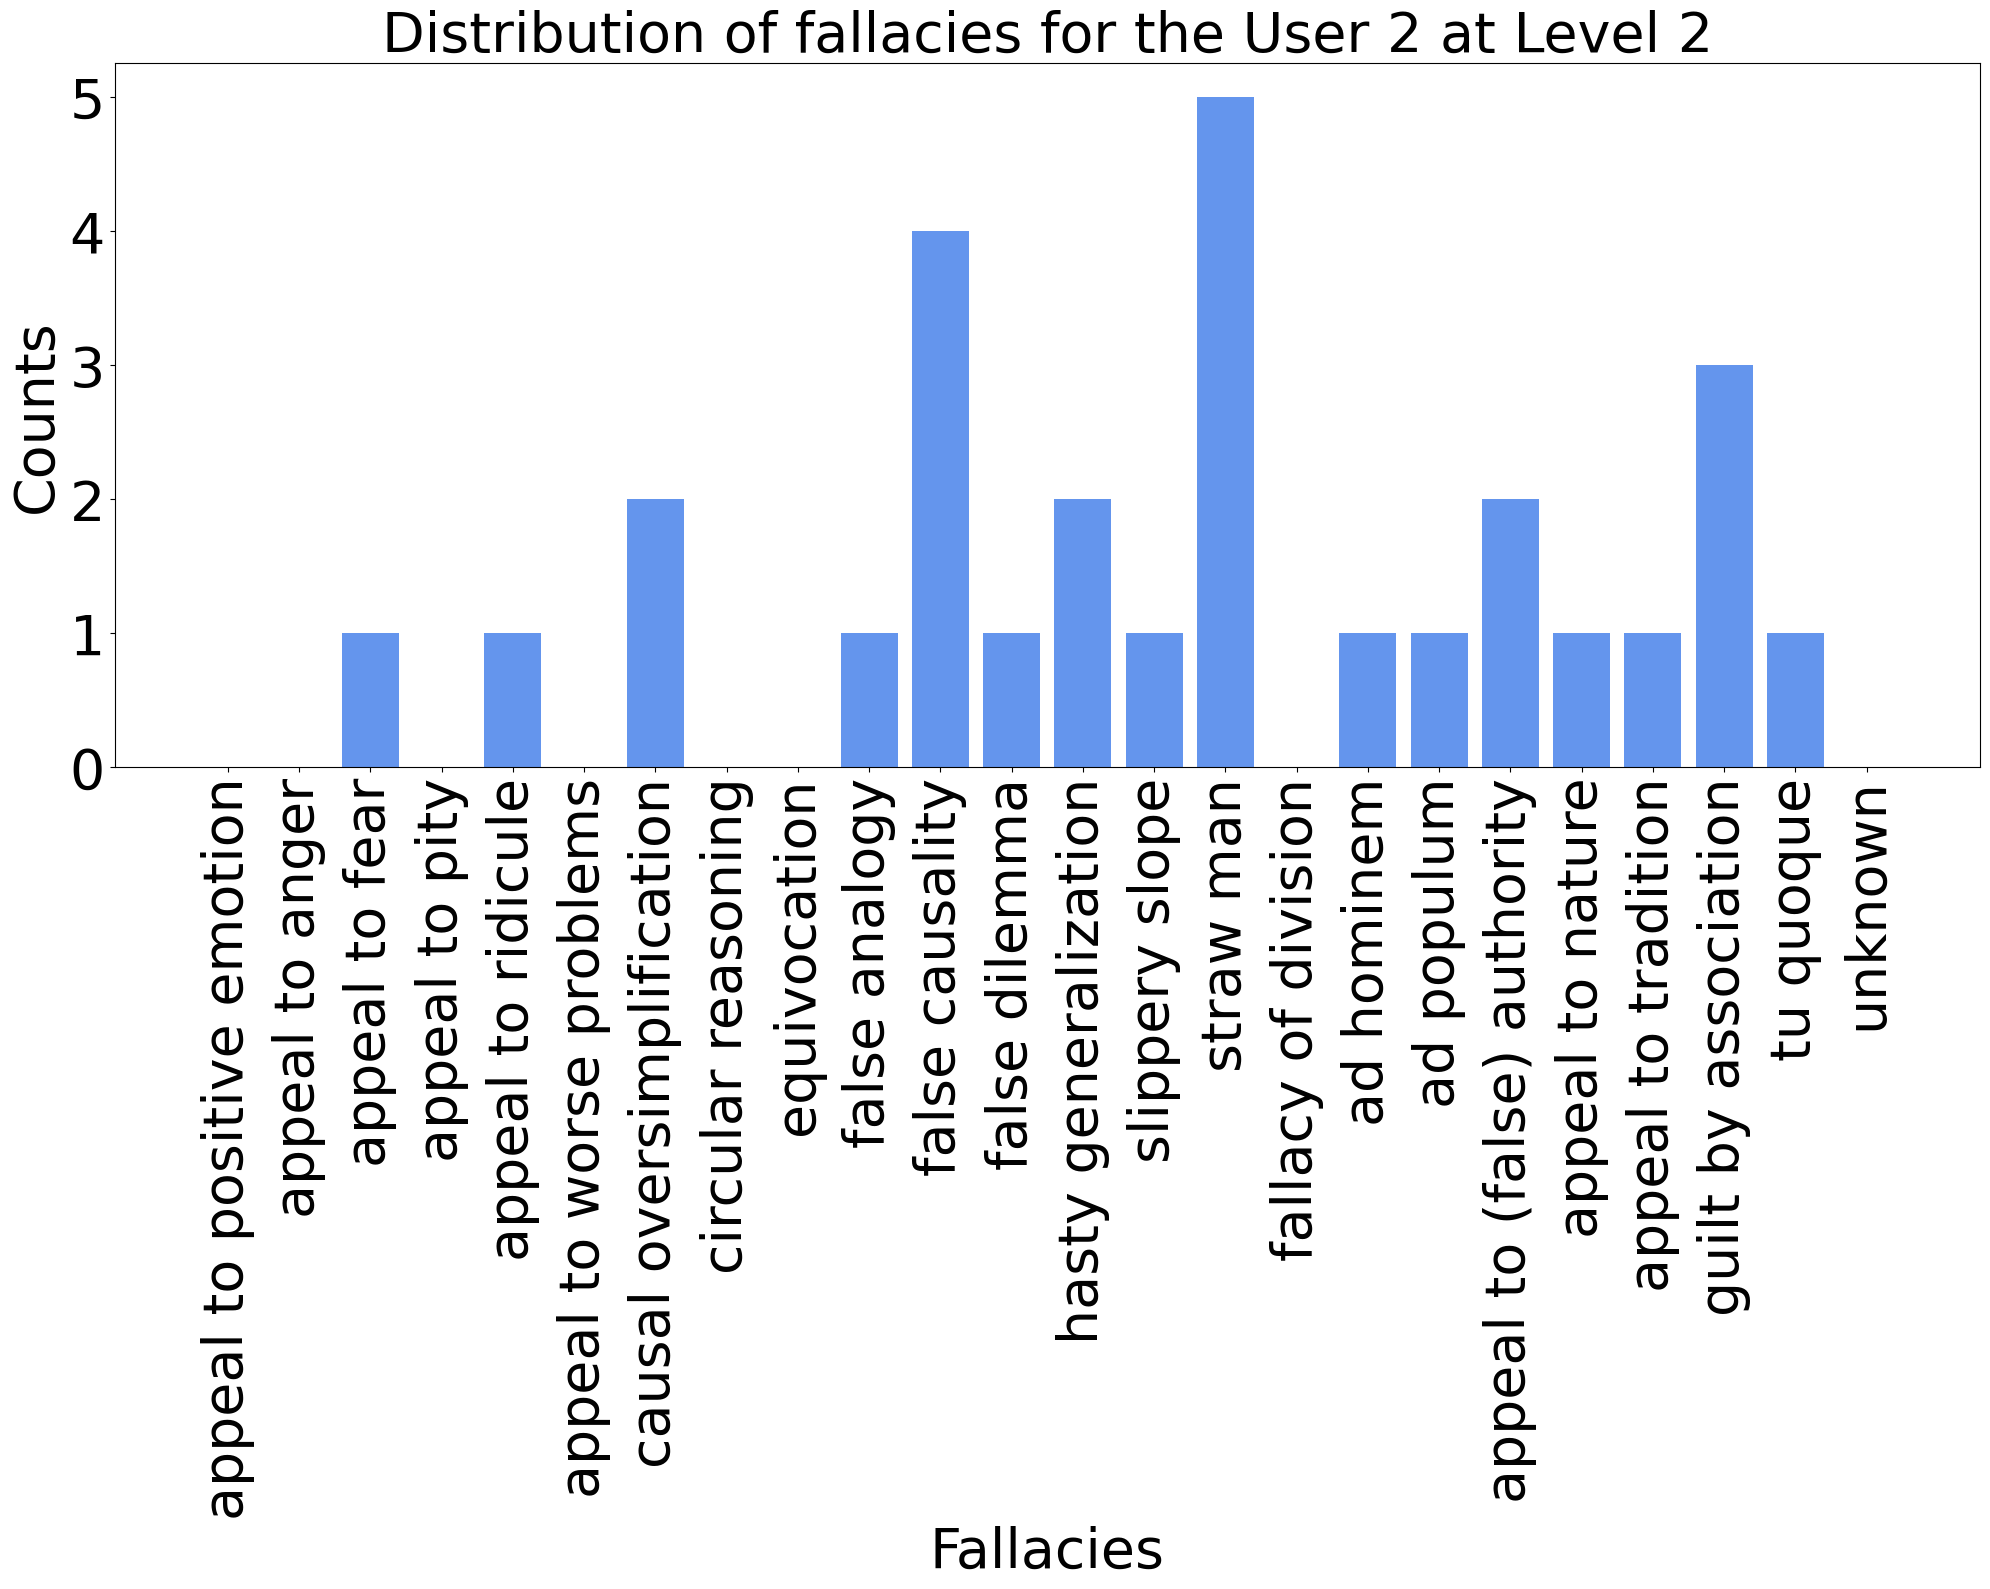

In [ ]:
plot_bar_labels_count(best_pred_labels_count_user_2, "User 2", "Level 2")

User 2 {'emotion': 2, 'logic': 16, 'credibility': 10, 'unknown': 0}


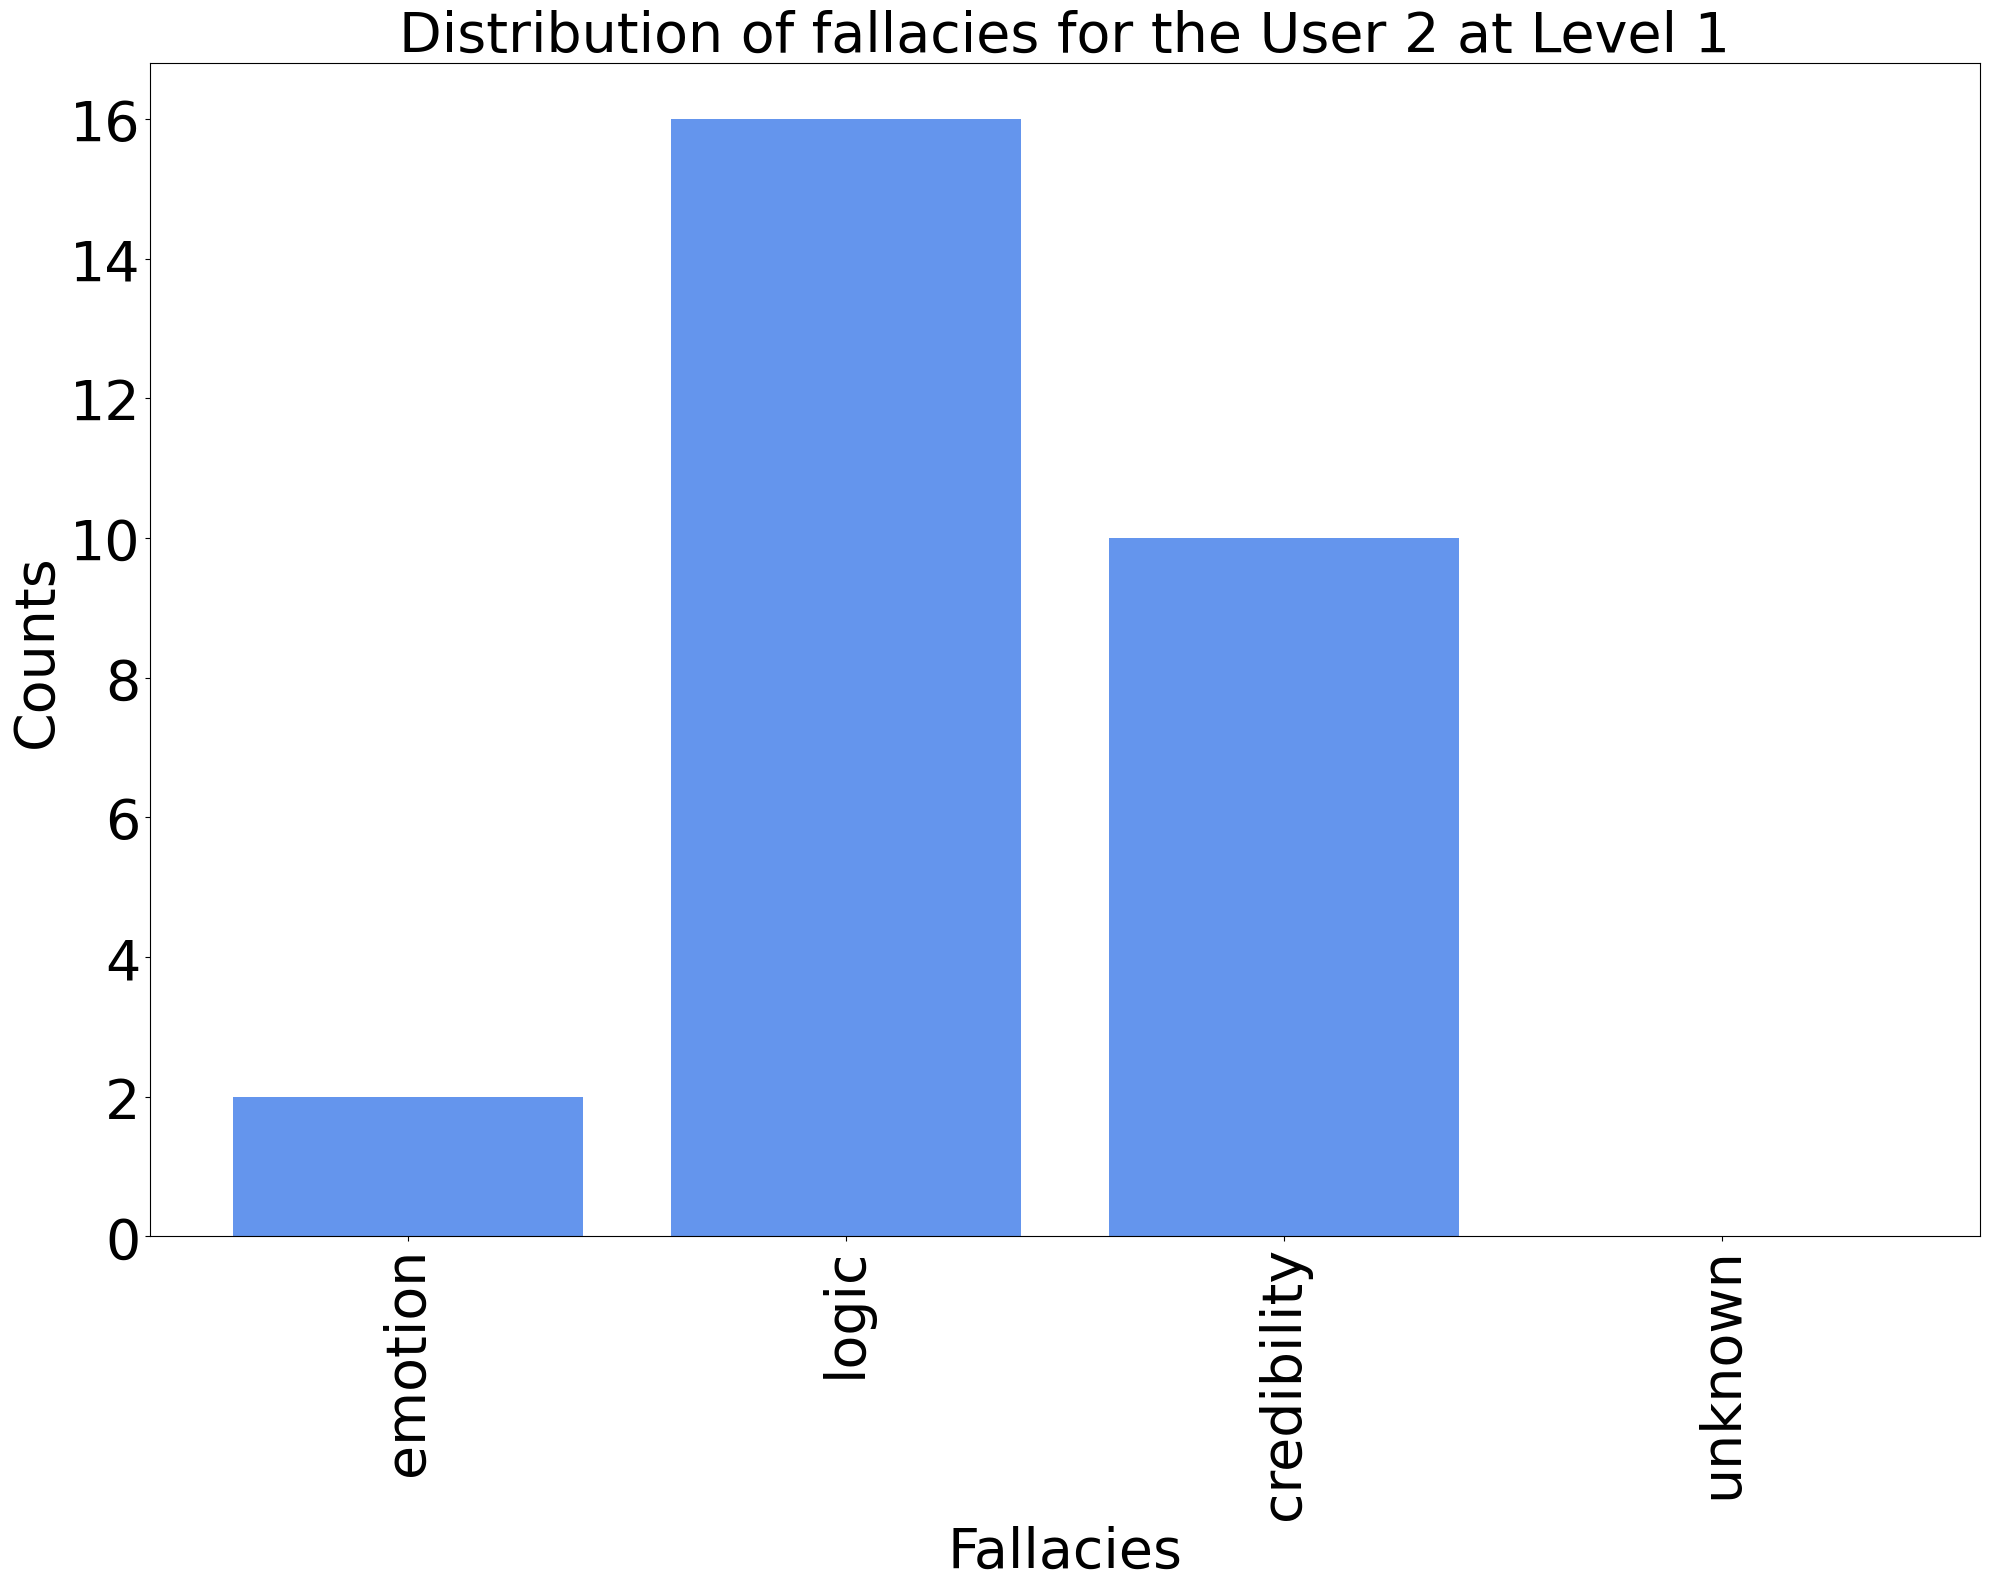

In [ ]:
plot_bar_labels_count(transform_level_2_to_level_1(best_pred_labels_count_user_2), "User 2", "Level 1") 

User 3 {'appeal to positive emotion': 0, 'appeal to anger': 0, 'appeal to fear': 0, 'appeal to pity': 0, 'appeal to ridicule': 1, 'appeal to worse problems': 0, 'causal oversimplification': 1, 'circular reasoning': 2, 'equivocation': 0, 'false analogy': 1, 'false causality': 2, 'false dilemma': 0, 'hasty generalization': 3, 'slippery slope': 0, 'straw man': 0, 'fallacy of division': 0, 'ad hominem': 3, 'ad populum': 0, 'appeal to (false) authority': 1, 'appeal to nature': 0, 'appeal to tradition': 1, 'guilt by association': 1, 'tu quoque': 2, 'unknown': 0}


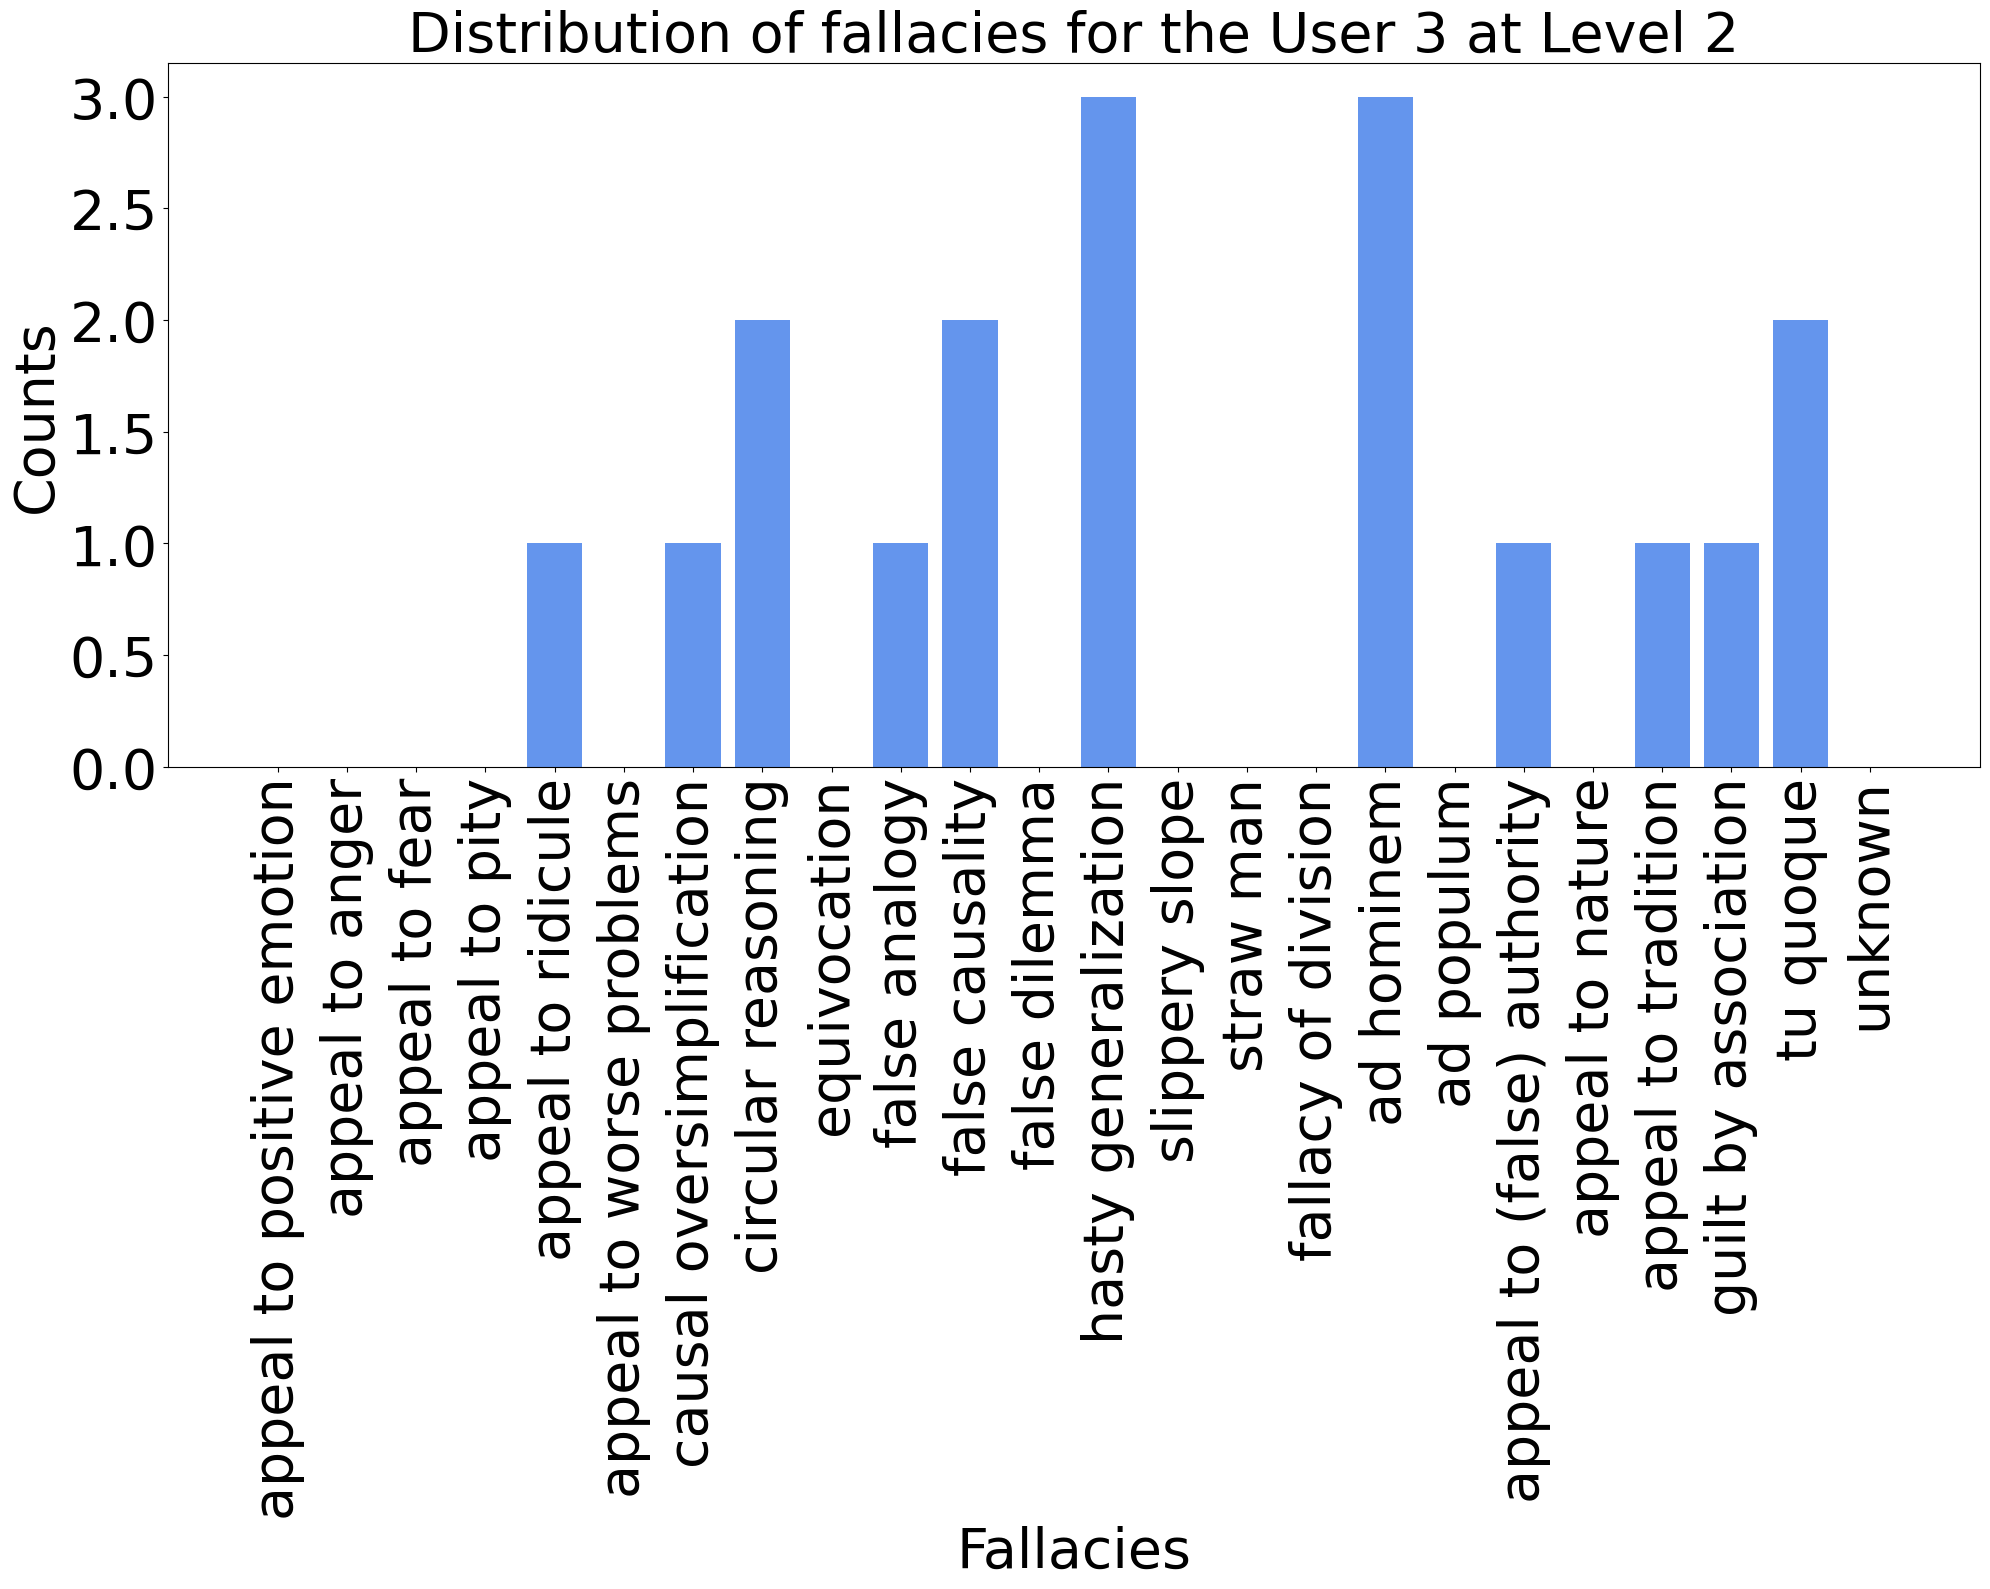

In [ ]:
plot_bar_labels_count(best_pred_labels_count_user_3, "User 3", "Level 2")

User 3 {'emotion': 1, 'logic': 9, 'credibility': 8, 'unknown': 0}


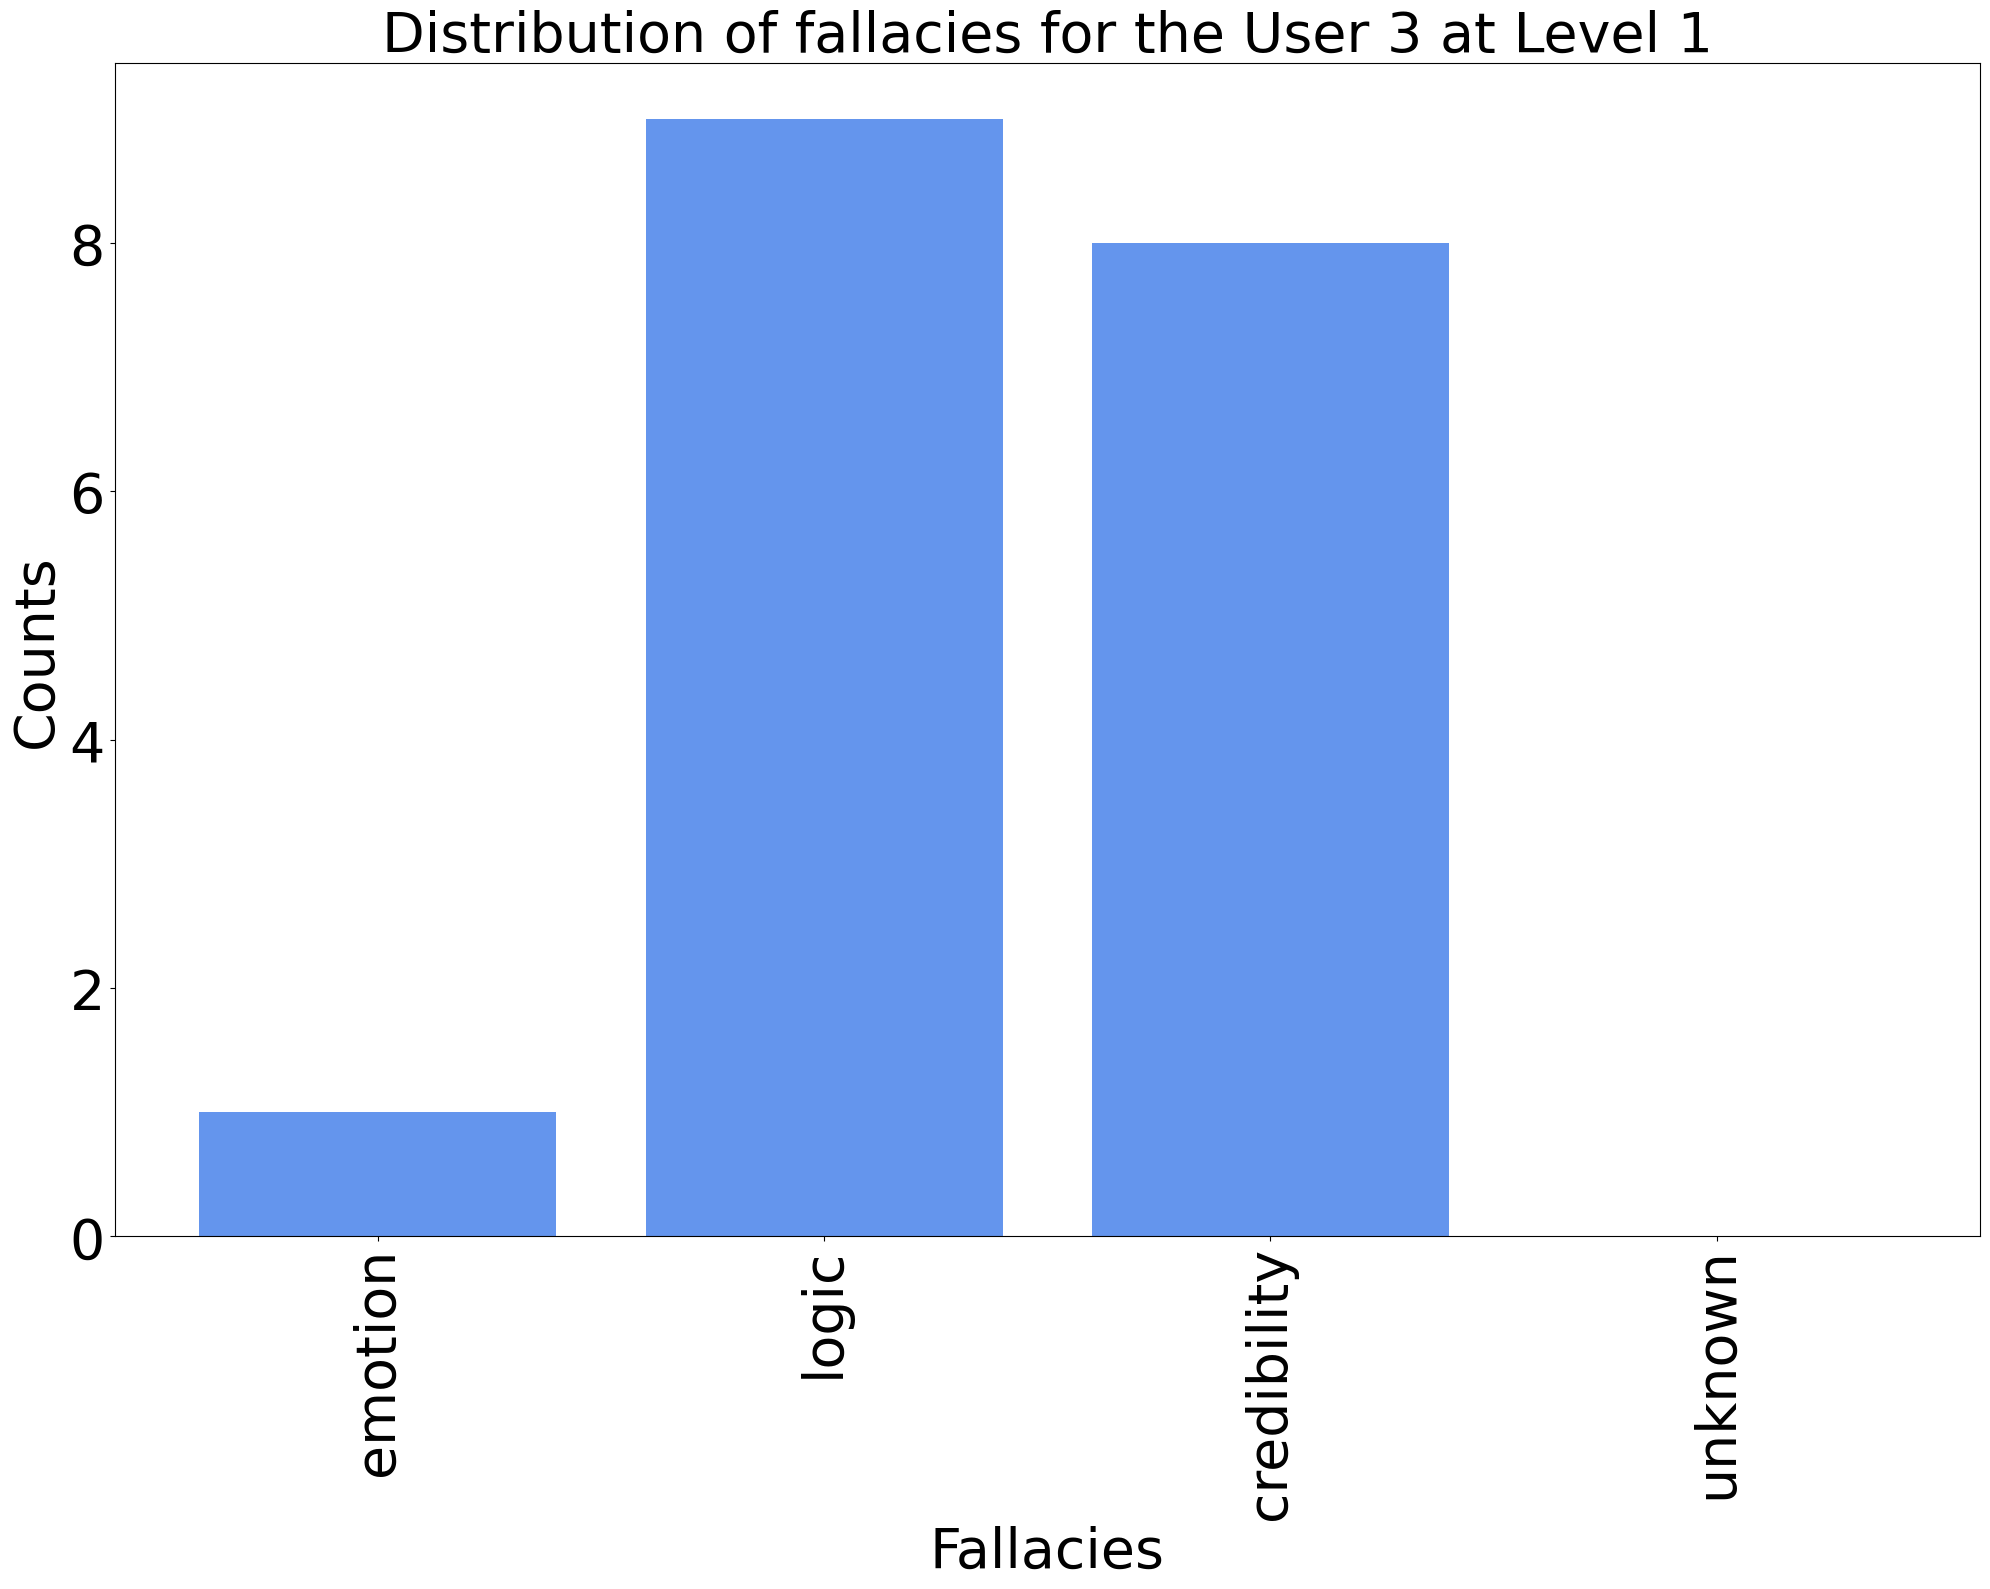

In [ ]:
plot_bar_labels_count(transform_level_2_to_level_1(best_pred_labels_count_user_3), "User 3", "Level 1")

User 4 {'appeal to positive emotion': 2, 'appeal to anger': 0, 'appeal to fear': 2, 'appeal to pity': 0, 'appeal to ridicule': 4, 'appeal to worse problems': 0, 'causal oversimplification': 4, 'circular reasoning': 0, 'equivocation': 5, 'false analogy': 0, 'false causality': 1, 'false dilemma': 1, 'hasty generalization': 5, 'slippery slope': 7, 'straw man': 0, 'fallacy of division': 0, 'ad hominem': 2, 'ad populum': 5, 'appeal to (false) authority': 3, 'appeal to nature': 0, 'appeal to tradition': 2, 'guilt by association': 1, 'tu quoque': 0, 'unknown': 0}


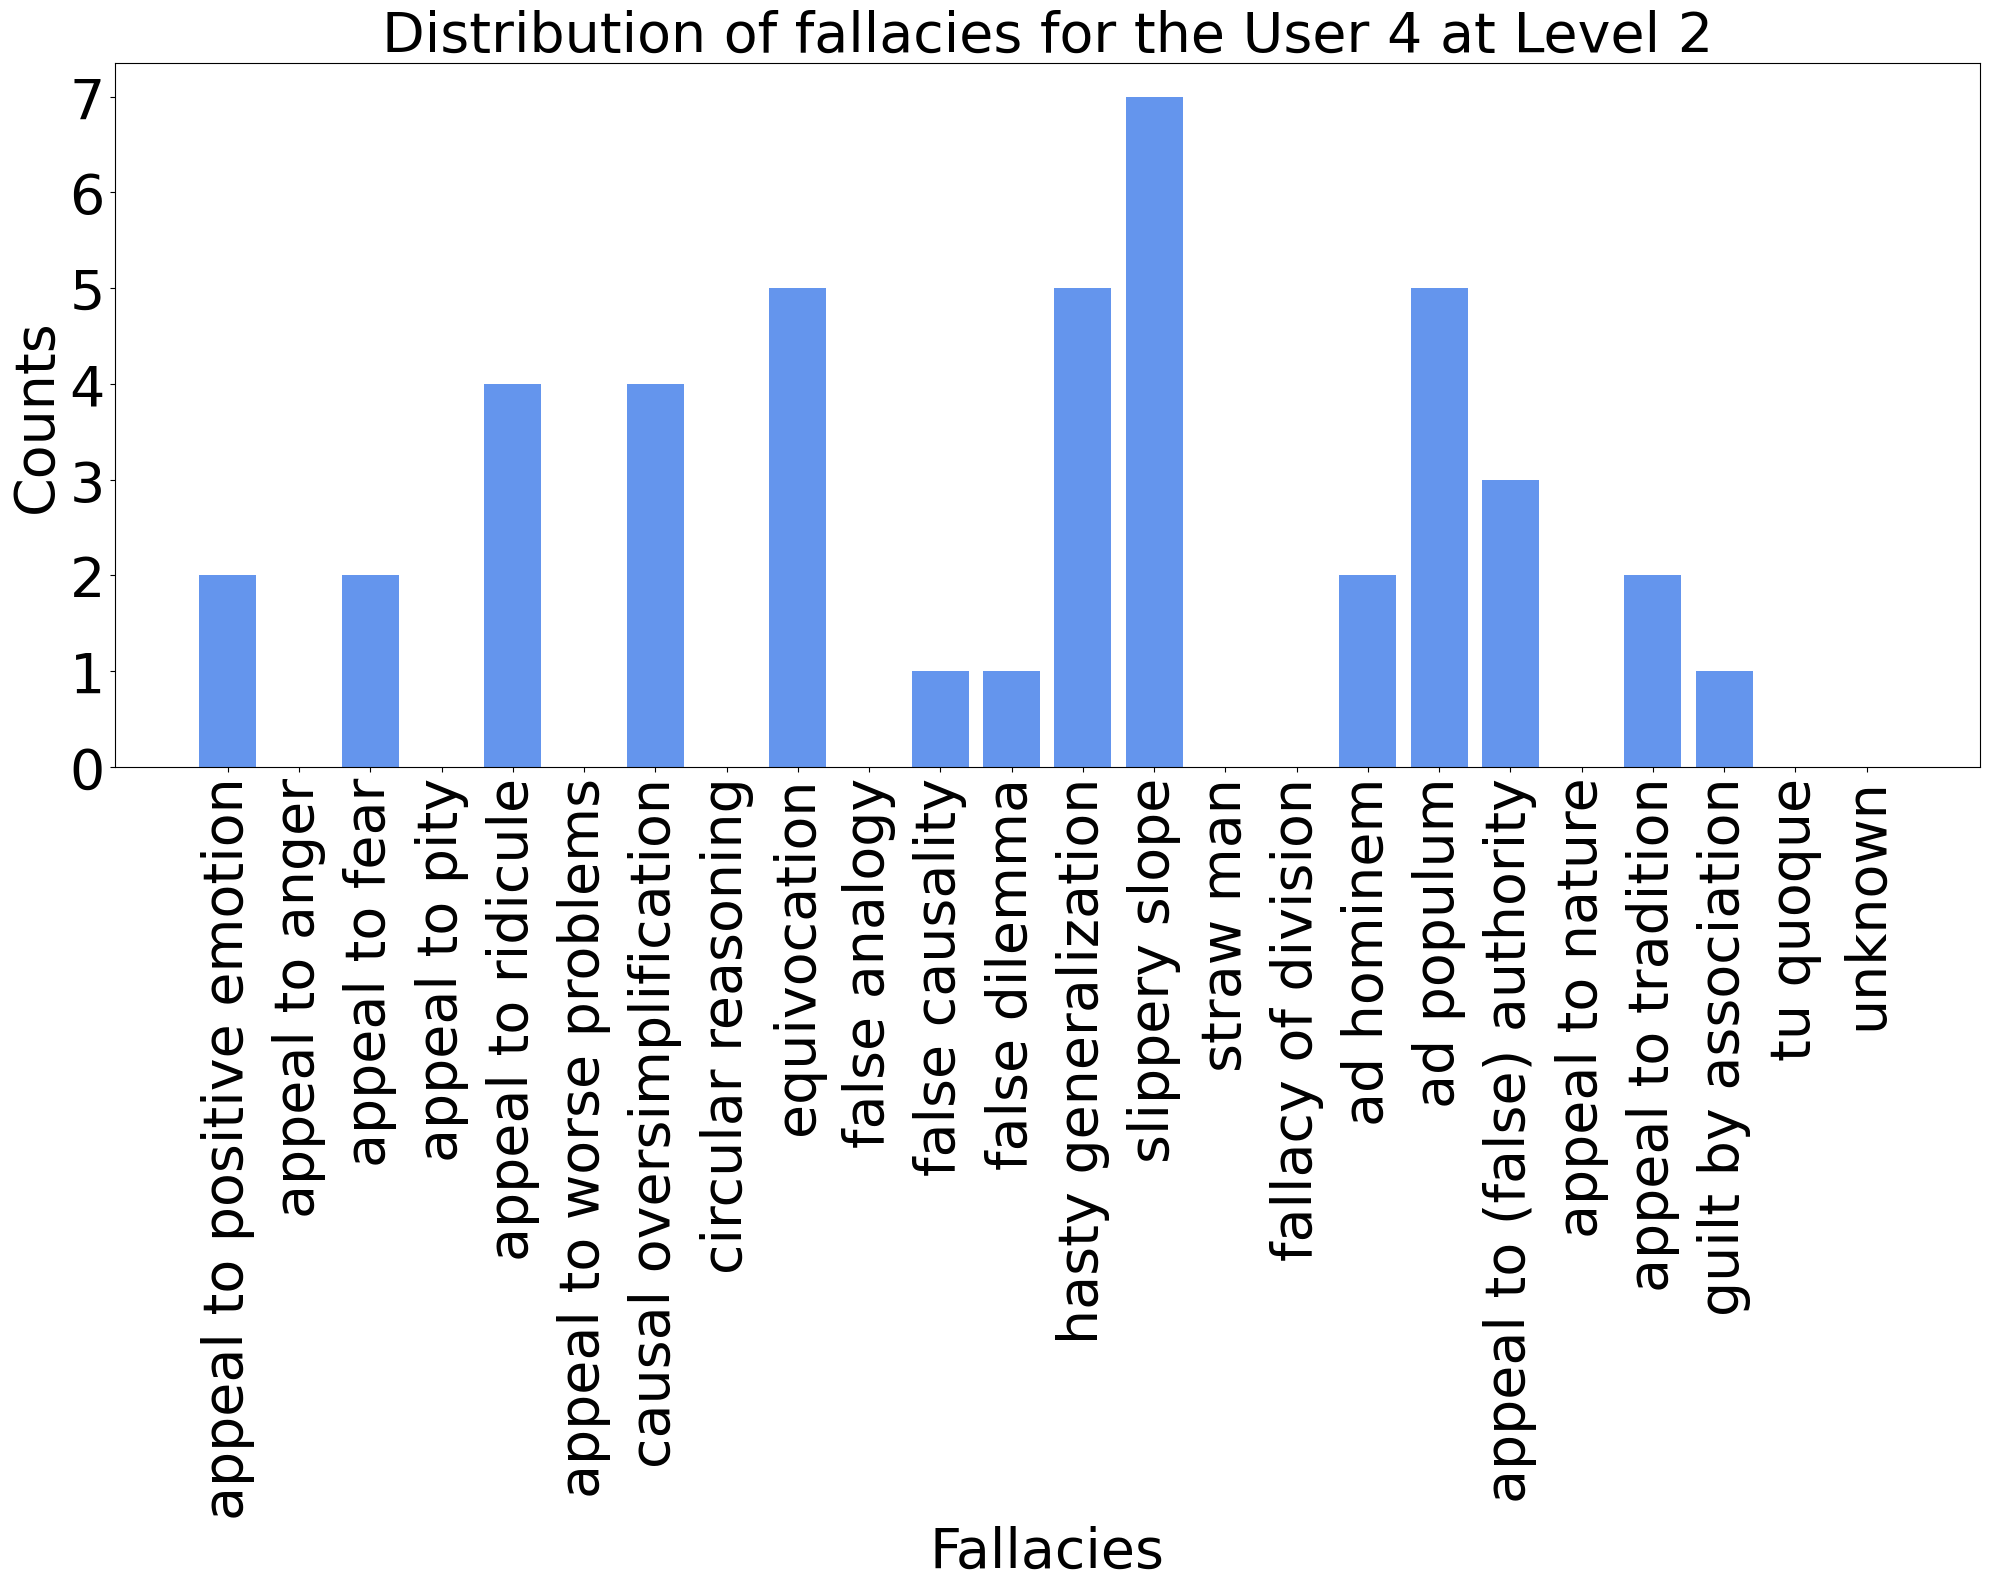

In [ ]:
plot_bar_labels_count(best_pred_labels_count_user_4, "User 4", "Level 2")

User 4 {'emotion': 8, 'logic': 23, 'credibility': 13, 'unknown': 0}


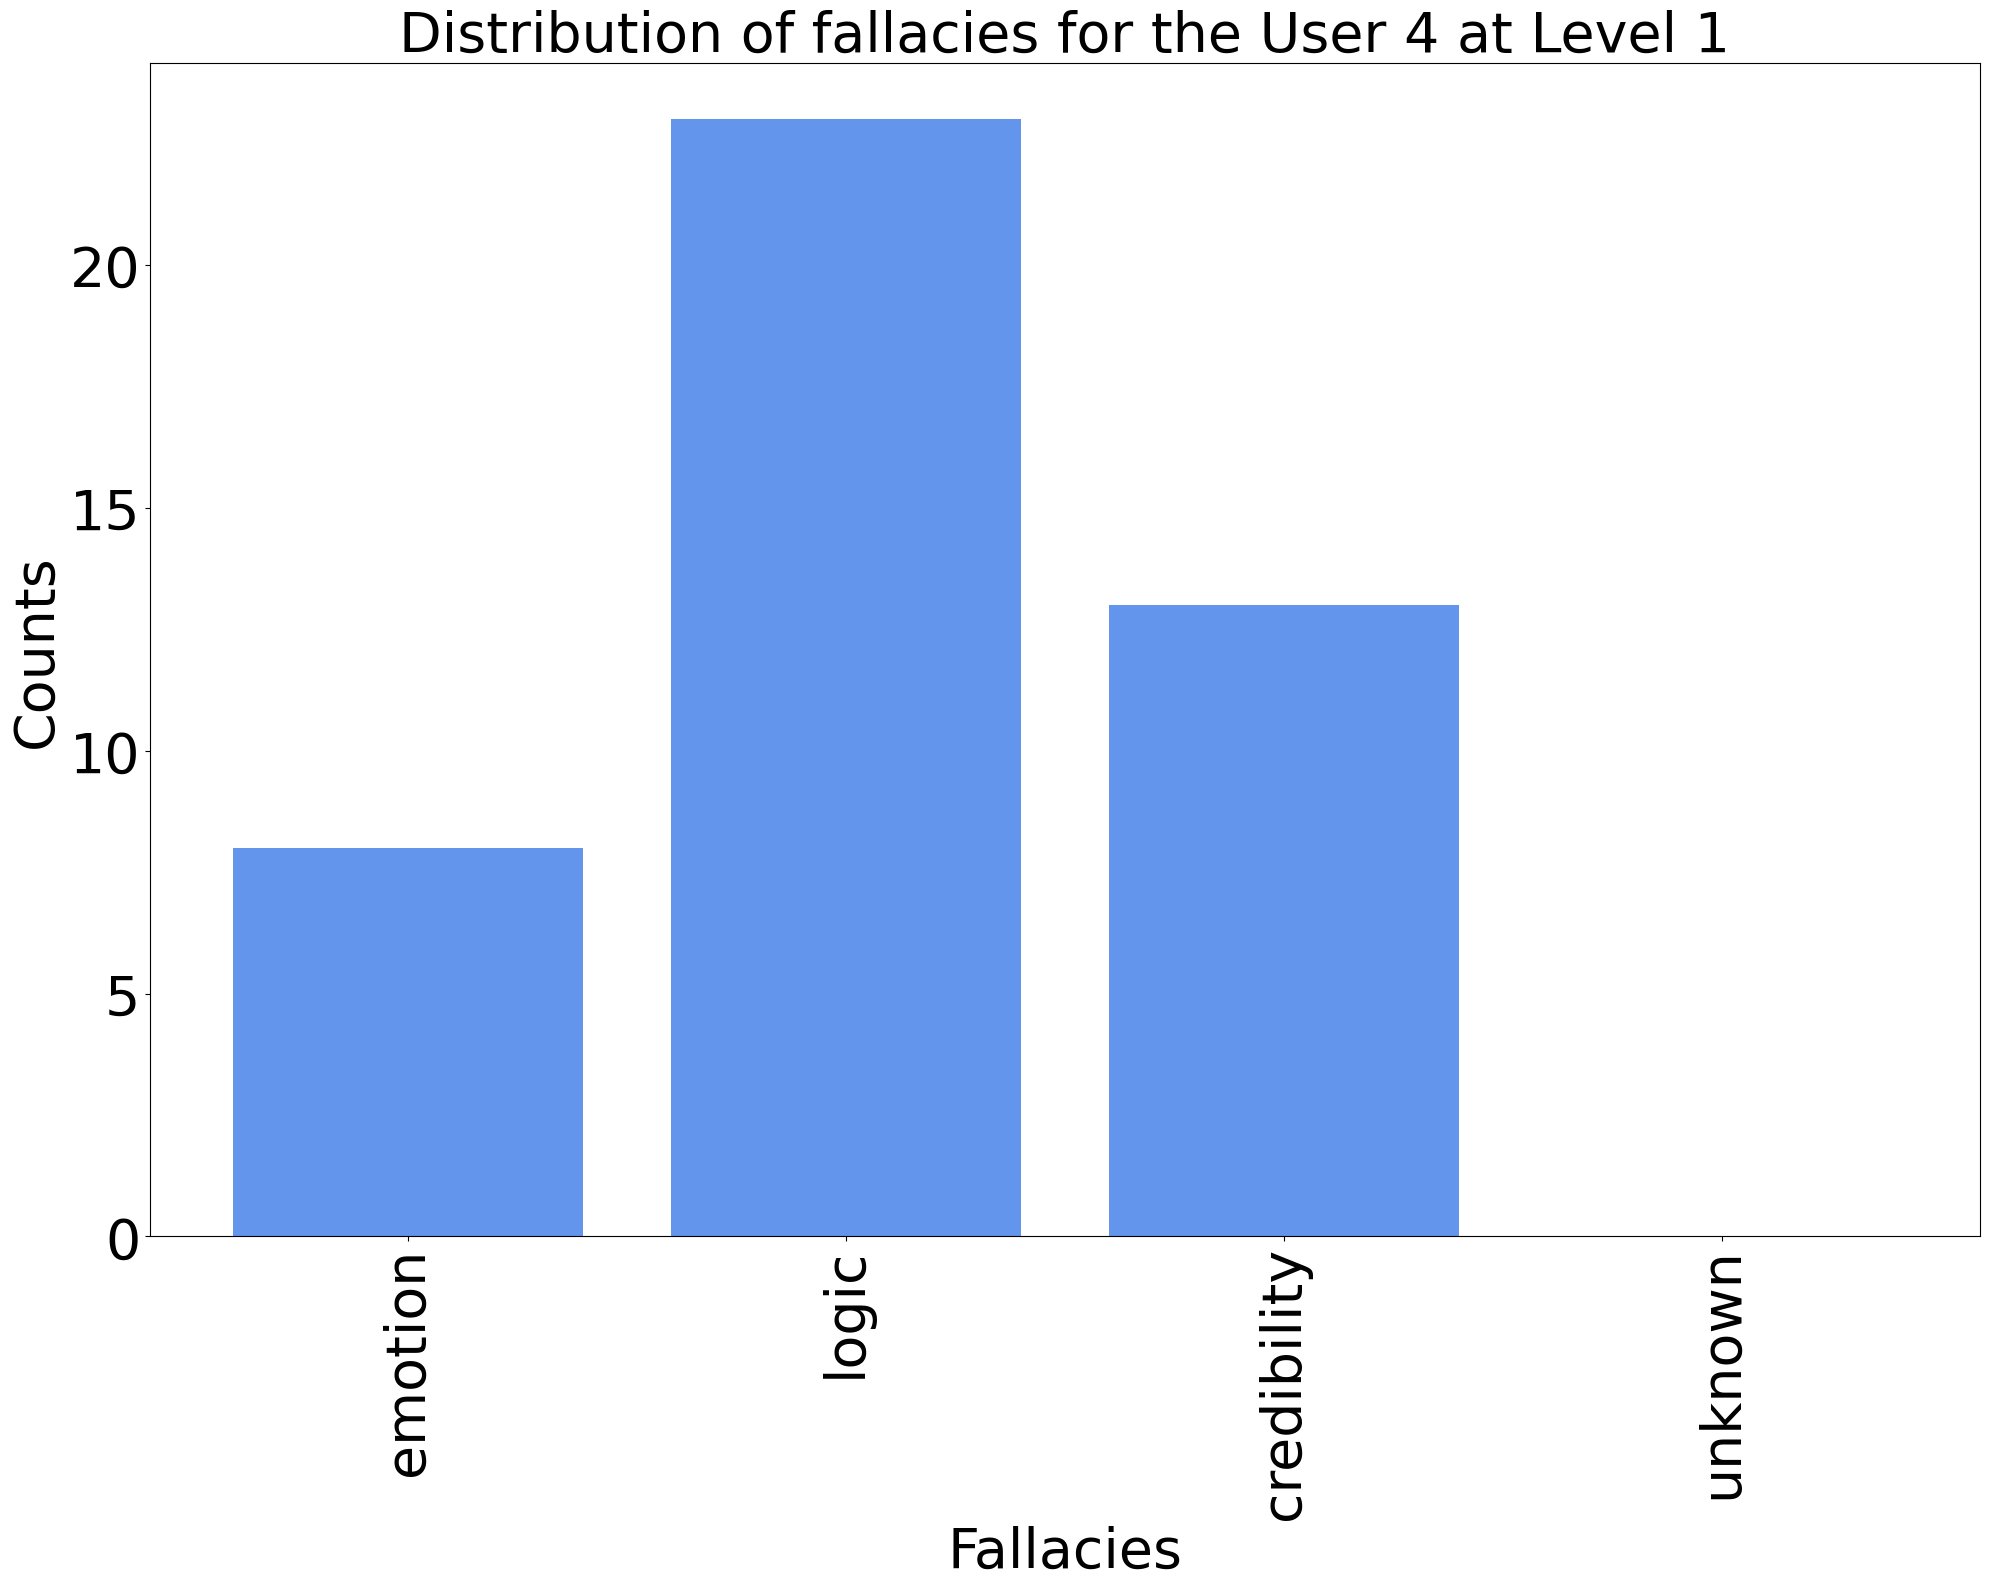

In [ ]:
plot_bar_labels_count(transform_level_2_to_level_1(best_pred_labels_count_user_4), "User 4", "Level 1")

In [ ]:
count_match_user_1, count_span_user_1, gd_labels_count_user_1, pred_labels_count_user_1 = count_match_fallacious_span(all_dict_gold_spans, all_dict_best_pred_span_user_1)
count_match_user_2, count_span_user_2, gd_labels_count_user_2, pred_labels_count_user_2 = count_match_fallacious_span(all_dict_gold_spans, all_dict_best_pred_span_user_2)
count_match_user_3, count_span_user_3, gd_labels_count_user_3, pred_labels_count_user_3 = count_match_fallacious_span(all_dict_gold_spans, all_dict_best_pred_span_user_3)
count_match_user_4, count_span_user_4, gd_labels_count_user_4, pred_labels_count_user_4 = count_match_fallacious_span(all_dict_gold_spans, all_dict_best_pred_span_user_4)

{'nothing': 0, 'appeal to positive emotion': 0, 'appeal to anger': 0, 'appeal to fear': 0, 'appeal to pity': 0, 'appeal to ridicule': 0, 'appeal to worse problems': 0, 'causal oversimplification': 0, 'circular reasoning': 0, 'equivocation': 0, 'false analogy': 0, 'false causality': 0, 'false dilemma': 0, 'hasty generalization': 0, 'slippery slope': 0, 'straw man': 0, 'fallacy of division': 0, 'ad hominem': 0, 'ad populum': 0, 'appeal to (false) authority': 0, 'appeal to nature': 0, 'appeal to tradition': 0, 'guilt by association': 0, 'tu quoque': 0, 'unknown': 0}
{'nothing': 0, 'appeal to positive emotion': 0, 'appeal to anger': 0, 'appeal to fear': 0, 'appeal to pity': 0, 'appeal to ridicule': 0, 'appeal to worse problems': 0, 'causal oversimplification': 0, 'circular reasoning': 0, 'equivocation': 0, 'false analogy': 0, 'false causality': 0, 'false dilemma': 0, 'hasty generalization': 0, 'slippery slope': 0, 'straw man': 0, 'fallacy of division': 0, 'ad hominem': 0, 'ad populum': 0, 

In [ ]:
print("Average user 1 exact mactch fallacious span", count_match_user_1 / count_span_user_1, count_match_user_1, count_span_user_1)
print("Average user 2 exact mactch fallacious span", count_match_user_2 / count_span_user_2, count_match_user_2, count_span_user_2)
print("Average user 3 exact mactch fallacious span", count_match_user_3 / count_span_user_3, count_match_user_3, count_span_user_3)
print("Average user 4 exact mactch fallacious span", count_match_user_4 / count_span_user_4, count_match_user_4, count_span_user_4)

Average user 1 exact mactch fallacious span 0.5833333333333334 14 24
Average user 2 exact mactch fallacious span 0.7916666666666666 19 24
Average user 3 exact mactch fallacious span 0.4166666666666667 10 24
Average user 4 exact mactch fallacious span 0.3333333333333333 8 24


{'appeal to positive emotion': 0, 'appeal to anger': 0, 'appeal to fear': 0, 'appeal to pity': 0, 'appeal to ridicule': 1, 'appeal to worse problems': 0, 'causal oversimplification': 1, 'circular reasoning': 1, 'equivocation': 0, 'false analogy': 0, 'false causality': 1, 'false dilemma': 0, 'hasty generalization': 1, 'slippery slope': 0, 'straw man': 0, 'fallacy of division': 0, 'ad hominem': 0, 'ad populum': 1, 'appeal to (false) authority': 0, 'appeal to nature': 0, 'appeal to tradition': 0, 'guilt by association': 0, 'tu quoque': 0}
{'appeal to positive emotion': 0, 'appeal to anger': 0, 'appeal to fear': 0, 'appeal to pity': 0, 'appeal to ridicule': 2, 'appeal to worse problems': 1, 'causal oversimplification': 1, 'circular reasoning': 1, 'equivocation': 0, 'false analogy': 0, 'false causality': 2, 'false dilemma': 2, 'hasty generalization': 2, 'slippery slope': 1, 'straw man': 1, 'fallacy of division': 0, 'ad hominem': 3, 'ad populum': 1, 'appeal to (false) authority': 0, 'appeal 

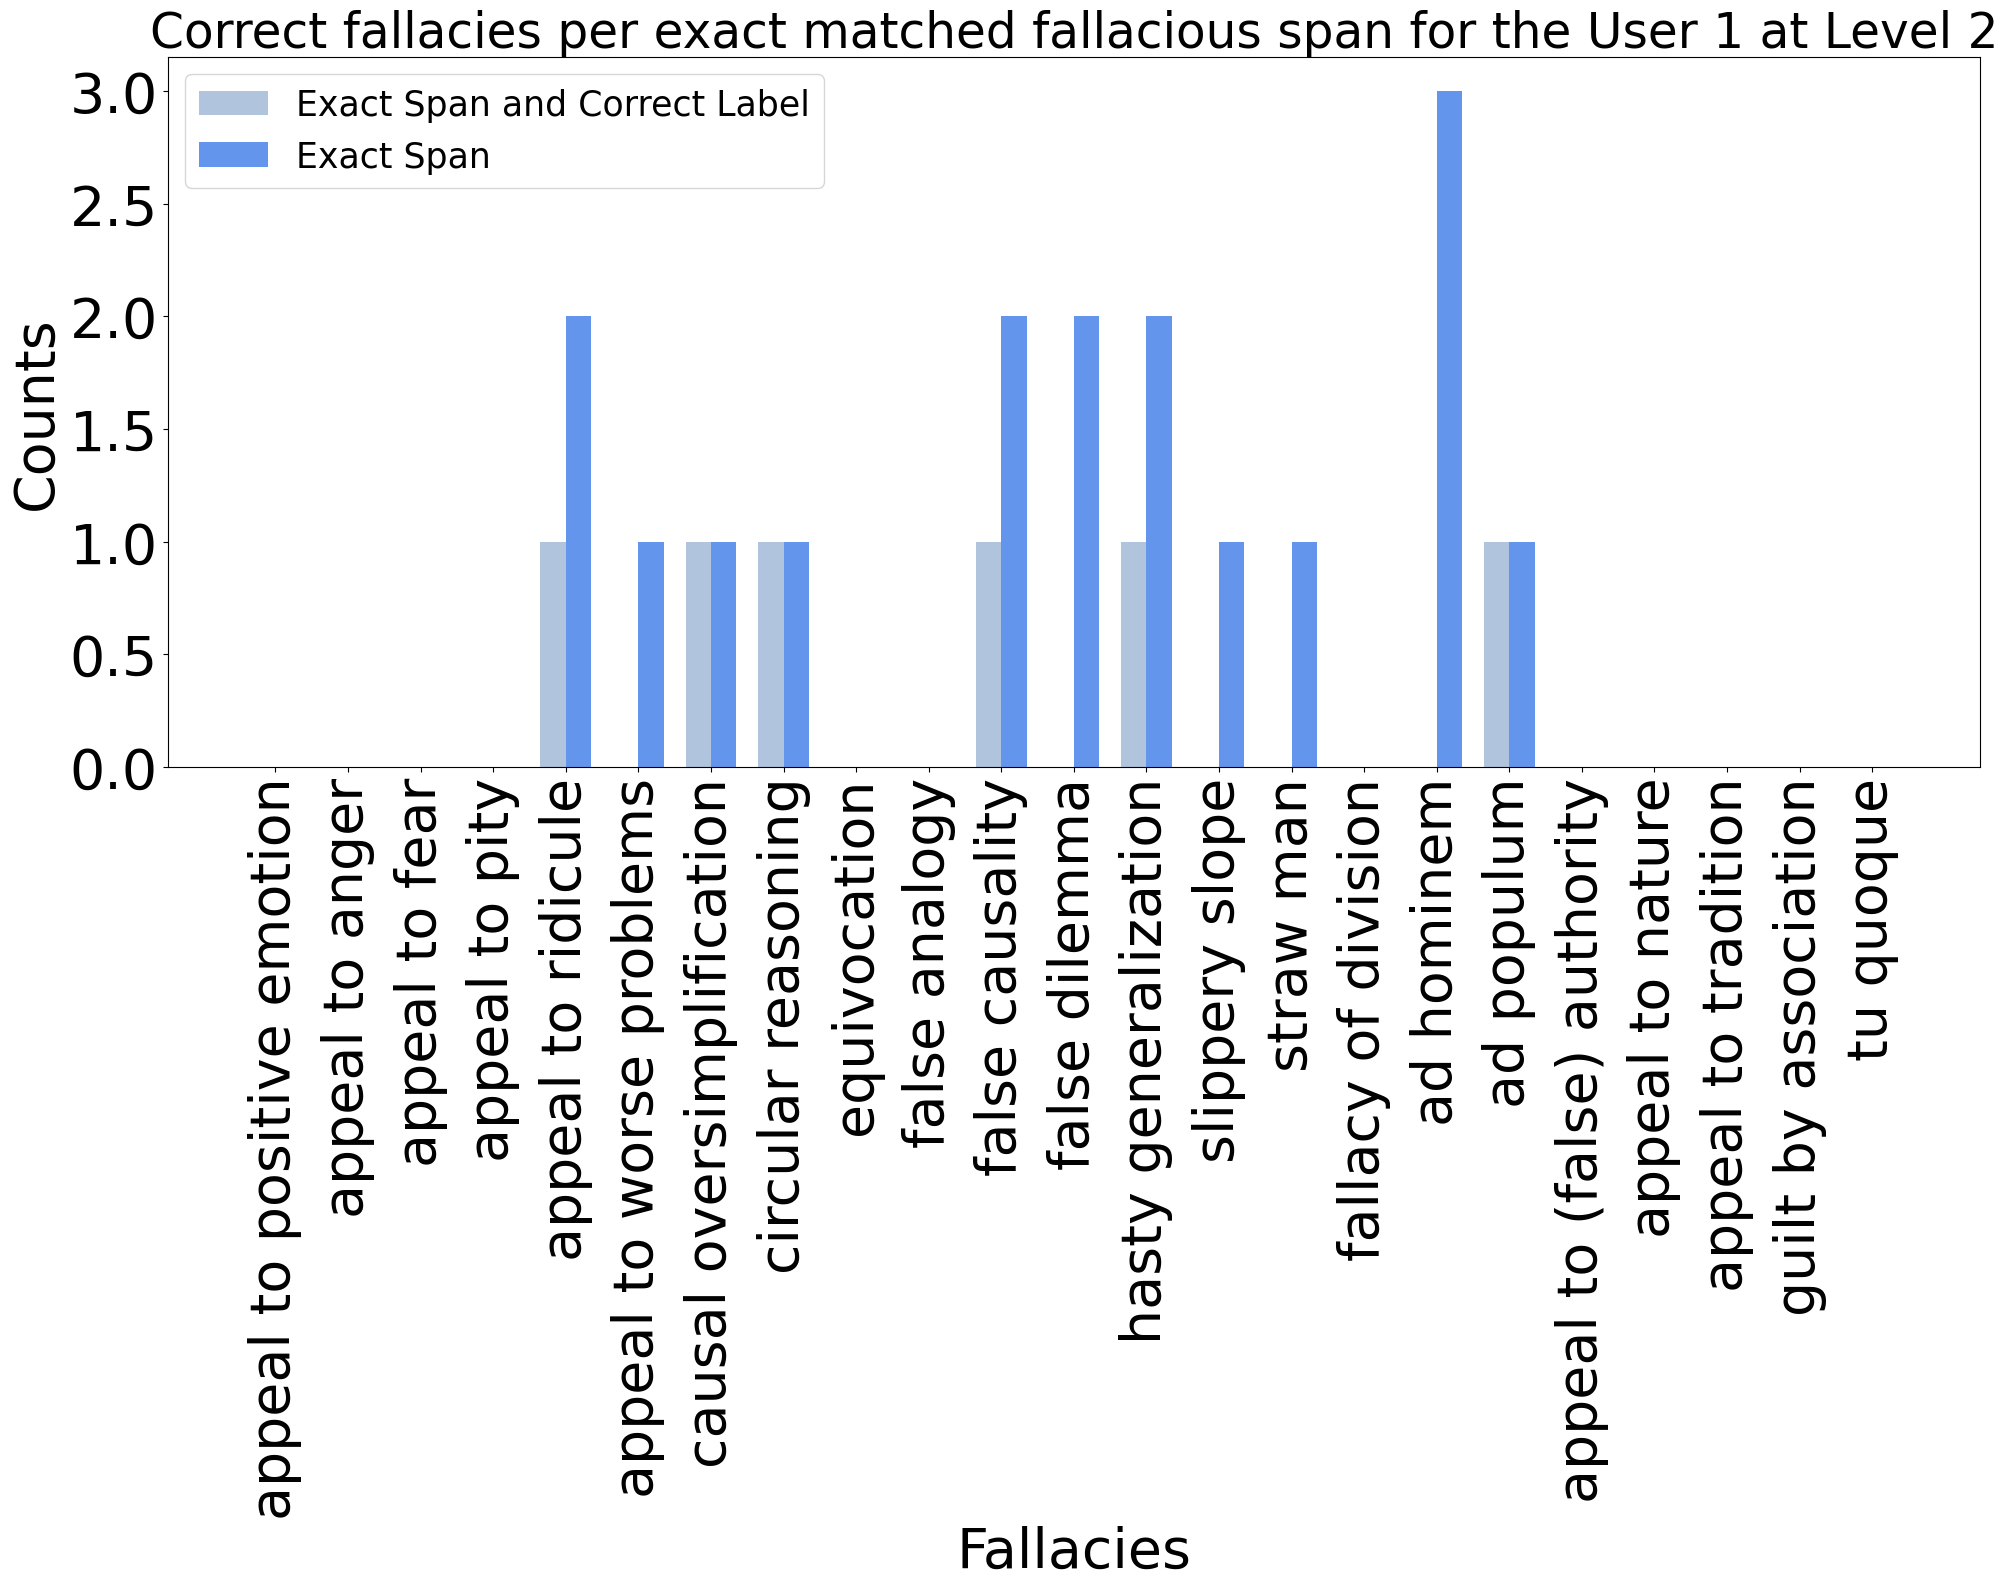

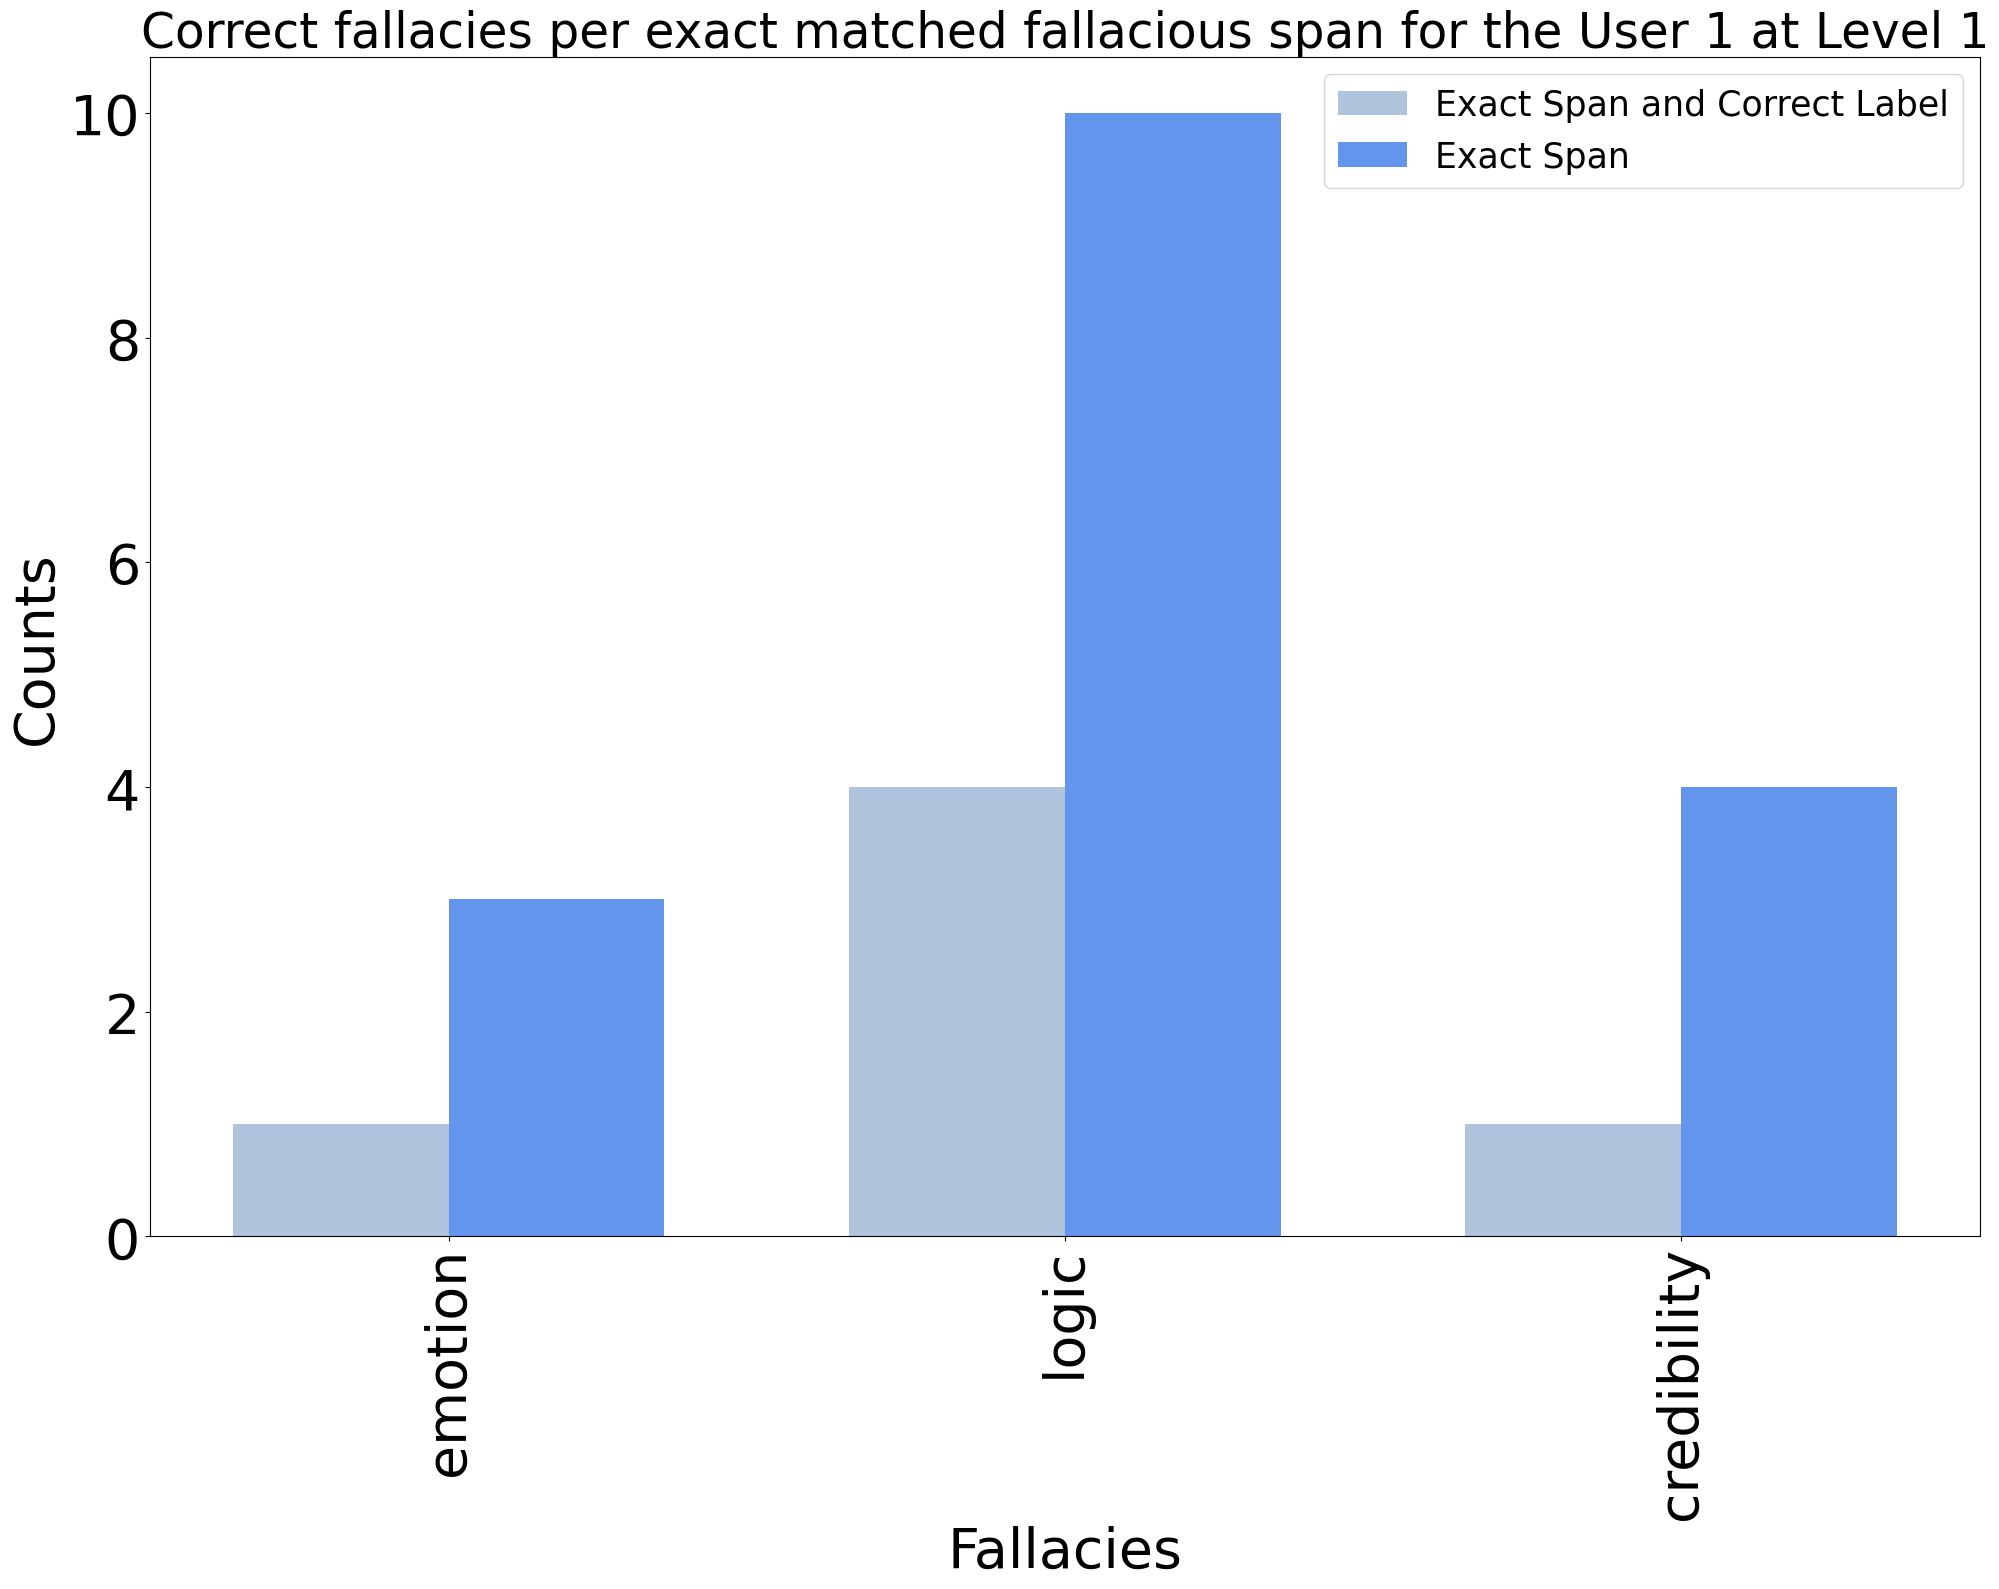

In [ ]:
plot_bar_labels_exact_match(gd_labels_count_user_1, pred_labels_count_user_1, "User 1")
plot_bar_labels_exact_match(transform_level_2_to_level_1(gd_labels_count_user_1), transform_level_2_to_level_1(pred_labels_count_user_1), "User 1", "Level 1")

{'appeal to positive emotion': 0, 'appeal to anger': 0, 'appeal to fear': 0, 'appeal to pity': 0, 'appeal to ridicule': 1, 'appeal to worse problems': 0, 'causal oversimplification': 1, 'circular reasoning': 0, 'equivocation': 0, 'false analogy': 0, 'false causality': 0, 'false dilemma': 0, 'hasty generalization': 0, 'slippery slope': 0, 'straw man': 1, 'fallacy of division': 0, 'ad hominem': 1, 'ad populum': 1, 'appeal to (false) authority': 0, 'appeal to nature': 0, 'appeal to tradition': 1, 'guilt by association': 1, 'tu quoque': 0}
{'appeal to positive emotion': 0, 'appeal to anger': 0, 'appeal to fear': 0, 'appeal to pity': 0, 'appeal to ridicule': 4, 'appeal to worse problems': 1, 'causal oversimplification': 2, 'circular reasoning': 1, 'equivocation': 1, 'false analogy': 0, 'false causality': 2, 'false dilemma': 2, 'hasty generalization': 2, 'slippery slope': 0, 'straw man': 3, 'fallacy of division': 0, 'ad hominem': 4, 'ad populum': 1, 'appeal to (false) authority': 0, 'appeal 

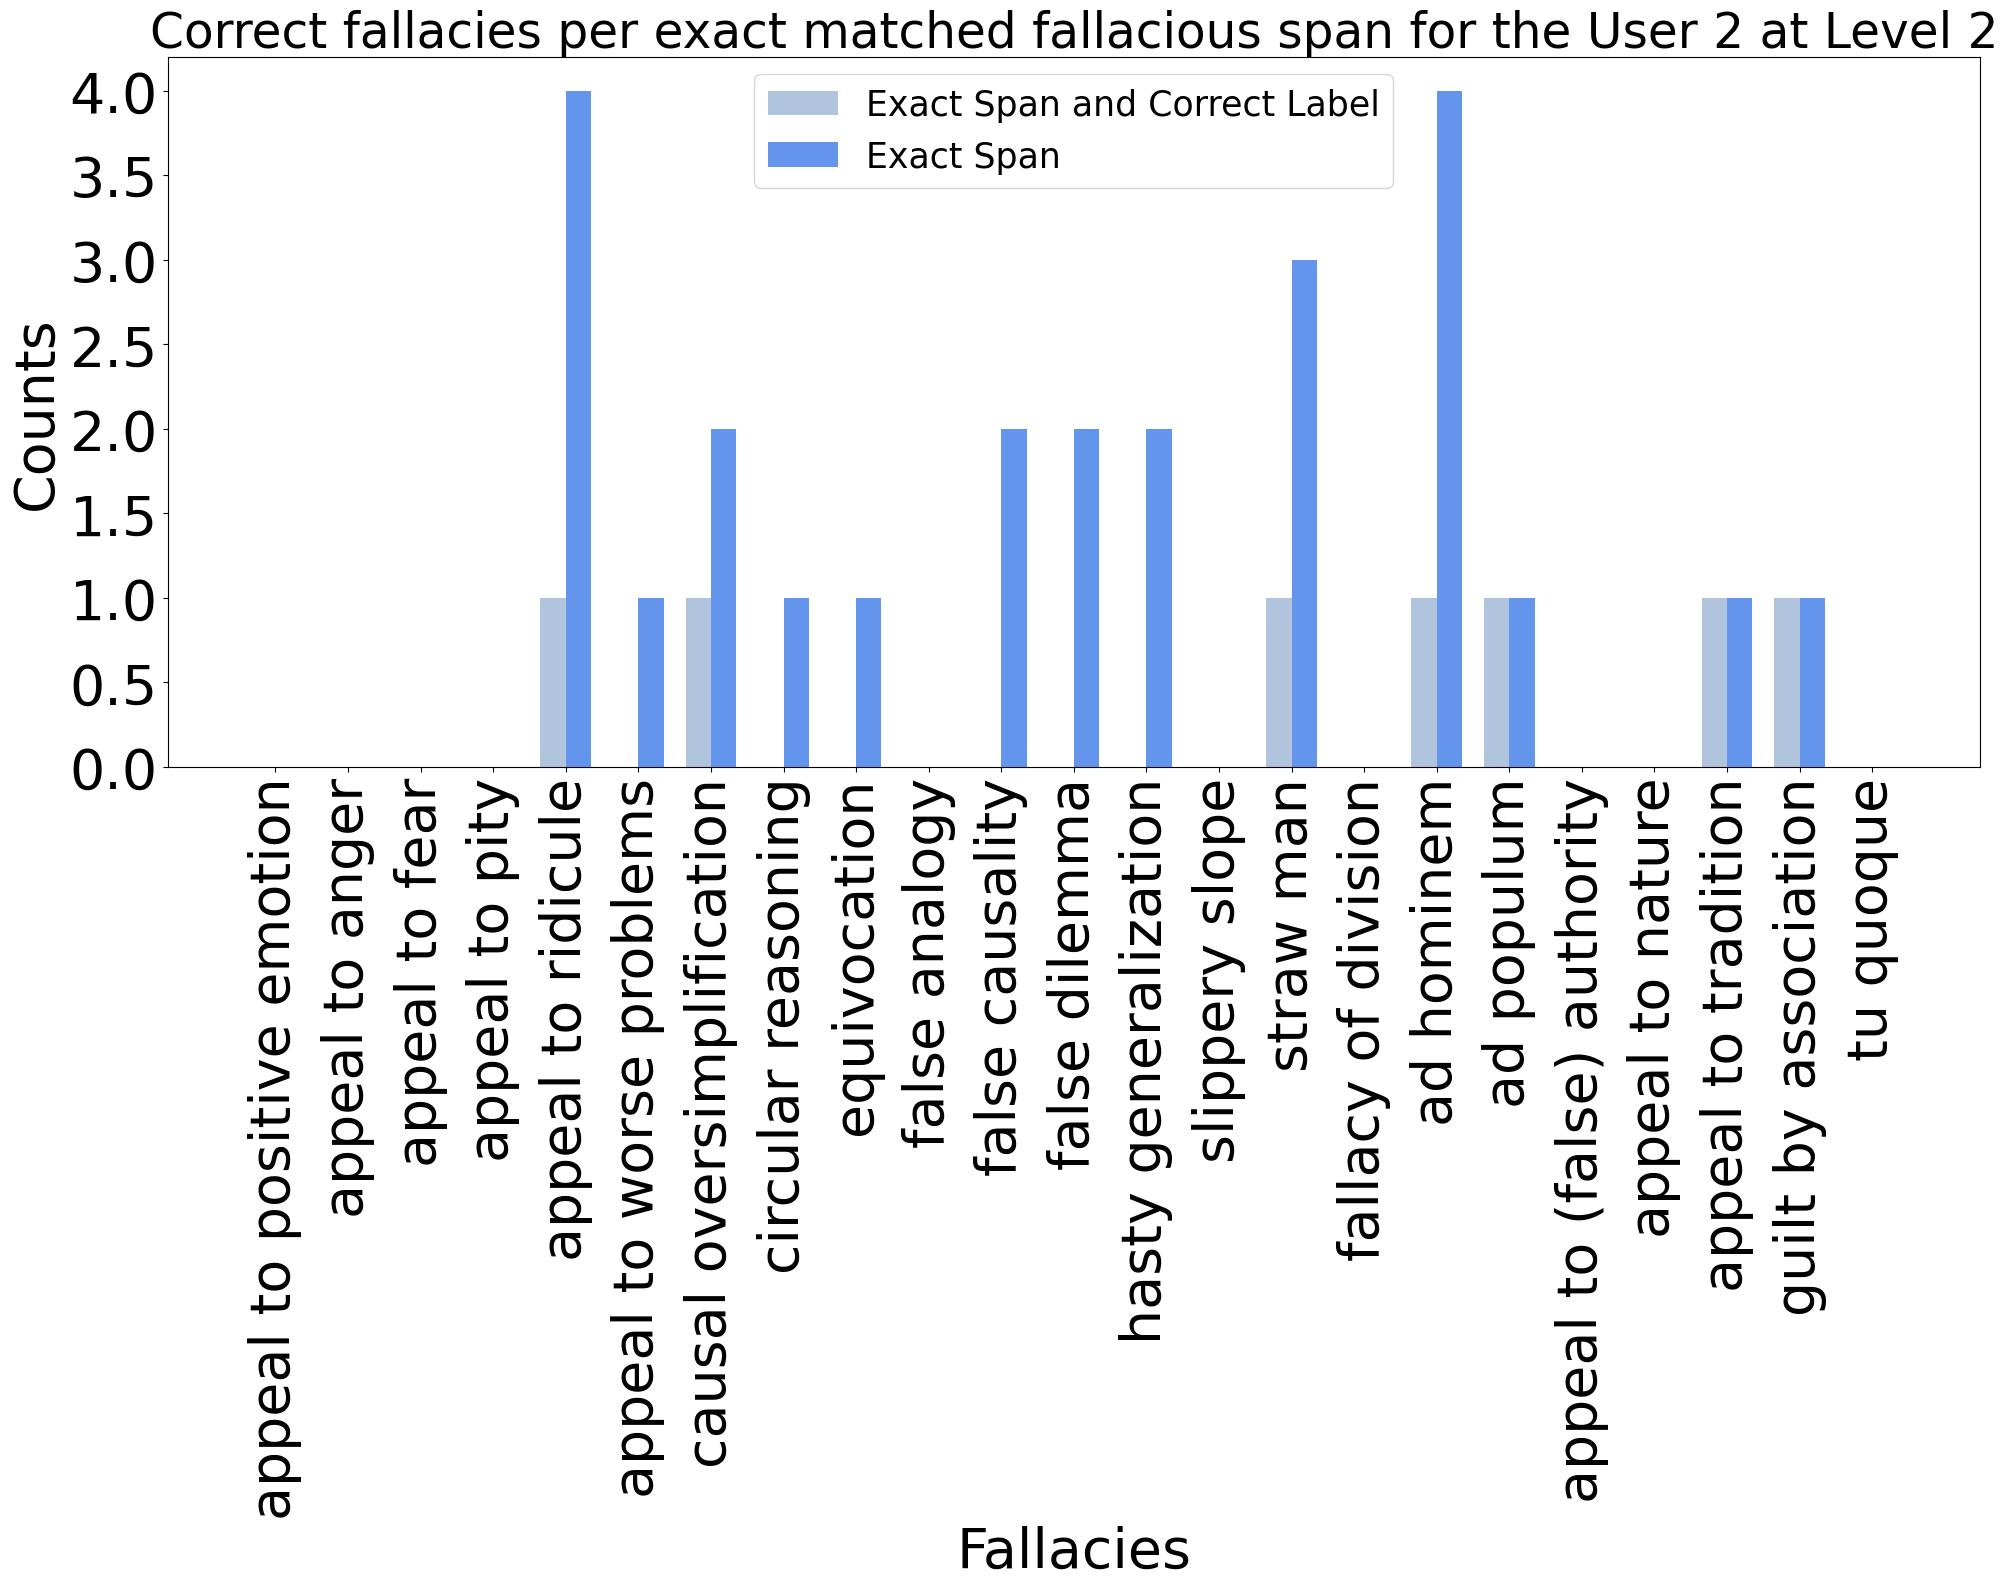

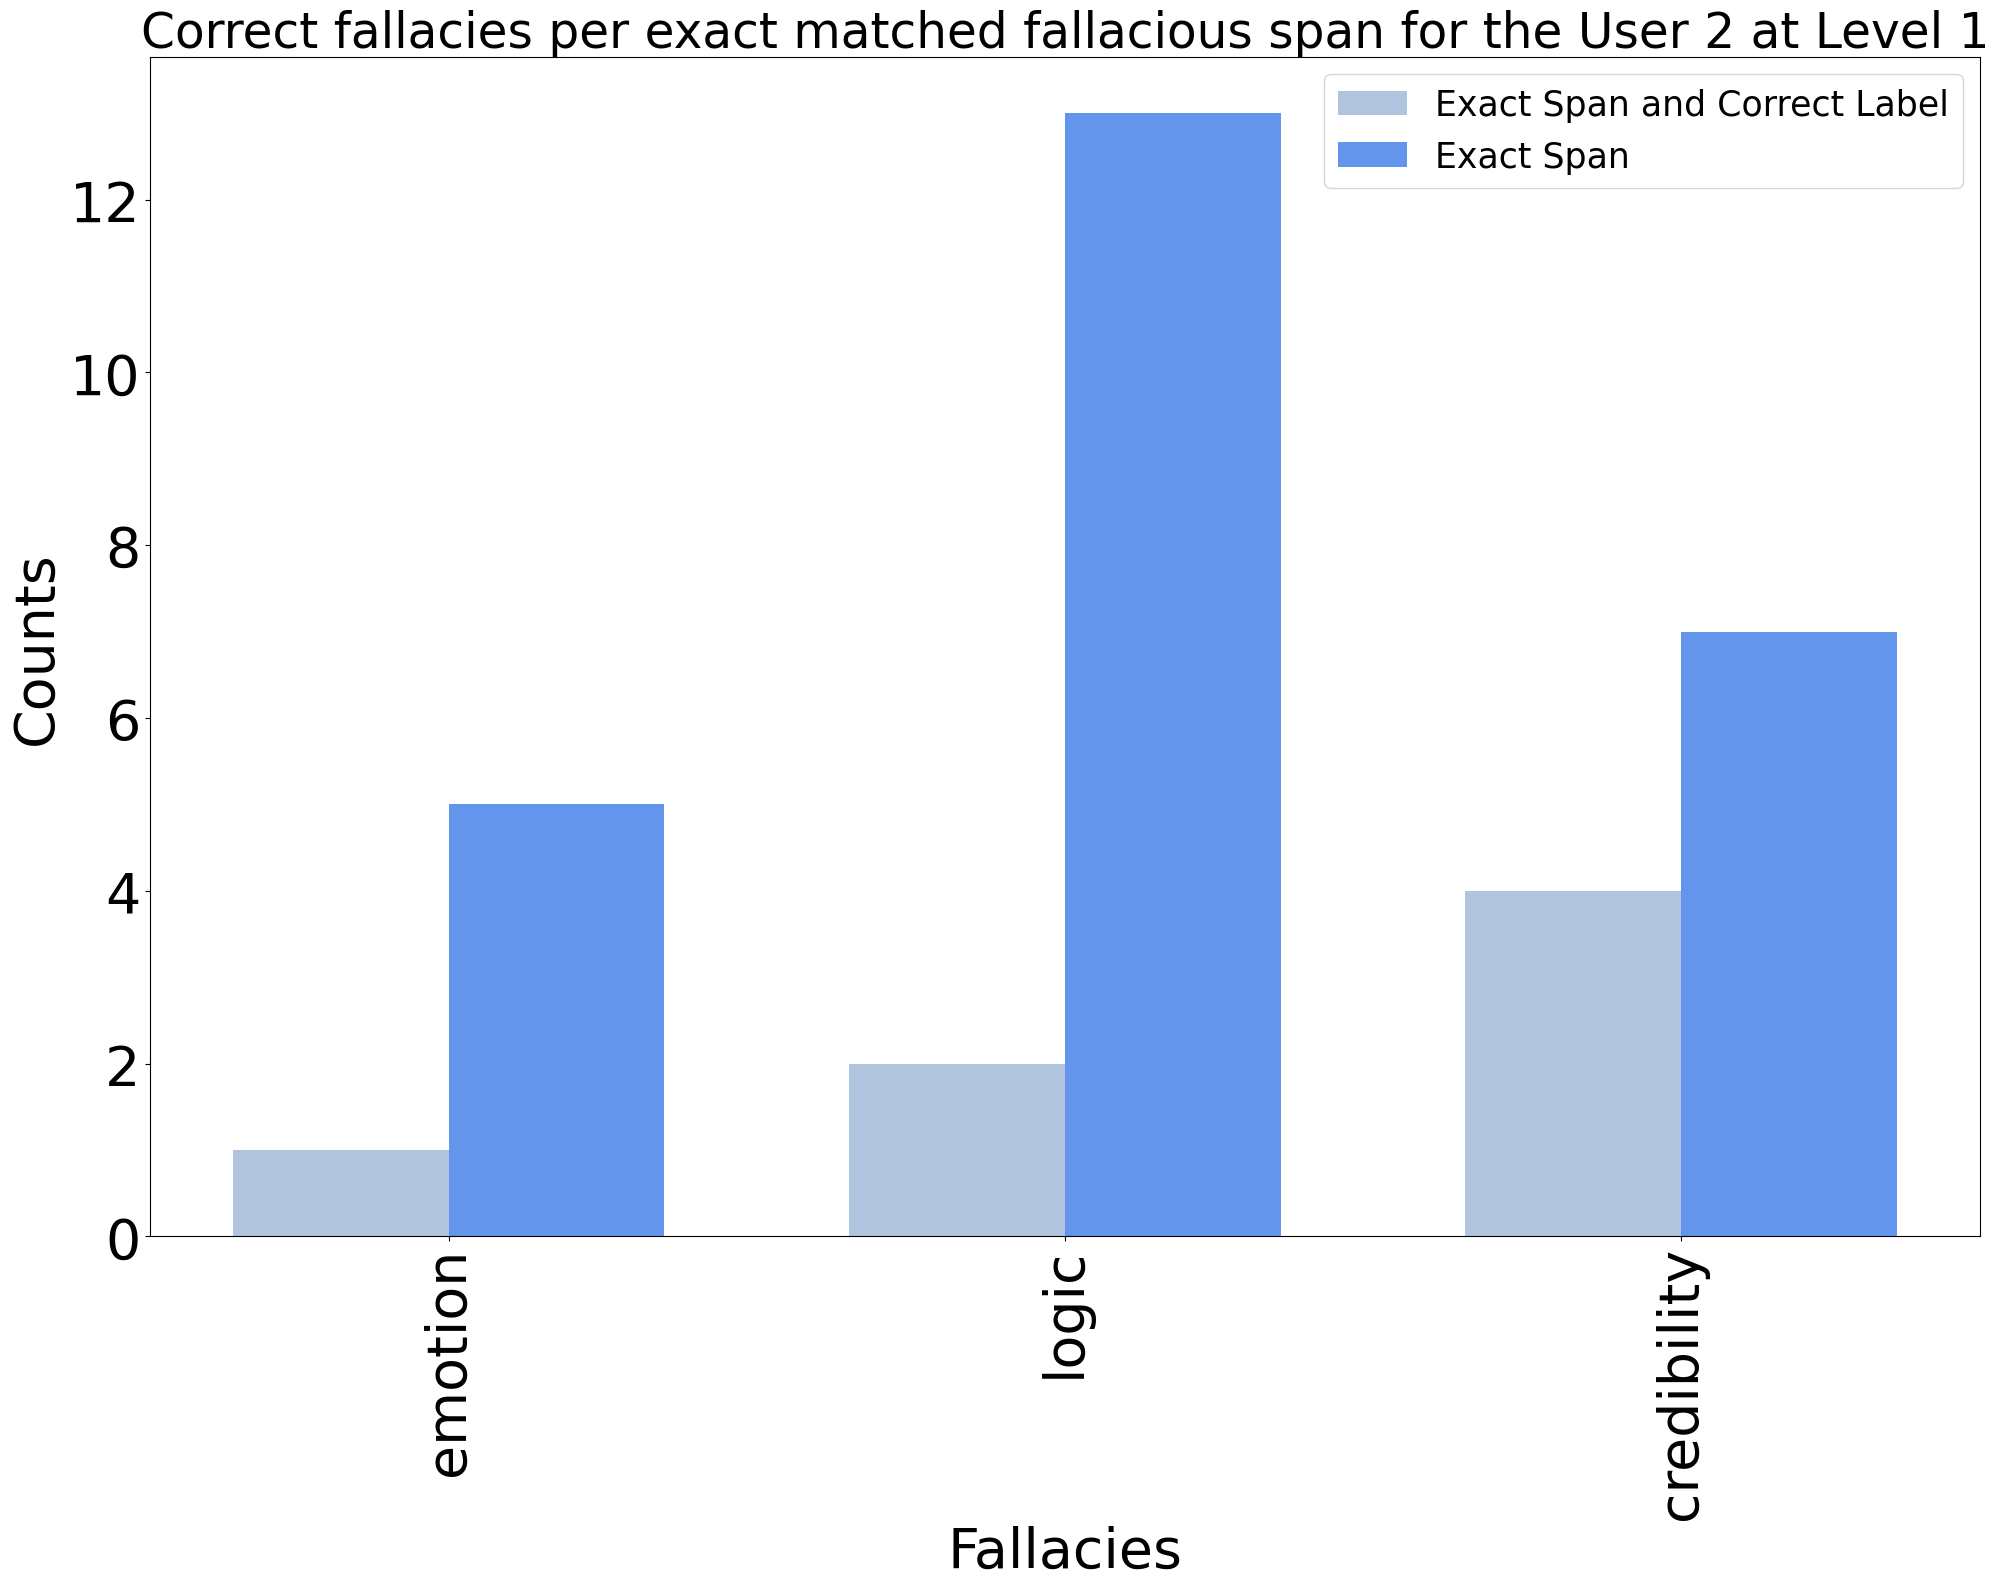

In [ ]:
plot_bar_labels_exact_match(gd_labels_count_user_2, pred_labels_count_user_2, "User 2")
plot_bar_labels_exact_match(transform_level_2_to_level_1(gd_labels_count_user_2), transform_level_2_to_level_1(pred_labels_count_user_2), "User 2", "Level 1")

{'appeal to positive emotion': 0, 'appeal to anger': 0, 'appeal to fear': 0, 'appeal to pity': 0, 'appeal to ridicule': 0, 'appeal to worse problems': 0, 'causal oversimplification': 1, 'circular reasoning': 1, 'equivocation': 0, 'false analogy': 0, 'false causality': 0, 'false dilemma': 0, 'hasty generalization': 1, 'slippery slope': 0, 'straw man': 0, 'fallacy of division': 0, 'ad hominem': 0, 'ad populum': 0, 'appeal to (false) authority': 0, 'appeal to nature': 0, 'appeal to tradition': 1, 'guilt by association': 0, 'tu quoque': 0}
{'appeal to positive emotion': 0, 'appeal to anger': 0, 'appeal to fear': 0, 'appeal to pity': 0, 'appeal to ridicule': 1, 'appeal to worse problems': 1, 'causal oversimplification': 1, 'circular reasoning': 1, 'equivocation': 0, 'false analogy': 0, 'false causality': 2, 'false dilemma': 1, 'hasty generalization': 2, 'slippery slope': 0, 'straw man': 1, 'fallacy of division': 0, 'ad hominem': 0, 'ad populum': 1, 'appeal to (false) authority': 0, 'appeal 

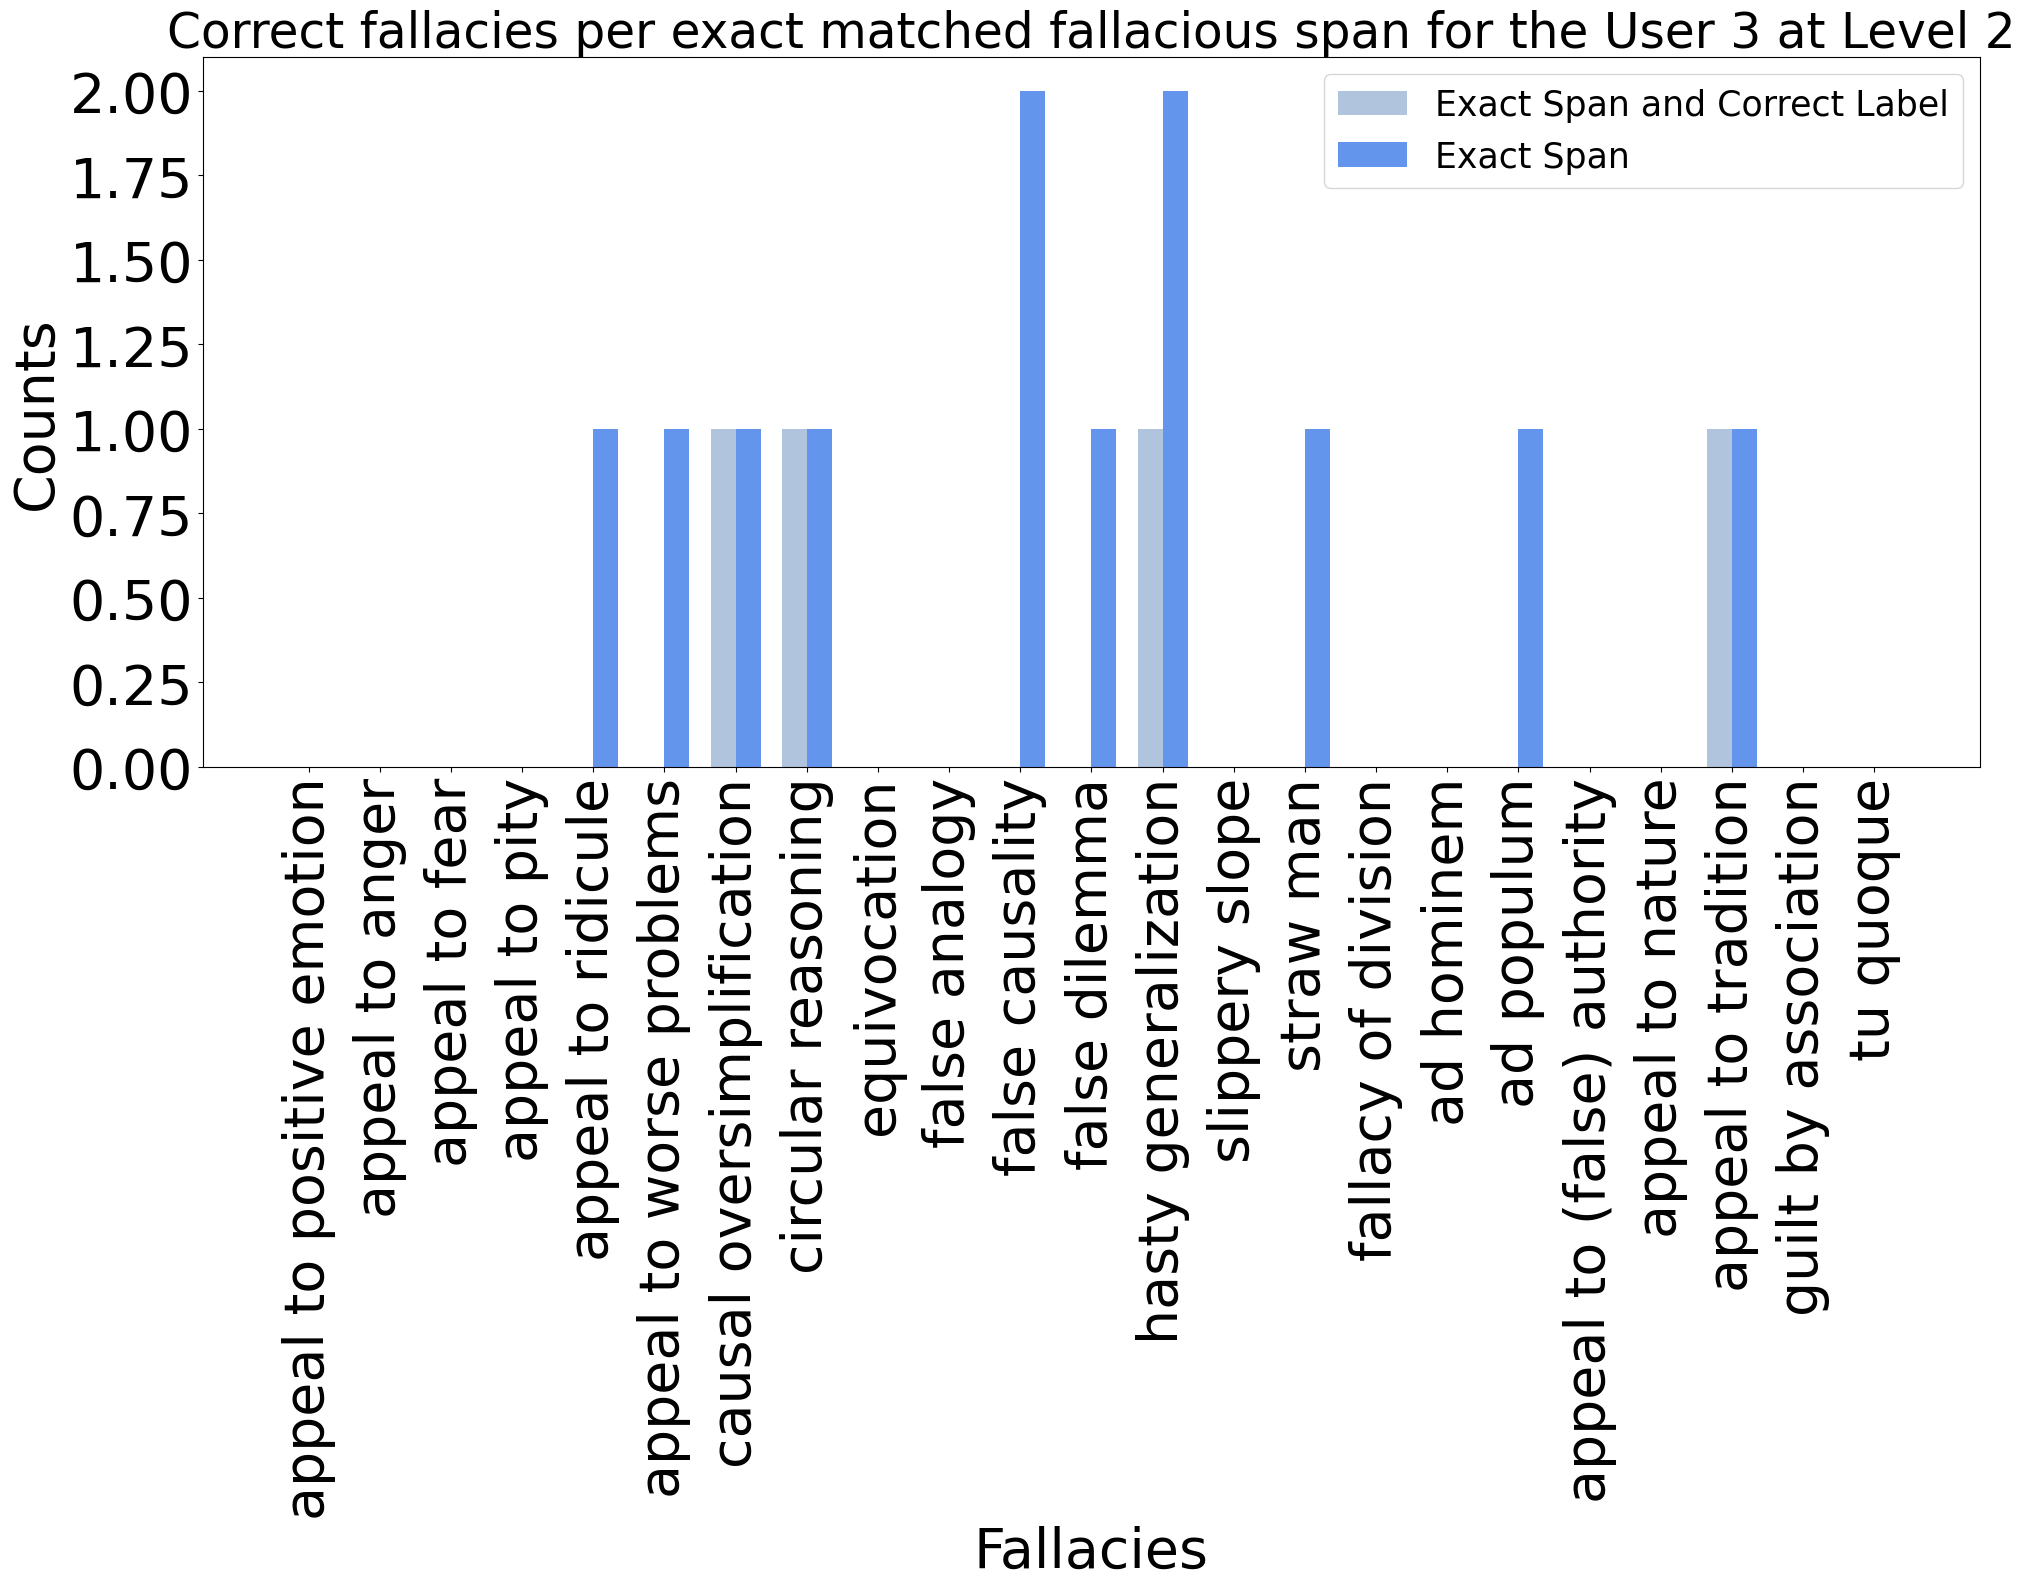

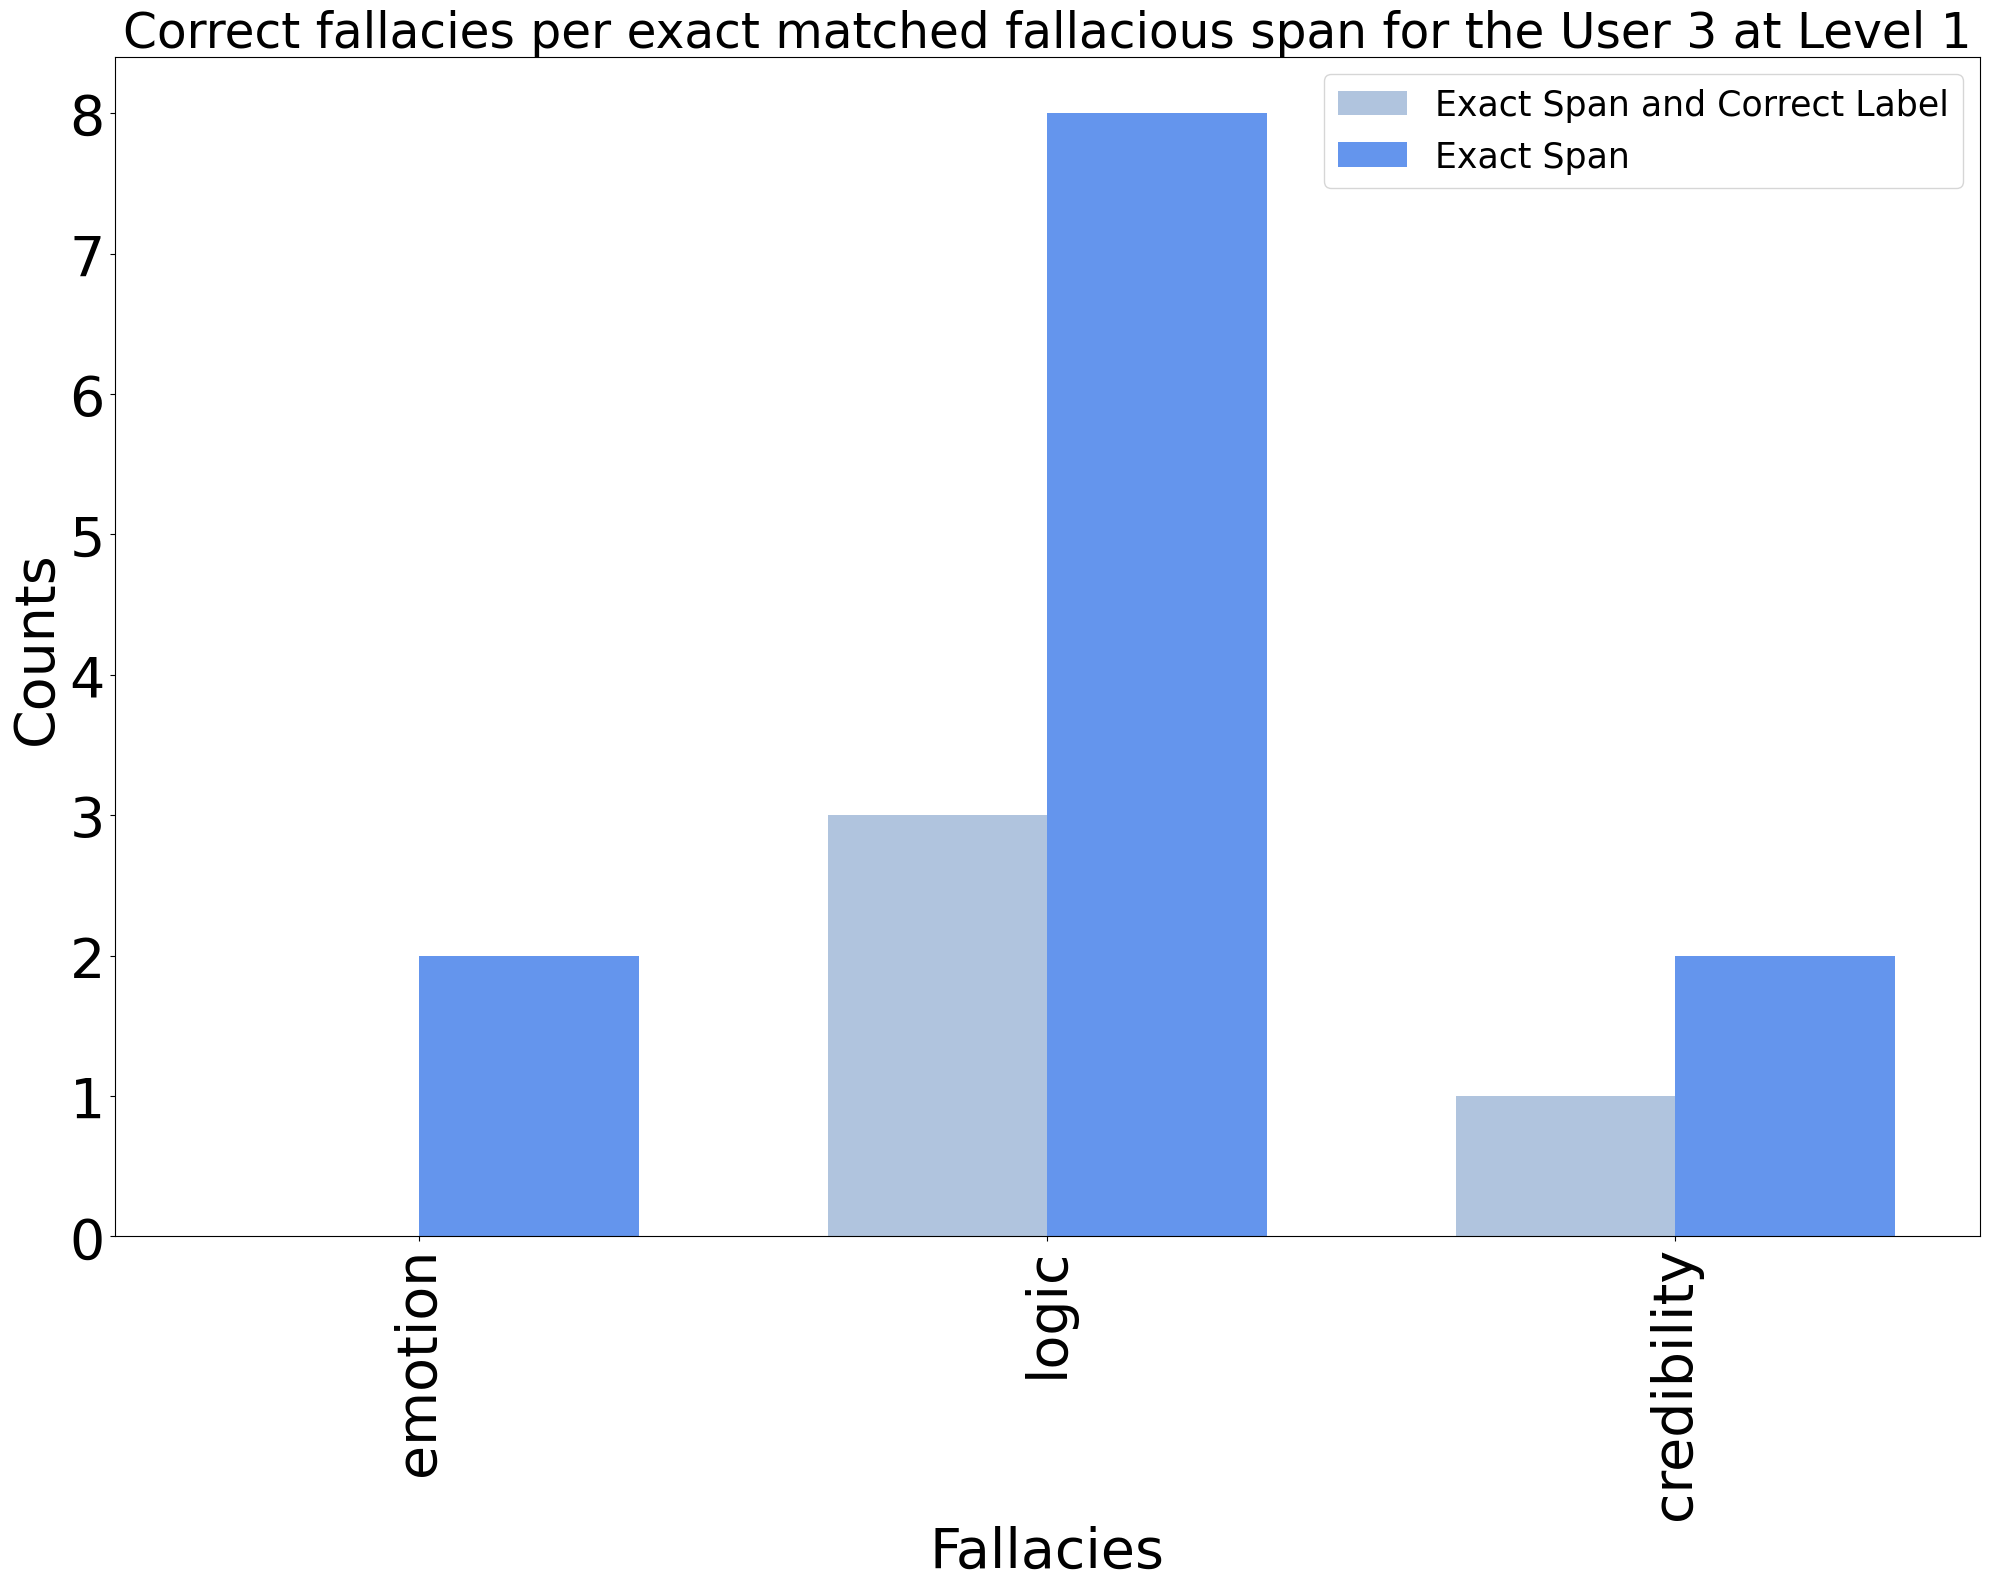

In [ ]:
plot_bar_labels_exact_match(gd_labels_count_user_3, pred_labels_count_user_3, "User 3")
plot_bar_labels_exact_match(transform_level_2_to_level_1(gd_labels_count_user_3), transform_level_2_to_level_1(pred_labels_count_user_3), "User 3", "Level 1")

{'appeal to positive emotion': 0, 'appeal to anger': 0, 'appeal to fear': 0, 'appeal to pity': 0, 'appeal to ridicule': 0, 'appeal to worse problems': 0, 'causal oversimplification': 0, 'circular reasoning': 0, 'equivocation': 0, 'false analogy': 0, 'false causality': 0, 'false dilemma': 0, 'hasty generalization': 1, 'slippery slope': 0, 'straw man': 0, 'fallacy of division': 0, 'ad hominem': 0, 'ad populum': 1, 'appeal to (false) authority': 0, 'appeal to nature': 0, 'appeal to tradition': 1, 'guilt by association': 1, 'tu quoque': 0}
{'appeal to positive emotion': 0, 'appeal to anger': 0, 'appeal to fear': 0, 'appeal to pity': 0, 'appeal to ridicule': 0, 'appeal to worse problems': 0, 'causal oversimplification': 0, 'circular reasoning': 0, 'equivocation': 0, 'false analogy': 0, 'false causality': 2, 'false dilemma': 1, 'hasty generalization': 2, 'slippery slope': 0, 'straw man': 0, 'fallacy of division': 0, 'ad hominem': 1, 'ad populum': 1, 'appeal to (false) authority': 1, 'appeal 

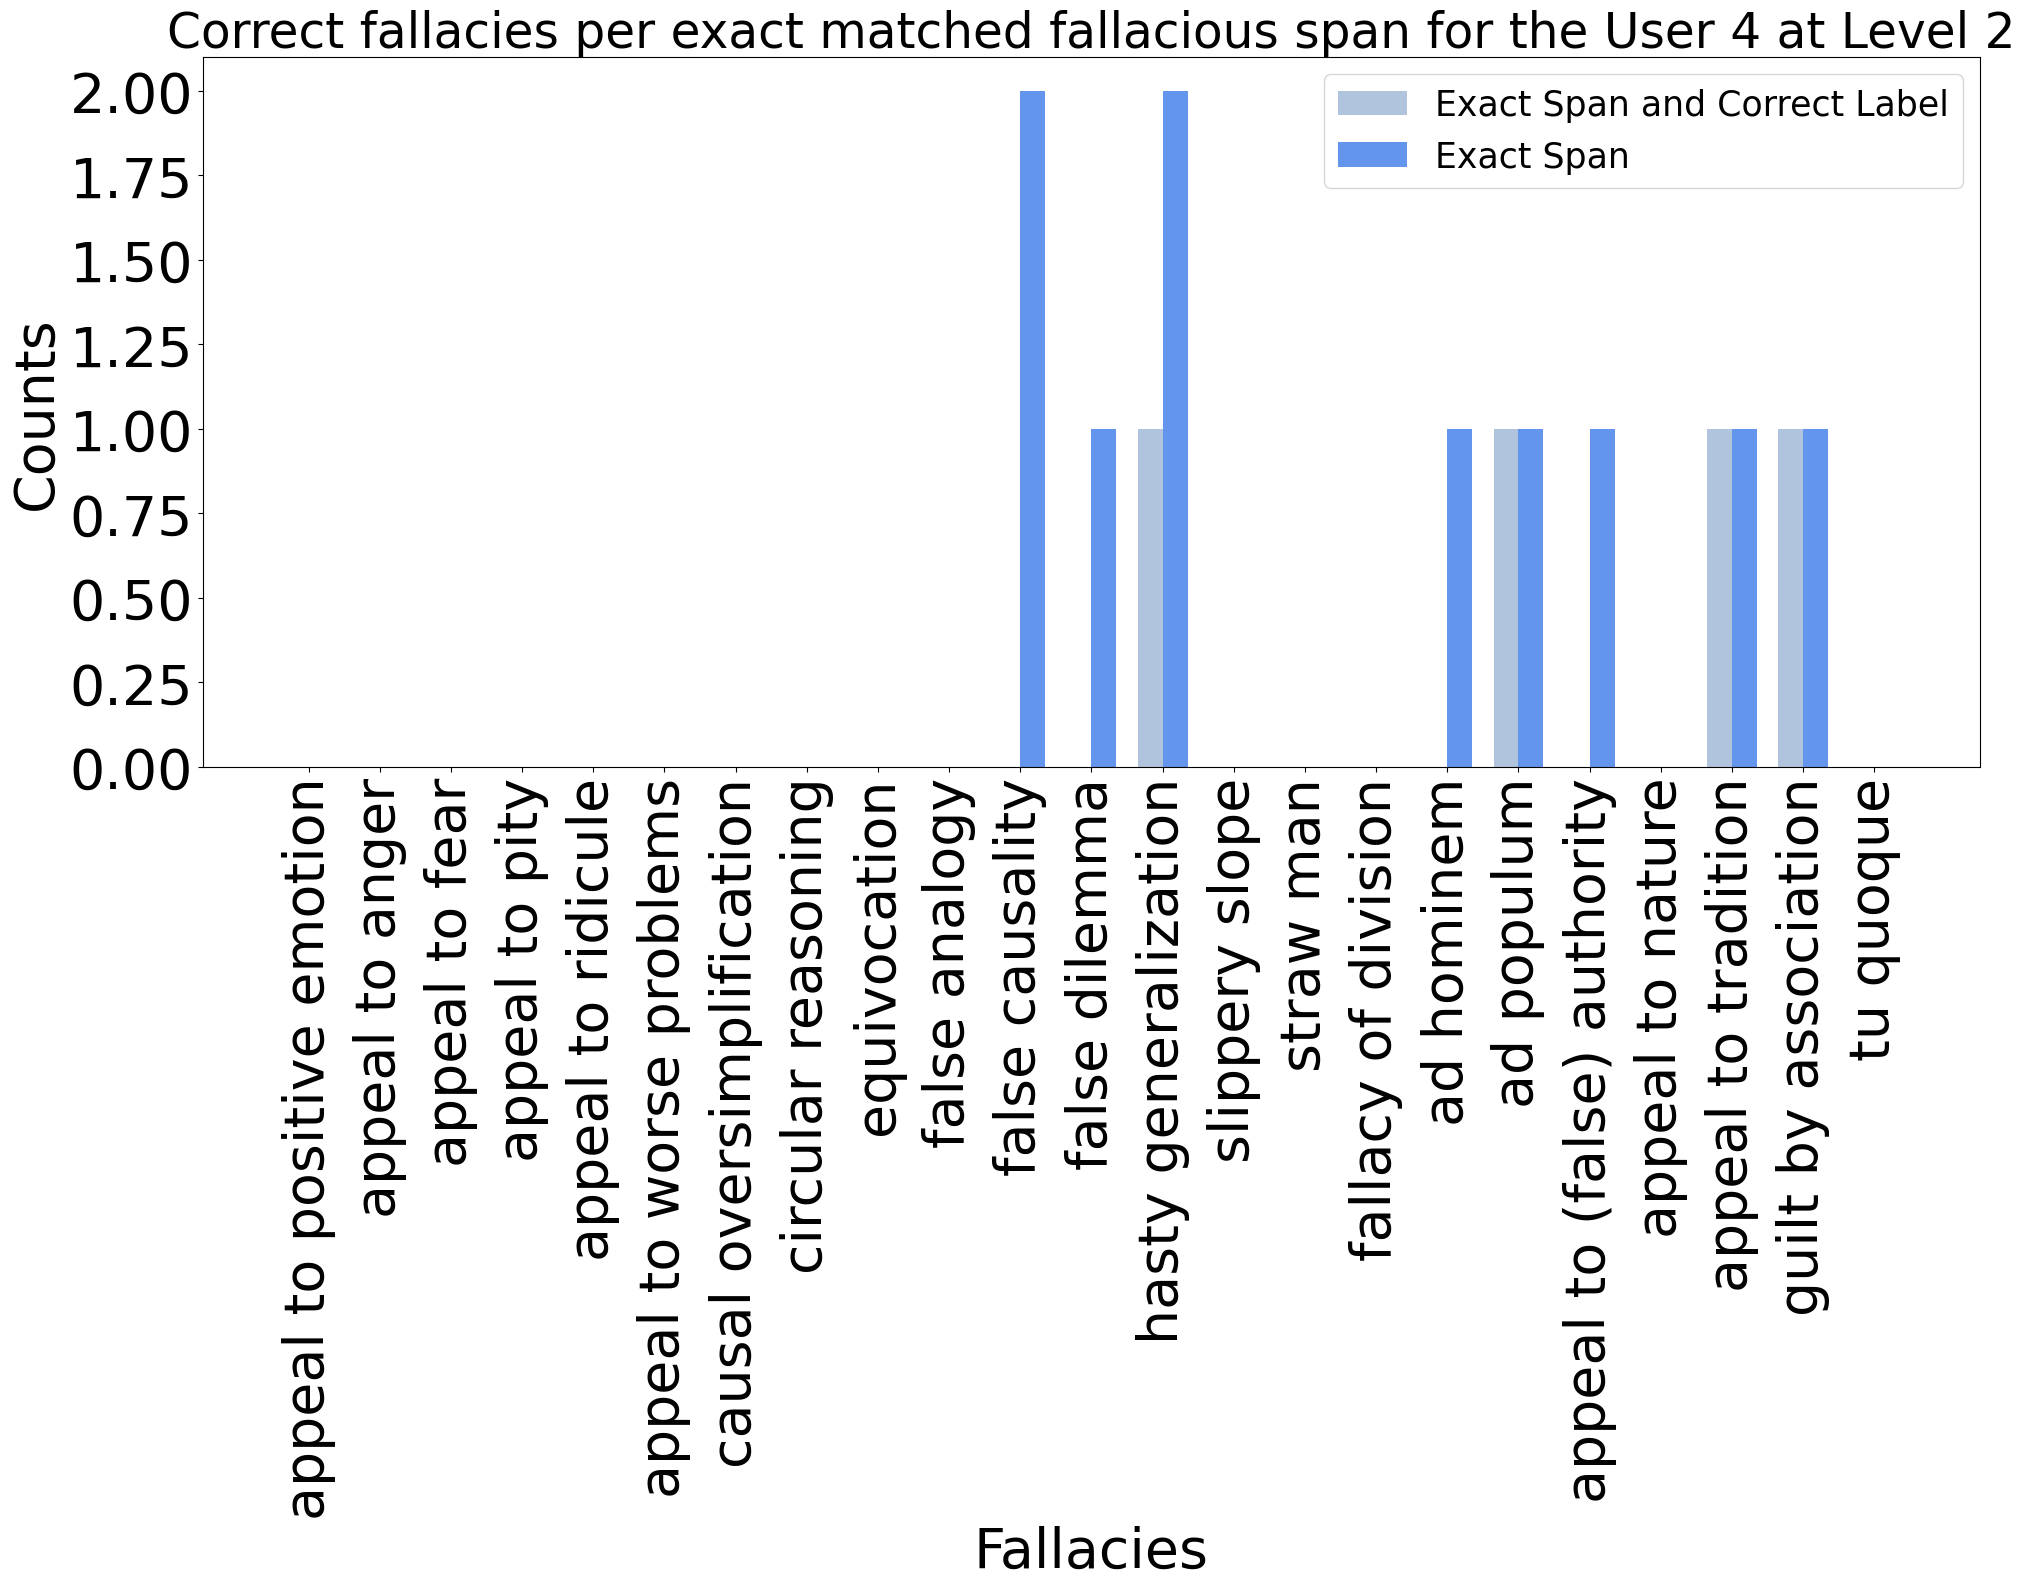

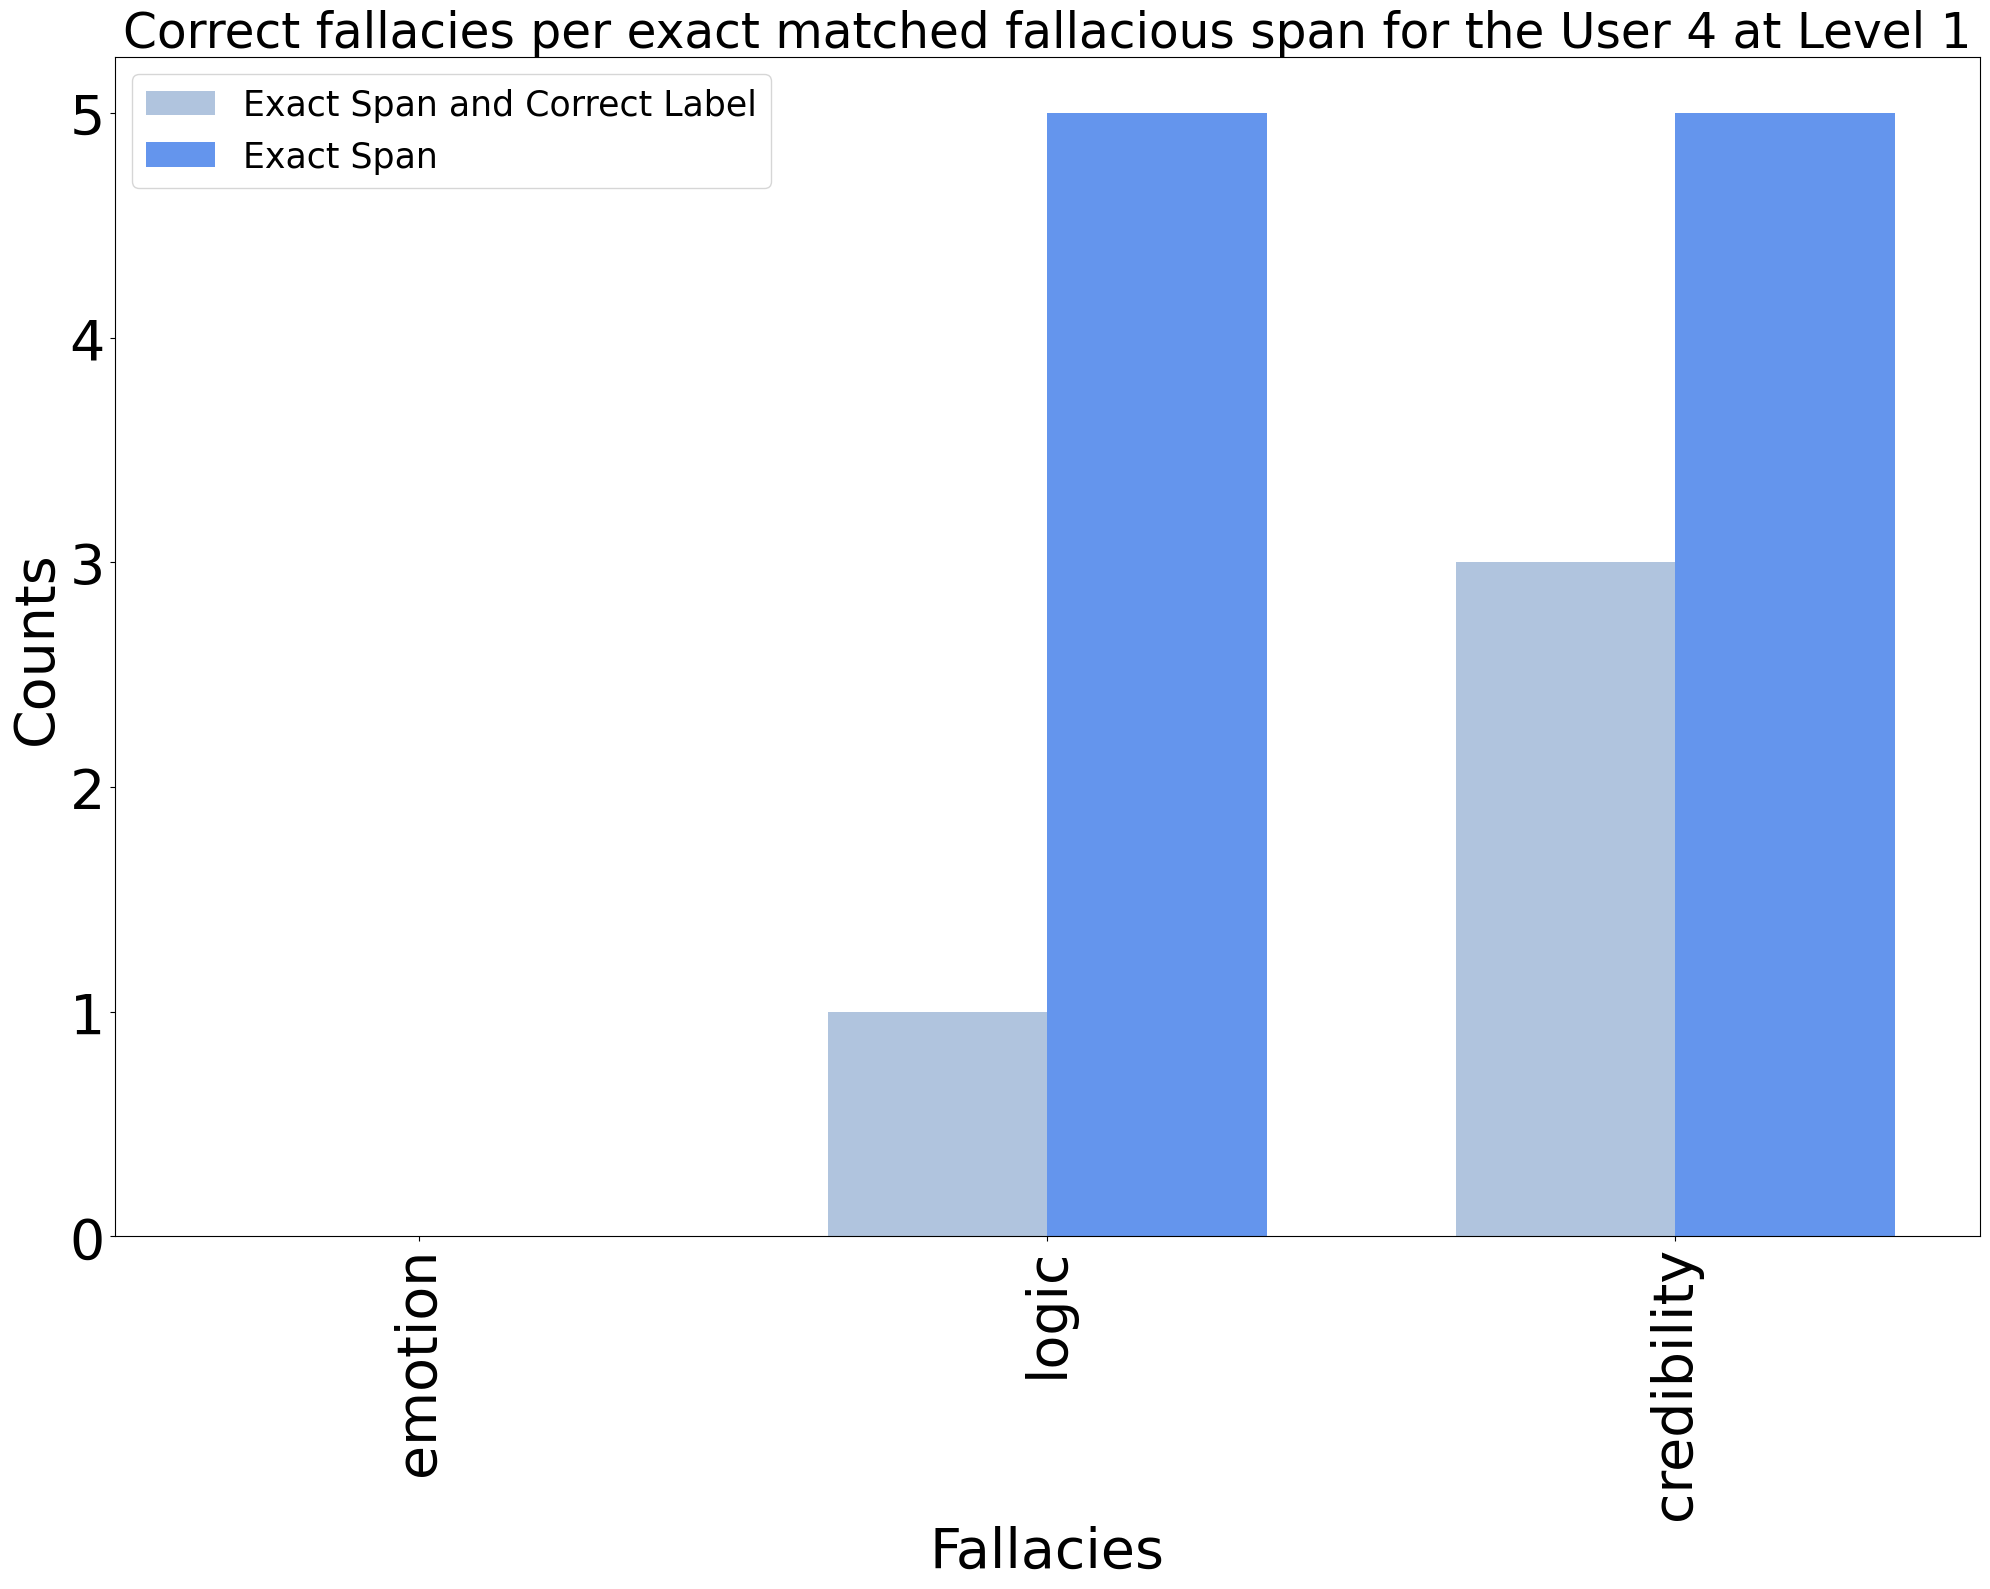

In [ ]:
plot_bar_labels_exact_match(gd_labels_count_user_4, pred_labels_count_user_4, "User 4")
plot_bar_labels_exact_match(transform_level_2_to_level_1(gd_labels_count_user_4), transform_level_2_to_level_1(pred_labels_count_user_4), "User 4", "Level 1")

In [ ]:
import re
from src.evaluate import KEYWORDS_LEVEL_2_NUMERIC, NON_FALLACIES_REGEX, clean_pred_output


def extract_labels_level_2(pred_output: str):
    idx_output = pred_output.find("Output:")
    if idx_output != -1:
        pred_output = pred_output[idx_output:]
    idx_to_remove = pred_output.find("Based on the above text, determine")
    if idx_to_remove != -1:
        # the model has repetead the instructions
        pred_output = pred_output[:idx_to_remove]
    pred_output = clean_pred_output(pred_output.lower())
    instruction_idx = pred_output.find("based on the above")
    if instruction_idx != -1:
        pred_output = pred_output[:instruction_idx]
    set_labels = set()
    for keyword in KEYWORDS_LEVEL_2_NUMERIC:
        if keyword in pred_output:
            set_labels.add(KEYWORDS_LEVEL_2_NUMERIC[keyword])

    # print(str(pred_output).lower())
    if re.search(NON_FALLACIES_REGEX, str(pred_output).lower()):
        set_labels.add(0)
    if set_labels == set():
        print(pred_output)
        set_labels.add(24)

    return set_labels

In [ ]:
for i in best_pred_dataset:
    for sentence, generated_out in i["prediction"].items():
        _ = extract_labels_level_2(generated_out)

the sentence  it s a mistake   is part of a fallacious argument 
the sentence  social media is the worst   is part of a fallacious argument 
this sentence is part of a fallacious argument 
the sentence  that means it must be really good   is part of a fallacious argument  the type of fallacy is appeal to popularity 
the sentence is part of a fallacious argument 


In [ ]:
for i in worst_pred_dataset:
    for sentence, generated_out in i["prediction"].items():
        _ = extract_labels_level_2(generated_out)